# What demographics have benefited from pet ownership during the social isolation of the COVID-19 pandemic?

### Data Preprocessing
---
- I have obtained the data from the [Harvard Dataverse, "Association between Pet Ownership and Mental Health and Well-Being of Canadians Assessed in a Cross-Sectional Study during the COVID-19 Pandemic"](https://dataverse.harvard.edu/file.xhtml?fileId=5244752&version=5.1).
- In this section, I properly import and format the dataset, then clean up by removing all NULL values, renaming column names into easily referrable names and convert scalable strings into numericle scales.
- Lastly, I prepare the train and test dataset.

In [318]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import re

In [320]:
with open('dataset_petandcovid.csv', 'r', encoding='utf-8', errors='replace') as f:
    content = f.read()

# Write it back with proper encoding
with open('dataset_petandcovid.csv', 'w', encoding='utf-8') as f:
    f.write(content)

In [322]:
train_test_combined = pd.read_csv('dataset_petandcovid.csv')
train_test_combined.head()

D2    region   O1 O8b   P1     D1           D5  \
0                Nova Scotia  Atlantic   No  No   72  18-24  High school   
1                    Alberta  Prairies   No  No   69  45-54      College   
2  Newfoundland and Labrador  Atlantic   No  No   74  45-54   University   
3                    Ontario   Ontario  Yes  No  116  45-54  High school   
4                    Ontario   Ontario  Yes  No   99  18-24   University   

          D67     D4  D11  ... H1Ax               H4 H56    S       QOL  GH  \
0      Others    Men    4  ...   No   Somewhat worse  No   No  0.829328  80   
1  Caucasians    Men    4  ...   No       Much worse  No  Yes  0.873691  80   
2  Caucasians    Men    2  ...  Yes   Somewhat worse  No  Yes  0.437208  41   
3  Caucasians    Men    5  ...   No   Somewhat worse  No  Yes  0.911329  80   
4  Caucasians  Women    2  ...   No  Somewhat better  No  Yes  0.860241  78   

  L1         H3         Q2    Q1_cat  
0  8       Good      A bit  Moderate  
1  5       Fair      A bit   Minimal  
2  5       Fair      A bit      Mild  
3  6  Very good  Extremely  Moderate  
4  4  Very good   Not very   Minimal  

[5 rows x 23 columns]

In [324]:
#change column names

m_cols = {'D2': 'province_or_territory',
'O1': 'pet_ownership',
'O8b': 'pet_ownership_change',
'P1': 'pet_attitude',
'D1': 'age',
'D5': 'highest_education',
'D67': 'ethnicity',
'D4': 'gender',
'D11': 'num_in_household',
'D8': 'yearly_income',
'E3': 'income_change_since_pandemic_beginning',
'H2': 'disability',
'H1Ax': 'emotional_psychological_mental_health_condition',
'H4': 'mental_health_change_since_pandemic_beginning',
'H56': 'COVID-19_positive_or_household_member',
'S': 'social_support',
'QOL': 'quality_of_life',
'GH': 'self-assessed_overall_health',
'L1': 'loneliness',
'H3': 'perceived_mental_health',
'Q2': 'self-reported_stress_level',
'Q1_cat': 'anxiety'}

train_test_combined = train_test_combined.rename(columns = m_cols)

In [326]:
train_test_combined.head()

province_or_territory    region pet_ownership pet_ownership_change  \
0                Nova Scotia  Atlantic            No                   No   
1                    Alberta  Prairies            No                   No   
2  Newfoundland and Labrador  Atlantic            No                   No   
3                    Ontario   Ontario           Yes                   No   
4                    Ontario   Ontario           Yes                   No   

   pet_attitude    age highest_education   ethnicity gender  num_in_household  \
0            72  18-24       High school      Others    Men                 4   
1            69  45-54           College  Caucasians    Men                 4   
2            74  45-54        University  Caucasians    Men                 2   
3           116  45-54       High school  Caucasians    Men                 5   
4            99  18-24        University  Caucasians  Women                 2   

   ... emotional_psychological_mental_health_condition  \
0  ...                                              No   
1  ...                                              No   
2  ...                                             Yes   
3  ...                                              No   
4  ...                                              No   

  mental_health_change_since_pandemic_beginning  \
0                                Somewhat worse   
1                                    Much worse   
2                                Somewhat worse   
3                                Somewhat worse   
4                               Somewhat better   

  COVID-19_positive_or_household_member social_support quality_of_life  \
0                                    No             No        0.829328   
1                                    No            Yes        0.873691   
2                                    No            Yes        0.437208   
3                                    No            Yes        0.911329   
4                                    No            Yes        0.860241   

  self-assessed_overall_health loneliness  perceived_mental_health  \
0                           80          8                     Good   
1                           80          5                     Fair   
2                           41          5                     Fair   
3                           80          6                Very good   
4                           78          4                Very good   

   self-reported_stress_level   anxiety  
0                       A bit  Moderate  
1                       A bit   Minimal  
2                       A bit      Mild  
3                   Extremely  Moderate  
4                    Not very   Minimal  

[5 rows x 23 columns]

In [328]:
train_test_combined.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   province_or_territory                            1500 non-null   object 
 1   region                                           1500 non-null   object 
 2   pet_ownership                                    1500 non-null   object 
 3   pet_ownership_change                             1500 non-null   object 
 4   pet_attitude                                     1500 non-null   int64  
 5   age                                              1500 non-null   object 
 6   highest_education                                1500 non-null   object 
 7   ethnicity                                        1500 non-null   object 
 8   gender                                           1500 non-null   object 
 9   num_in_household              

In [330]:
continuous_variables = ['num_in_household', 'quality_of_life','self-assessed_overall_health','pet_attitude']
for column_name in train_test_combined.columns:
    if column_name not in continuous_variables:
        print(f'Unique values of {column_name} are {train_test_combined[column_name].unique()}\n')

Unique values of province_or_territory are ['Nova Scotia' 'Alberta' 'Newfoundland and Labrador' 'Ontario'
 'British Columbia' 'New Brunswick' 'Saskatchewan' 'Qu�bec' 'Manitoba'
 'Prince Edward Island' 'Yukon' 'Northwest Territories' 'Nunavut']

Unique values of region are ['Atlantic' 'Prairies' 'Ontario' 'British Columbia' 'Qu�bec']

Unique values of pet_ownership are ['No' 'Yes']

Unique values of pet_ownership_change are ['No' 'Loss' 'New']

Unique values of age are ['18-24' '45-54' '35-44' '55-64' '65+' '25-34']

Unique values of highest_education are ['High school' 'College' 'University' 'Before high school']

Unique values of ethnicity are ['Others' 'Caucasians']

Unique values of gender are ['Men' 'Women' 'Other or did not answer']

Unique values of yearly_income are ['$19,999 or less' '$120,000 or more' '$40,000-$59,000' '$60,000-$79,999'
 '$20,000-$39,999' '$80,000-$99,999' '$100,000-$119,999'
 'Prefer not to answer']

Unique values of income_change_since_pandemic_beginning are

In [332]:
#change scalable strings to integers

scale_to_integers = {'mental_health_change_since_pandemic_beginning':{'Much worse': -2, 'Somewhat worse':-1,  'About the same': 0,'Somewhat better':1, 'Much better': 2},
'perceived_mental_health': {'Poor': -2, 'Fair': -1, 'Good': 0, 'Very good': 1, 'Excellent': 2},
'self-reported_stress_level': {'Not at all': 1, 'Not very': 2, 'A bit': 3, 'Quite a bit': 4, 'Extremely': 5},
'anxiety': {'Minimal': 1, 'Mild': 2, 'Moderate': 3, 'Severe': 4}}

train_test_combined = train_test_combined.replace(scale_to_integers)

/tmp/ipykernel_20103/2945200078.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_test_combined = train_test_combined.replace(scale_to_integers)


In [334]:
train_test_combined.describe()

pet_attitude  num_in_household  \
count   1500.000000         1500.0000   
mean      94.174000            2.5700   
std       21.055117            1.3524   
min       19.000000            1.0000   
25%       79.000000            2.0000   
50%       97.500000            2.0000   
75%      112.000000            3.0000   
max      126.000000           14.0000   

       mental_health_change_since_pandemic_beginning  quality_of_life  \
count                                    1500.000000      1500.000000   
mean                                       -0.398000         0.838867   
std                                         0.792474         0.138681   
min                                        -2.000000        -0.006337   
25%                                        -1.000000         0.809870   
50%                                         0.000000         0.872415   
75%                                         0.000000         0.911329   
max                                         2.000000         0.948968   

       self-assessed_overall_health   loneliness  perceived_mental_health  \
count                   1500.000000  1500.000000              1500.000000   
mean                      73.447333     5.255333                 0.126667   
std                       16.971405     1.929582                 1.075512   
min                        0.000000     3.000000                -2.000000   
25%                       66.000000     3.000000                -1.000000   
50%                       77.000000     5.000000                 0.000000   
75%                       85.000000     7.000000                 1.000000   
max                      100.000000     9.000000                 2.000000   

       self-reported_stress_level      anxiety  
count                 1500.000000  1500.000000  
mean                     2.666667     1.684667  
std                      0.967564     0.910193  
min                      1.000000     1.000000  
25%                      2.000000     1.000000  
50%                      3.000000     1.000000  
75%                      3.000000     2.000000  
max                      5.000000     4.000000

In [336]:
# split combined dataset into train and test datasets

from sklearn.model_selection import train_test_split
train, test = train_test_split(train_test_combined)
train.to_csv('train.csv', index = False)
test.to_csv('test.csv', index = False)

print(train_test_combined.shape)
print(train.shape)
print(test.shape)

(1500, 23)
(1125, 23)
(375, 23)


### Exploratory Data Analysis
---

In [339]:
# import train dataset
train_df = pd.read_csv('train.csv')
train_df.head()

province_or_territory            region pet_ownership pet_ownership_change  \
0      British Columbia  British Columbia            No                   No   
1               Alberta          Prairies           Yes                   No   
2               Ontario           Ontario           Yes                   No   
3          Saskatchewan          Prairies            No                   No   
4               Ontario           Ontario           Yes                   No   

   pet_attitude    age highest_education   ethnicity gender  num_in_household  \
0            79  55-64        University  Caucasians  Women                 2   
1            97  35-44           College  Caucasians    Men                 3   
2           104  45-54        University  Caucasians  Women                 1   
3            68  45-54        University      Others    Men                 3   
4           113    65+        University  Caucasians  Women                 1   

   ... emotional_psychological_mental_health_condition  \
0  ...                                              No   
1  ...                                              No   
2  ...                                              No   
3  ...                                             Yes   
4  ...                                              No   

  mental_health_change_since_pandemic_beginning  \
0                                             0   
1                                             0   
2                                            -1   
3                                            -1   
4                                             0   

  COVID-19_positive_or_household_member social_support  quality_of_life  \
0                                    No            Yes         0.904604   
1                                    No            Yes         0.948968   
2                                    No            Yes         0.616038   
3                                    No            Yes         0.891872   
4                                    No            Yes         0.865736   

  self-assessed_overall_health loneliness  perceived_mental_health  \
0                           75          3                        0   
1                           75          3                        0   
2                           49          5                        0   
3                           80          4                       -1   
4                           75          3                        2   

   self-reported_stress_level  anxiety  
0                           3        1  
1                           3        1  
2                           2        2  
3                           3        1  
4                           1        1  

[5 rows x 23 columns]

In [341]:
# identify numeric and categorical variables
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   province_or_territory                            1125 non-null   object 
 1   region                                           1125 non-null   object 
 2   pet_ownership                                    1125 non-null   object 
 3   pet_ownership_change                             1125 non-null   object 
 4   pet_attitude                                     1125 non-null   int64  
 5   age                                              1125 non-null   object 
 6   highest_education                                1125 non-null   object 
 7   ethnicity                                        1125 non-null   object 
 8   gender                                           1125 non-null   object 
 9   num_in_household              

In [347]:
# separating numeric and catgeorical variables
categorical_df = train_df[['province_or_territory', 'region', 'pet_ownership_change', 'age', 'highest_education', 'ethnicity', 'yearly_income', 'income_change_since_pandemic_beginning', 'COVID-19_positive_or_household_member', 'gender', 'social_support', 'disability', 'emotional_psychological_mental_health_condition', 'pet_ownership']]
numeric_df = train_df[[col for col in train_df.columns if col not in categorical_df.columns]]

In [349]:
# remembering we have altered the datatype of certain variables above
train_df.describe()

pet_attitude  num_in_household  \
count   1125.000000       1125.000000   
mean      94.261333          2.540444   
std       20.982054          1.342373   
min       22.000000          1.000000   
25%       80.000000          2.000000   
50%       97.000000          2.000000   
75%      112.000000          3.000000   
max      126.000000         14.000000   

       mental_health_change_since_pandemic_beginning  quality_of_life  \
count                                    1125.000000      1125.000000   
mean                                       -0.405333         0.836766   
std                                         0.775038         0.142121   
min                                        -2.000000         0.038425   
25%                                        -1.000000         0.809870   
50%                                         0.000000         0.866966   
75%                                         0.000000         0.911329   
max                                         2.000000         0.948968   

       self-assessed_overall_health   loneliness  perceived_mental_health  \
count                   1125.000000  1125.000000              1125.000000   
mean                      73.214222     5.285333                 0.132444   
std                       17.022681     1.958058                 1.096446   
min                        0.000000     3.000000                -2.000000   
25%                       65.000000     3.000000                -1.000000   
50%                       77.000000     5.000000                 0.000000   
75%                       85.000000     7.000000                 1.000000   
max                      100.000000     9.000000                 2.000000   

       self-reported_stress_level      anxiety  
count                 1125.000000  1125.000000  
mean                     2.677333     1.680889  
std                      0.983798     0.894049  
min                      1.000000     1.000000  
25%                      2.000000     1.000000  
50%                      3.000000     1.000000  
75%                      3.000000     2.000000  
max                      5.000000     4.000000

### Information about variables:
---
- **pet_attitude**:
    - The original Pet Attitude Scale (PAS) measures the favourability of an indidivual towards companion animals, with a higher score denoting a more positive attitude.
    - The maximum score is 126.
- **num_in_household**:
    - The number of human members in the current household of the participant.
- **mental_health_change_since_pandemic_beginning**:
    - A scale of -2 to 2, with 0 being the participant's mental health remaining the same.
    - A negative score denotes a negative change while a positive score denotes a positive change.
    - 1 denotes support while 0 denotes no support.
- **quality_of_life**:
    - EQ-5D-5L score converted on the scale developed for Canada.
    - The 5 dimensions are mobility, self-care, usual activities, pain/discomfort and anxiety/depression. This questionaire is known to be highly reliable among healthcare professionals.
    - The higher the score, the better the quality of life.
- **self-assessed_overall_health**:
    - Unknown questionaire used, but a higher score is presumed to mean better health.
- **loneliness**:
    - Seeing that the highest score is 9, the assessment method used is presumed to be the 3-item UCLA Loneliness Scale, where a higher score denotes higher levels of loneliness.
- **perceived_mental_health**:
    - A scale of -2 to 2, with 0 being the participant's mental health state being 'Good' or 'Normal'.
    - A negative score denotes a negative mental health state while a positive score denotes a positive mental health state.
- **self-reported_stress_level**:
    - The higher the score, the higher the stress level.
- **anxiety**:
    - The higher the score, the higher the anxiety level.


### Exploring mental health indicators
---

In [377]:
# extracting mental health indicators
mh_df = train_df[['mental_health_change_since_pandemic_beginning', 'loneliness', 'perceived_mental_health', 'self-reported_stress_level', 'anxiety']]

In [381]:
mh_df.describe()

mental_health_change_since_pandemic_beginning   loneliness  \
count                                    1125.000000  1125.000000   
mean                                       -0.405333     5.285333   
std                                         0.775038     1.958058   
min                                        -2.000000     3.000000   
25%                                        -1.000000     3.000000   
50%                                         0.000000     5.000000   
75%                                         0.000000     7.000000   
max                                         2.000000     9.000000   

       perceived_mental_health  self-reported_stress_level      anxiety  
count              1125.000000                 1125.000000  1125.000000  
mean                  0.132444                    2.677333     1.680889  
std                   1.096446                    0.983798     0.894049  
min                  -2.000000                    1.000000     1.000000  
25%                  -1.000000                    2.000000     1.000000  
50%                   0.000000                    3.000000     1.000000  
75%                   1.000000                    3.000000     2.000000  
max                   2.000000                    5.000000     4.000000

In [379]:
len(mh_df.columns)

5

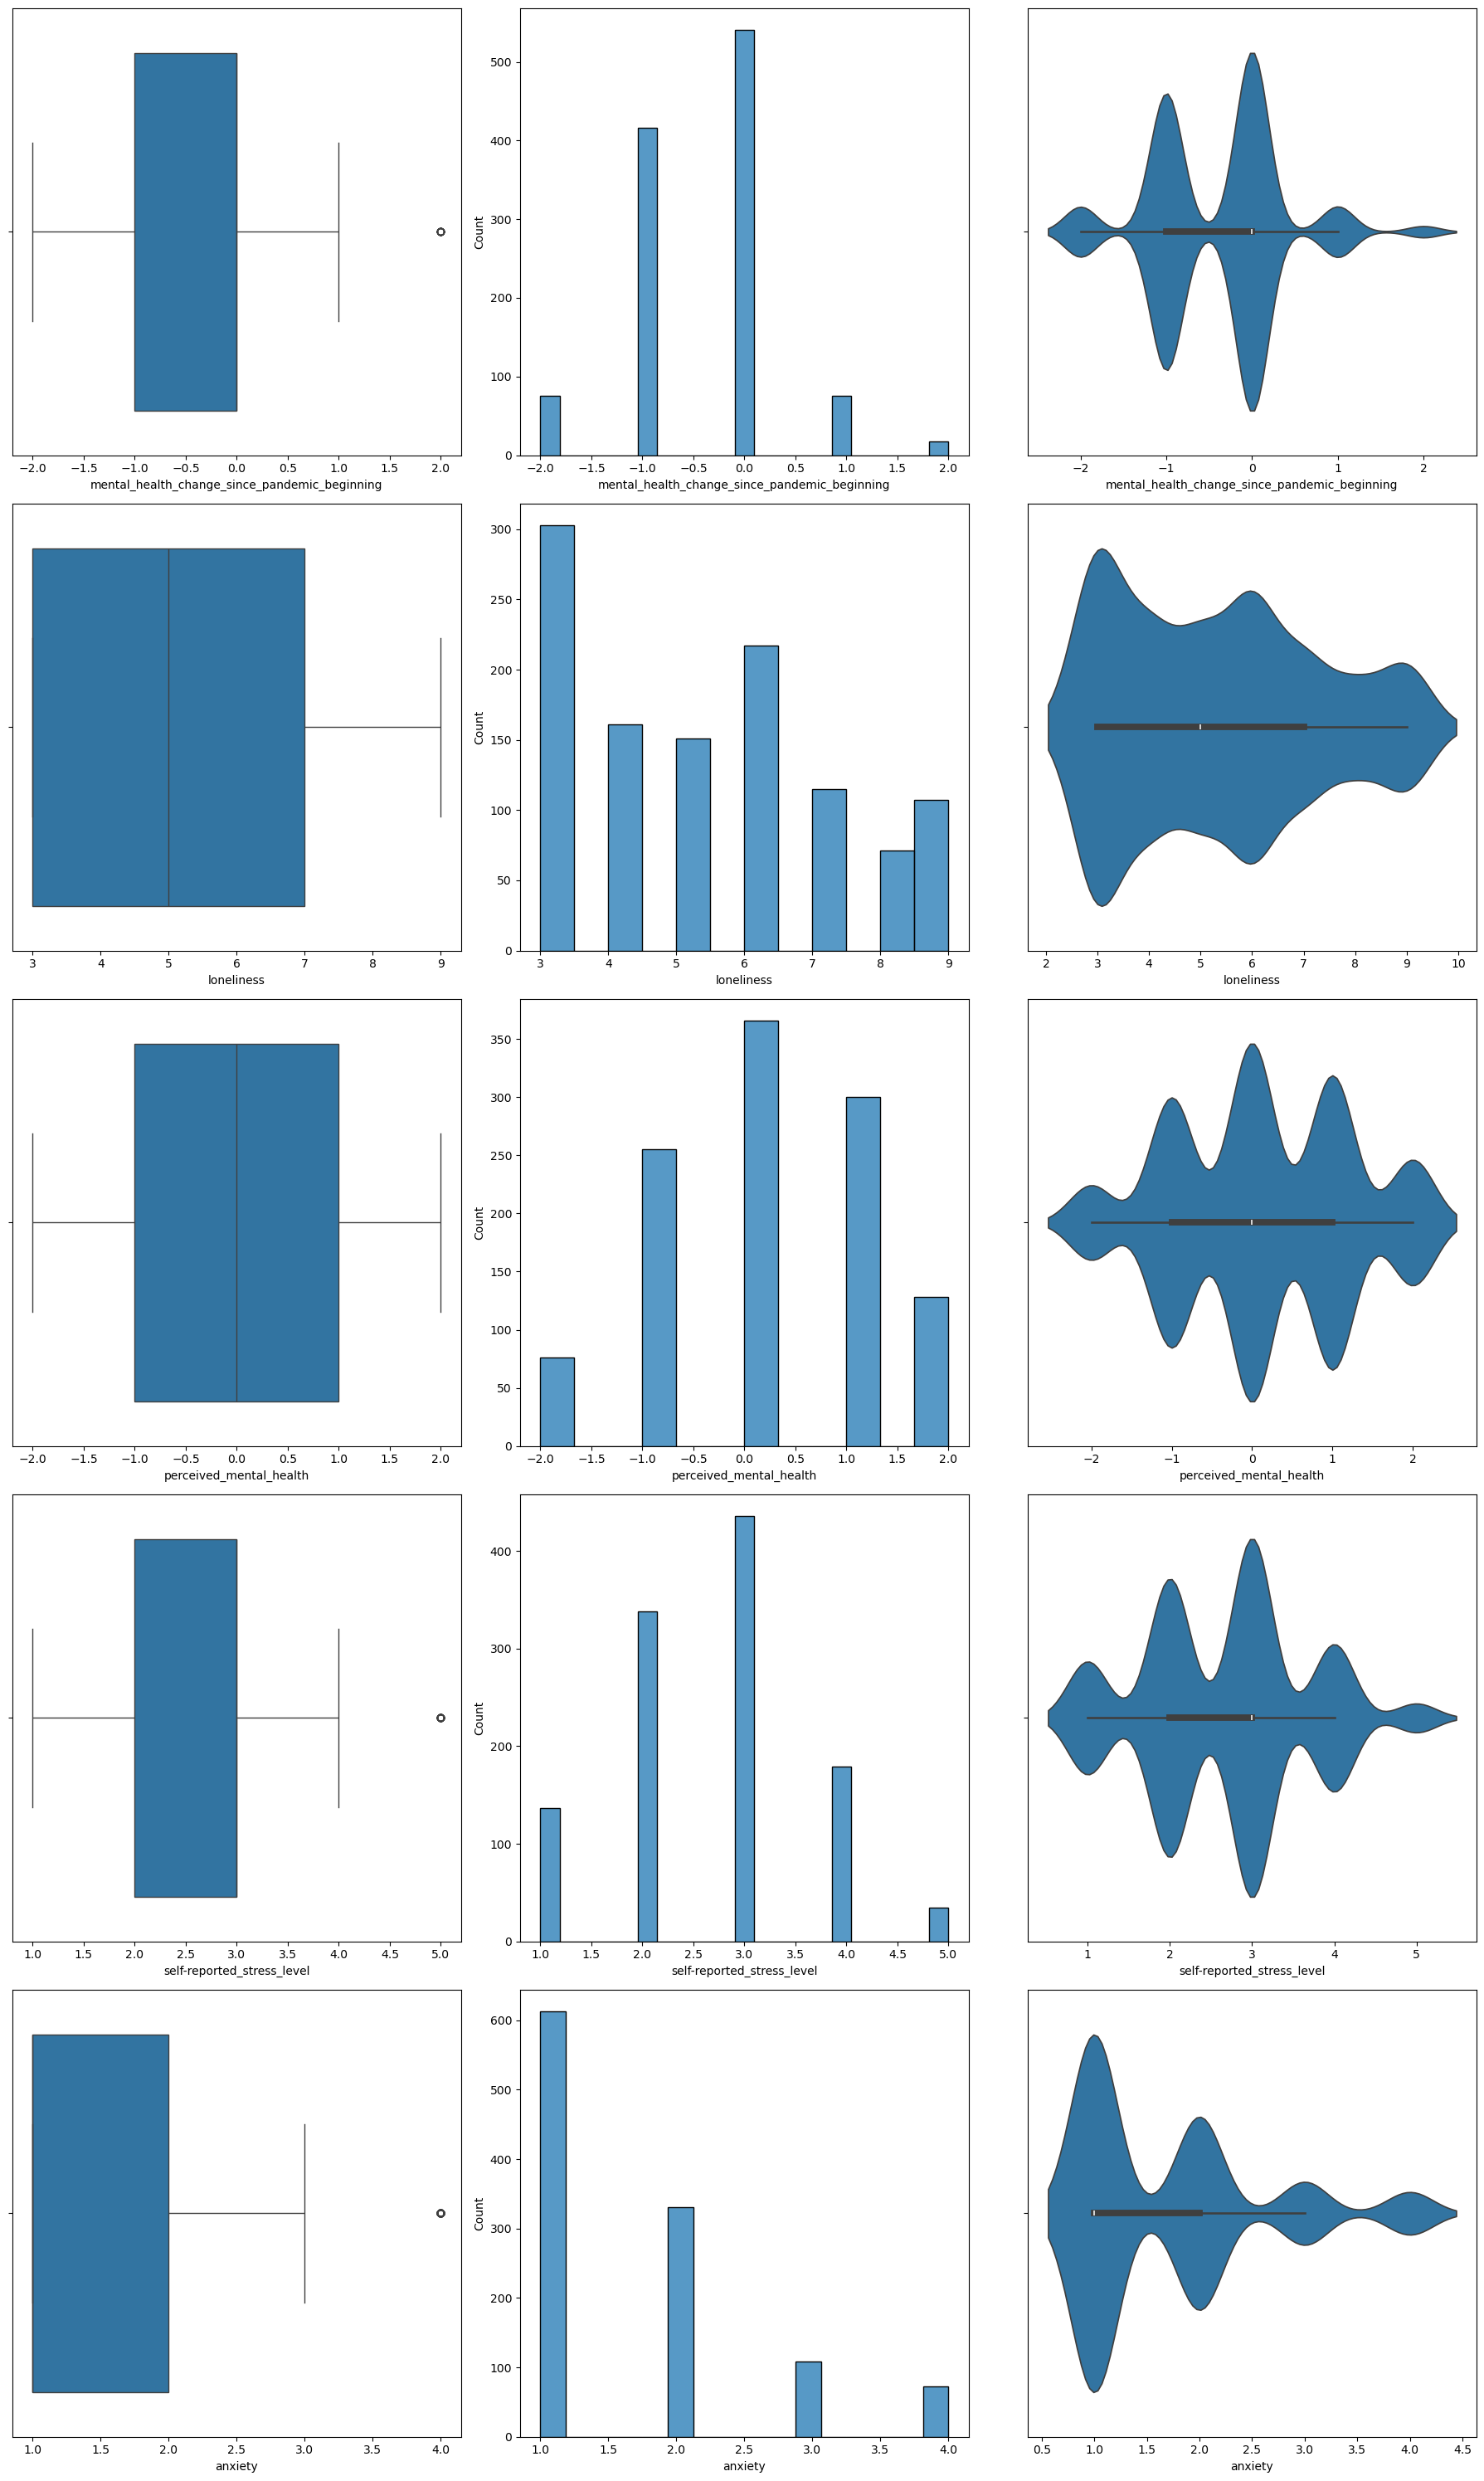

In [371]:
f, axes = plt.subplots(5, 3, figsize = (18,30))

count = 0

for var in mh_df:
    sb.boxplot(data = mh_df[var], orient = 'h', ax = axes[count, 0])
    sb.histplot(data = mh_df[var], ax = axes[count, 1])
    sb.violinplot(data = mh_df[var], orient = 'h', ax = axes[count, 2])
    count += 1
    
plt.tight_layout()

In [373]:
mh_df.skew()

mental_health_change_since_pandemic_beginning    0.175979
loneliness                                       0.427636
perceived_mental_health                         -0.053089
self-reported_stress_level                       0.108442
anxiety                                          1.216810
dtype: float64

<Axes: >

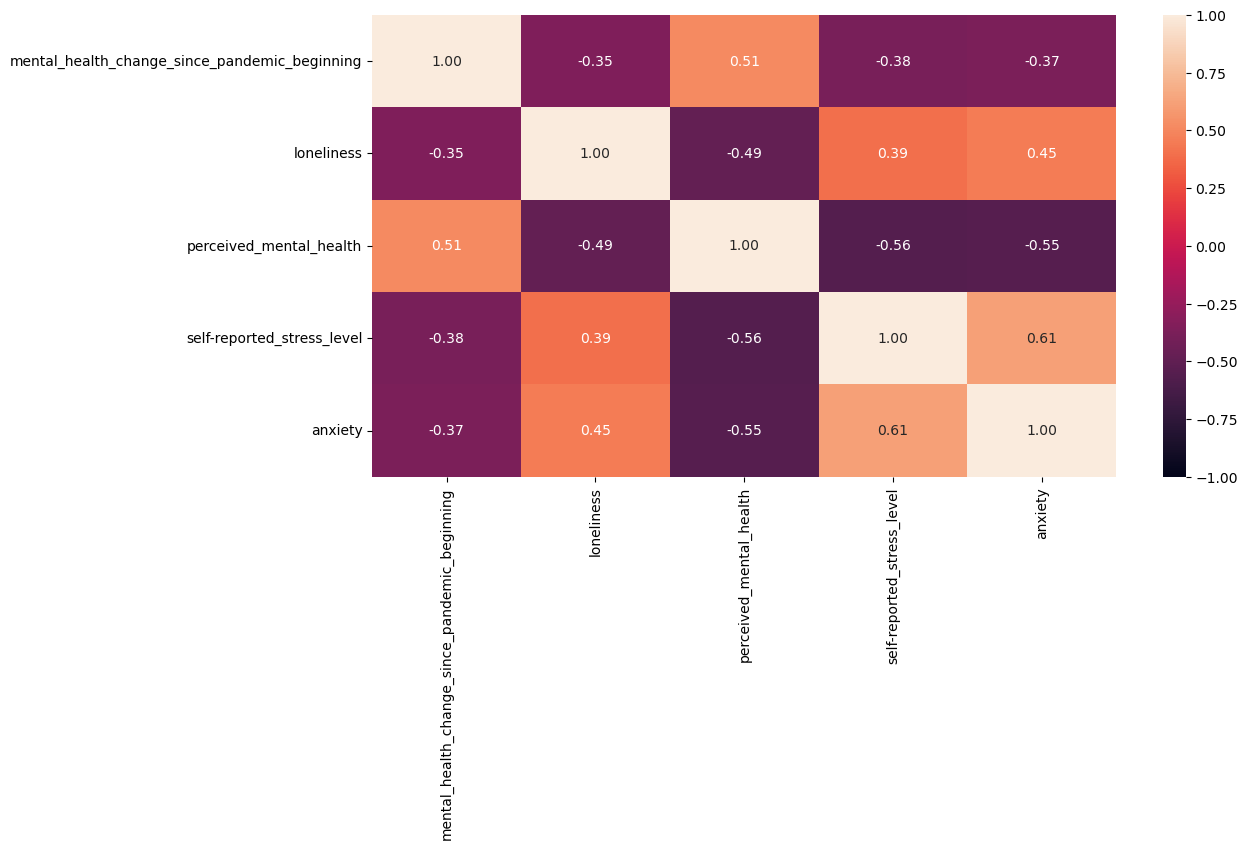

In [395]:
f = plt.figure(figsize = (12,6))
sb.heatmap(mh_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

#### Observations:
- **mental_health_change_since_pandemic_beginning**:
    - Most participants had no change, but following closely at second most, many participants experienced a worsening in their mental health state.
    - A minority experienced any improvement or extreme worsening.
- **loneliness**:
    - Majority had a low level of loneliness while the rest are almost equally spread out between 4 to 9.
    - The difference in levels of loneliness can be remarked upon but not extreme.
    - This may be investigated further to reveal if the correlation with pet ownership is high.
- **perceived_mental_health**:
    - Most participants reported a 'Normal' or 'Good' mental health state.
    - From the positive moderate correlation between mental_health_change_since_pandemic_beginning, it seems that as mental health state becomes better, mental health change since the beginning of the pandemic may imperfectly be more likely to be positive and vise versa. This indicates that the mental health states of the participants become more extreme (i.e. worsen if state is poor and better if state is good) during the pandemic.
    - From the negative moderate correlation between loneliness, anxiety and stress, it seems that as mental health state becomes better, loneliness, anxiety and stress may imperfectly worsen and vise versa. Since all 3 correlations are approximately the same, it can be said that they contributed to worse mental health state equally.
- **self-reported_stress_level**:
    - Majority reported a moderate or slightly low level of stress at scores of 2 and 3.
    - The graphs show a closer resemblence to a normal distribution.
- **anxiety**:
    - The graphs skew to the right, showing general low levels of stress with an outlier on the extreme right. This can be due to the Work-From-Home arrangement during the pandemic.

### Exploring the correlation between other variables and mental state and mental state changes
---

#### Location

In [457]:
# extracting location based variables
location_df = train_df[['province_or_territory', 'region']]

In [459]:
for var in location_df.columns:
    print(f"{var}: {location_df[var].unique()}")

# not too many unique values so we can use a bar plot

province_or_territory: ['British Columbia' 'Alberta' 'Ontario' 'Saskatchewan' 'Qu�bec'
 'New Brunswick' 'Manitoba' 'Newfoundland and Labrador' 'Nova Scotia'
 'Yukon' 'Northwest Territories' 'Nunavut' 'Prince Edward Island']
region: ['British Columbia' 'Prairies' 'Ontario' 'Qu�bec' 'Atlantic']


In [430]:
location_mh_df = train_df[['mental_health_change_since_pandemic_beginning', 'loneliness', 'perceived_mental_health', 'self-reported_stress_level', 'anxiety', 'province_or_territory', 'region']]

In [434]:
location_mh_df.head()

mental_health_change_since_pandemic_beginning  loneliness  \
0                                              0           3   
1                                              0           3   
2                                             -1           5   
3                                             -1           4   
4                                              0           3   

   perceived_mental_health  self-reported_stress_level  anxiety  \
0                        0                           3        1   
1                        0                           3        1   
2                        0                           2        2   
3                       -1                           3        1   
4                        2                           1        1   

  province_or_territory            region  
0      British Columbia  British Columbia  
1               Alberta          Prairies  
2               Ontario           Ontario  
3          Saskatchewan          Prairies  
4               Ontario           Ontario

In [471]:
#separate based on location, place df in dicts
province_dict = {}
region_dict = {}

for place in location_mh_df['province_or_territory'].unique():
    province_dict[place] = location_mh_df.loc[location_mh_df['province_or_territory'] == place]

for place in location_mh_df['region'].unique():
    region_dict[place] = location_mh_df.loc[location_mh_df['region'] == place]

In [573]:
for key in province_dict.keys():
    print(key)
    print(province_dict[key].shape)

British Columbia
(141, 7)
Alberta
(111, 7)
Ontario
(445, 7)
Saskatchewan
(36, 7)
Qu�bec
(285, 7)
New Brunswick
(24, 7)
Manitoba
(36, 7)
Newfoundland and Labrador
(11, 7)
Nova Scotia
(29, 7)
Yukon
(2, 7)
Northwest Territories
(2, 7)
Nunavut
(1, 7)
Prince Edward Island
(2, 7)


In [575]:
for key in region_dict.keys():
    print(key)
    print(region_dict[key].shape)

British Columbia
(141, 7)
Prairies
(188, 7)
Ontario
(445, 7)
Qu�bec
(285, 7)
Atlantic
(66, 7)


In [577]:
# we can discard certain locations due to their low sample size < 20
province_discard = ['Yukon', 'Northwest Territories', 'Nunavut', 'Prince Edward Island', 'Newfoundland and Labrador']
for key in province_discard:
    province_dict.pop(key)

In [595]:
# x = var_in_mh_df, y = province_place/region_place
def locationPlots(name, data):
    
    f, axes = plt.subplots(5, 3, figsize = (18,20))

    count = 0

    for var in mh_df:
        sb.boxplot(data = data[var], orient = 'h', ax = axes[count, 0])
        sb.histplot(data = data[var], ax = axes[count, 1])
        sb.violinplot(data = data[var], orient = 'h', ax = axes[count, 2])
        count += 1
        plt.tight_layout()
        
    

PROVINCE
British Columbia


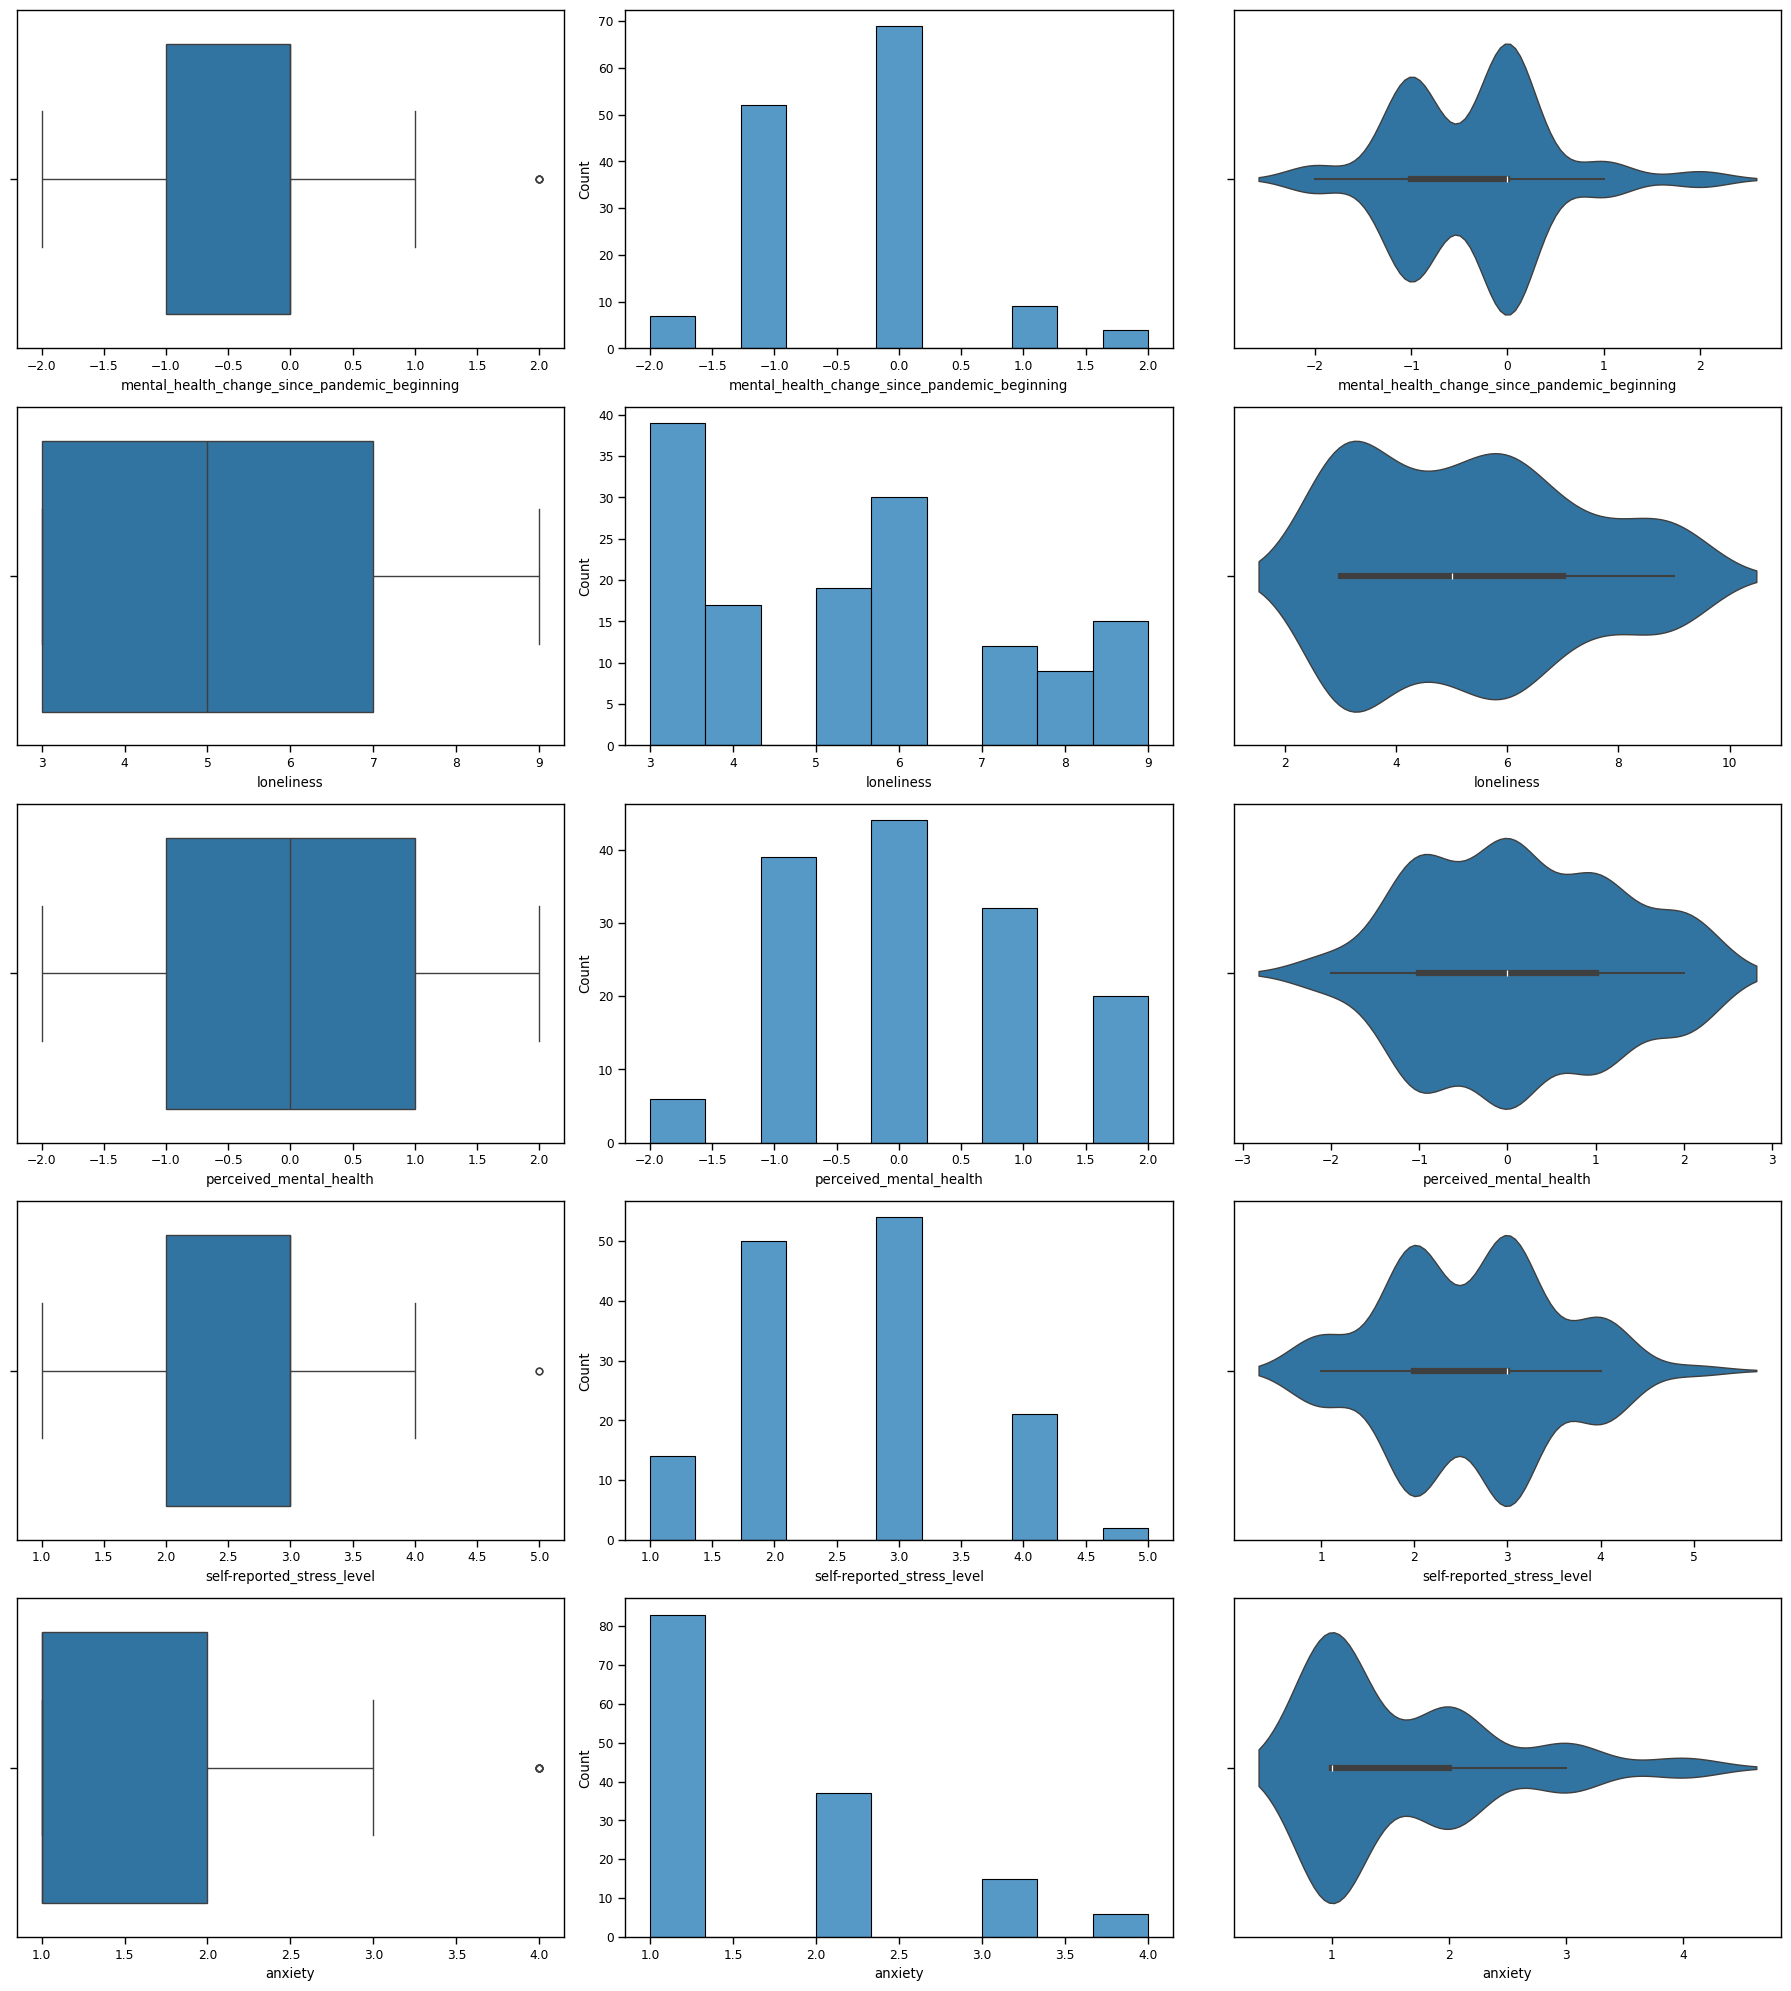

Alberta


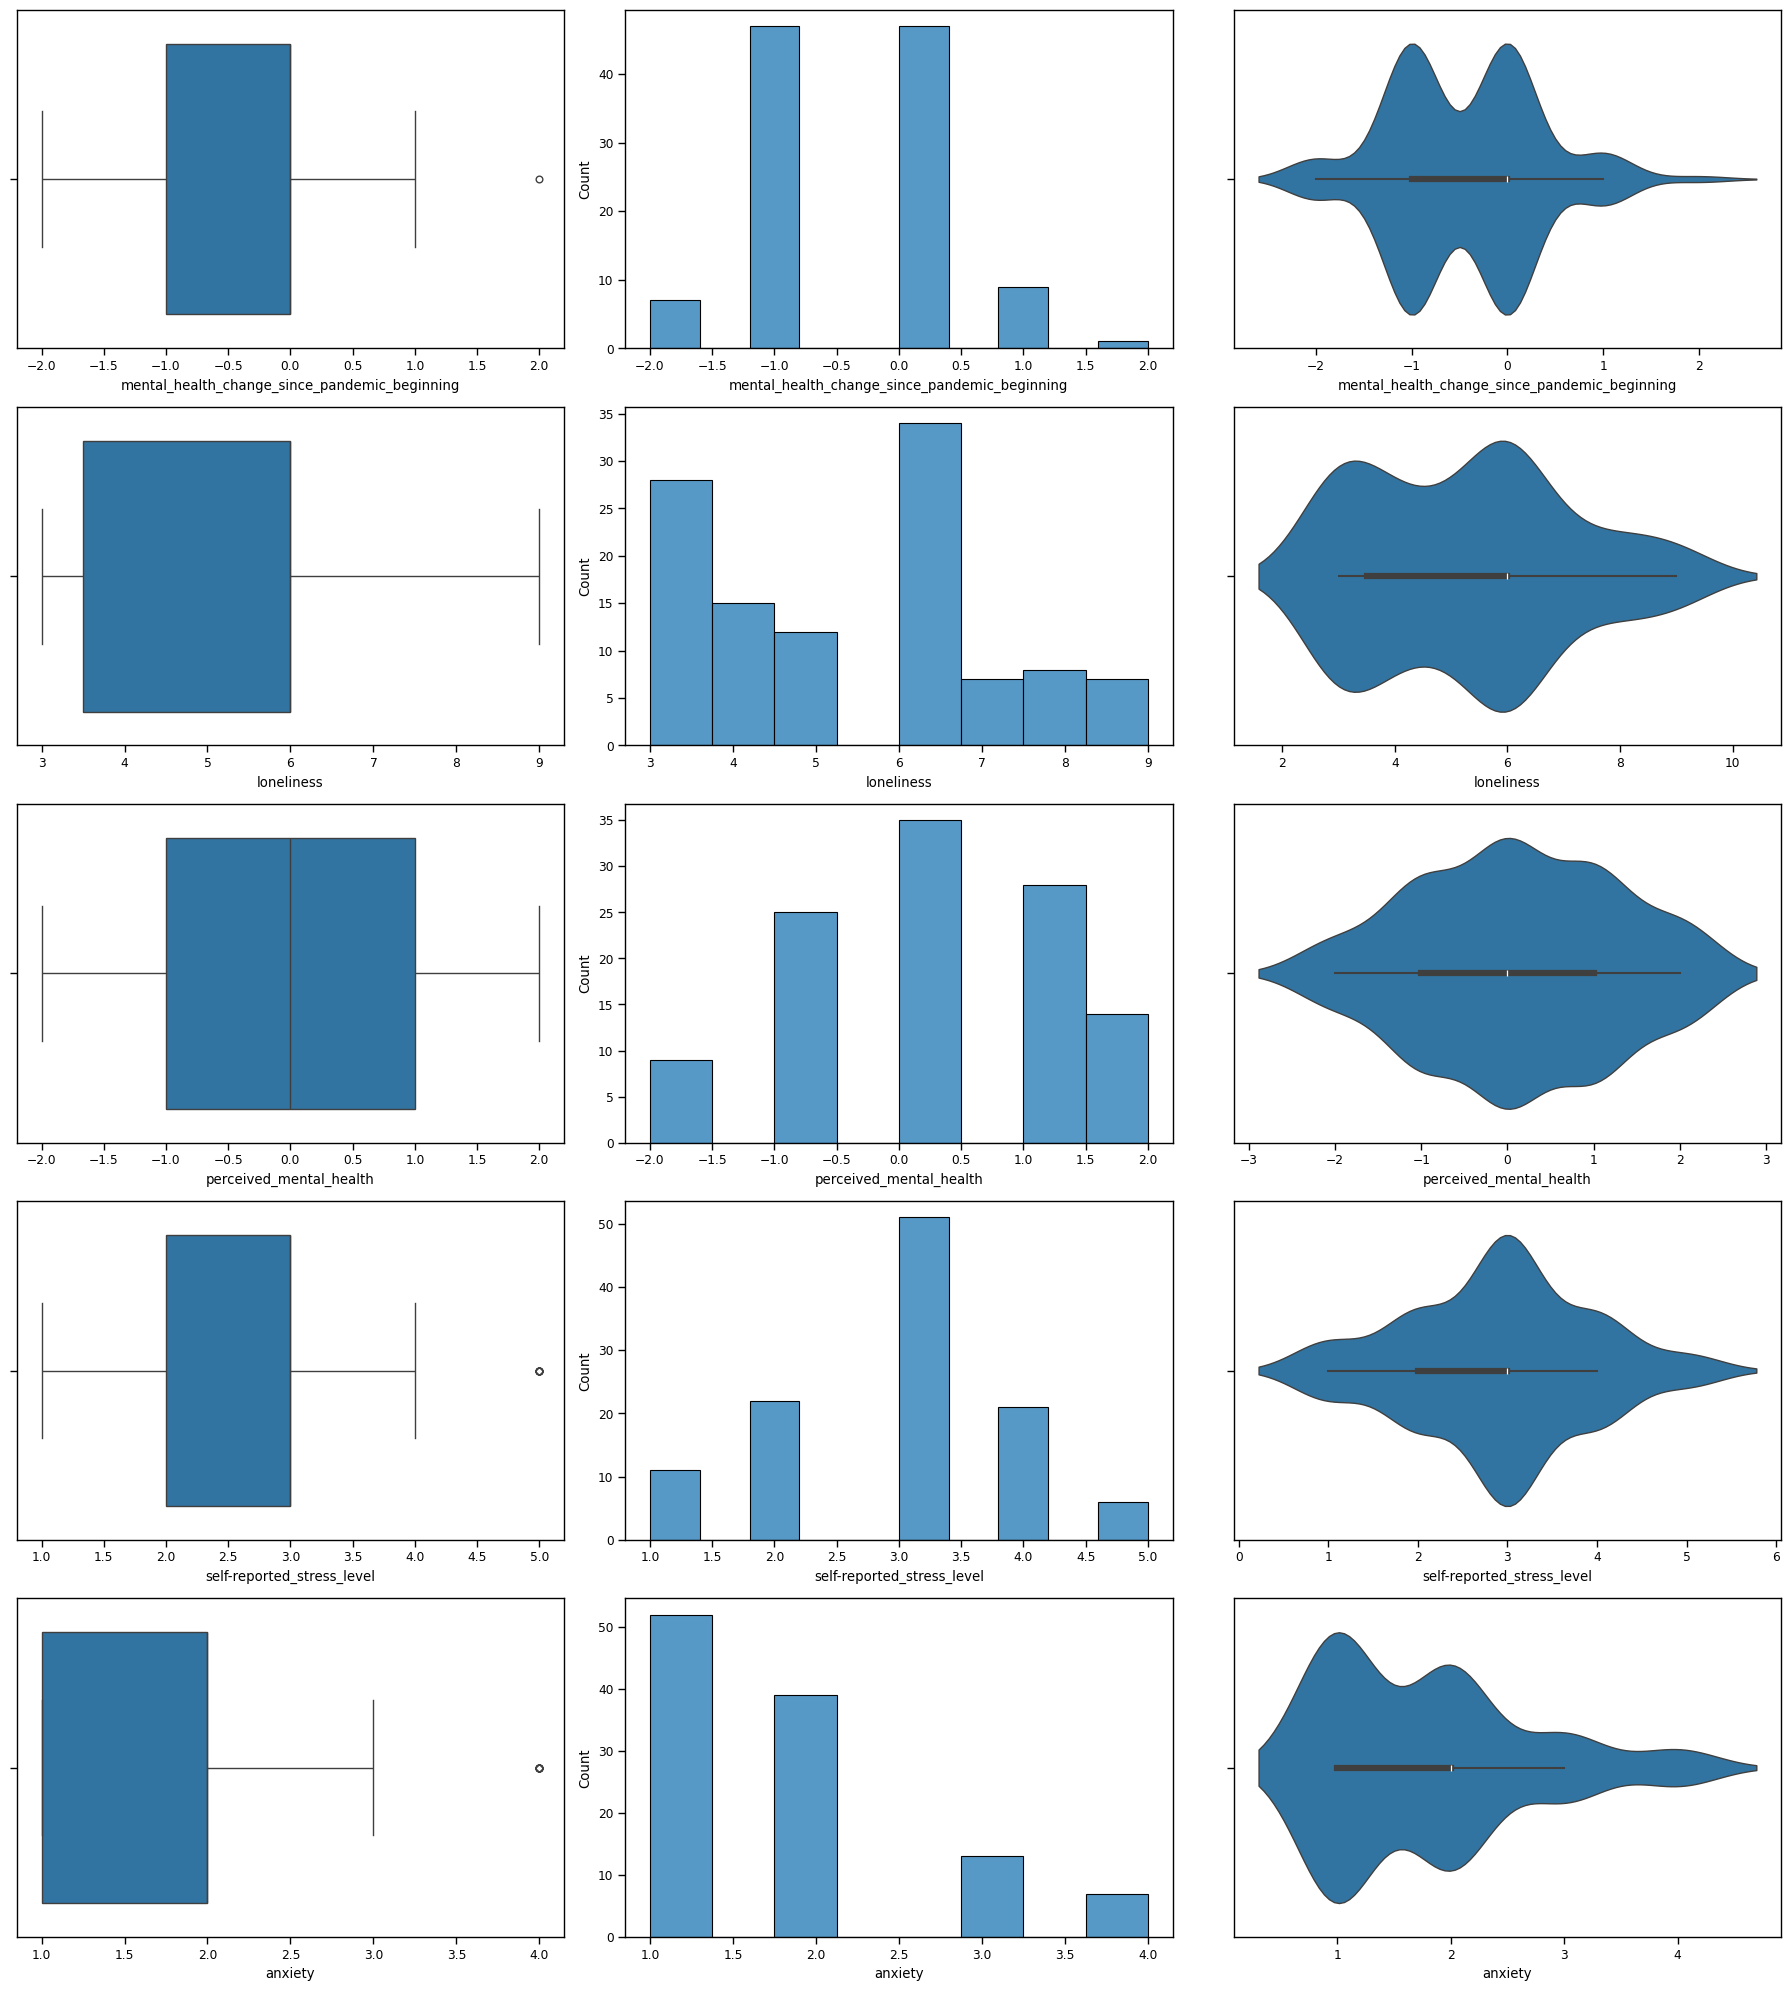

Ontario


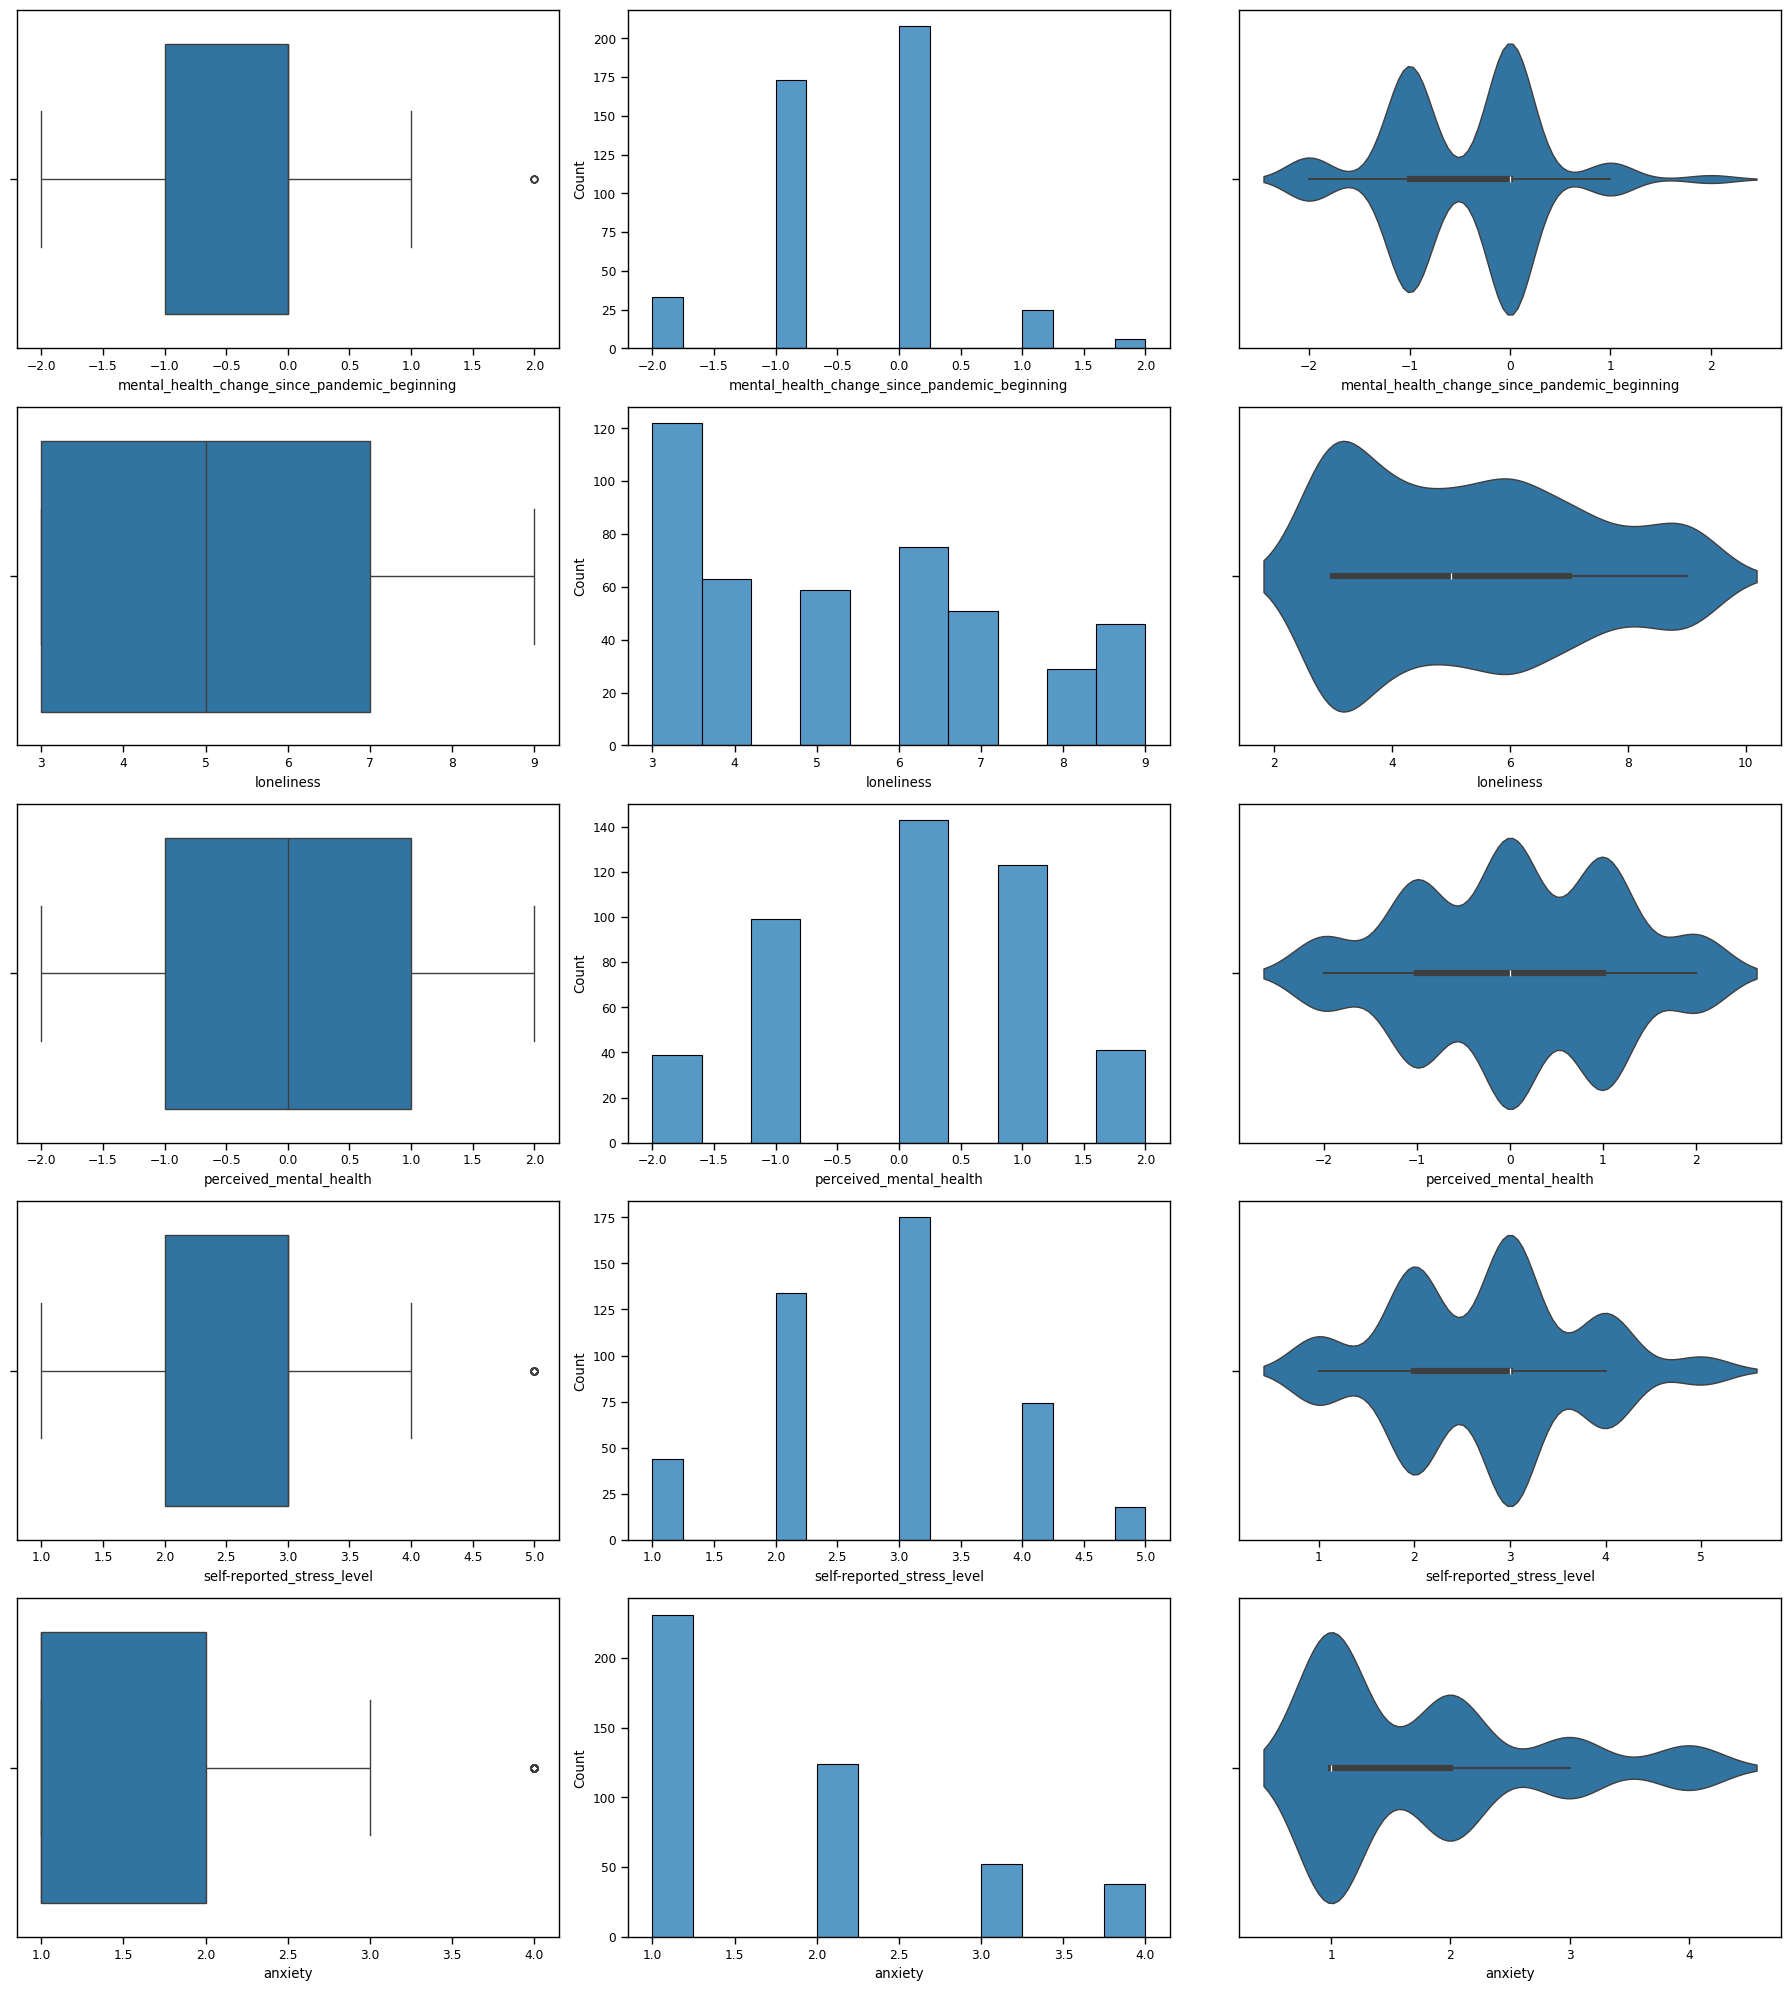

Saskatchewan


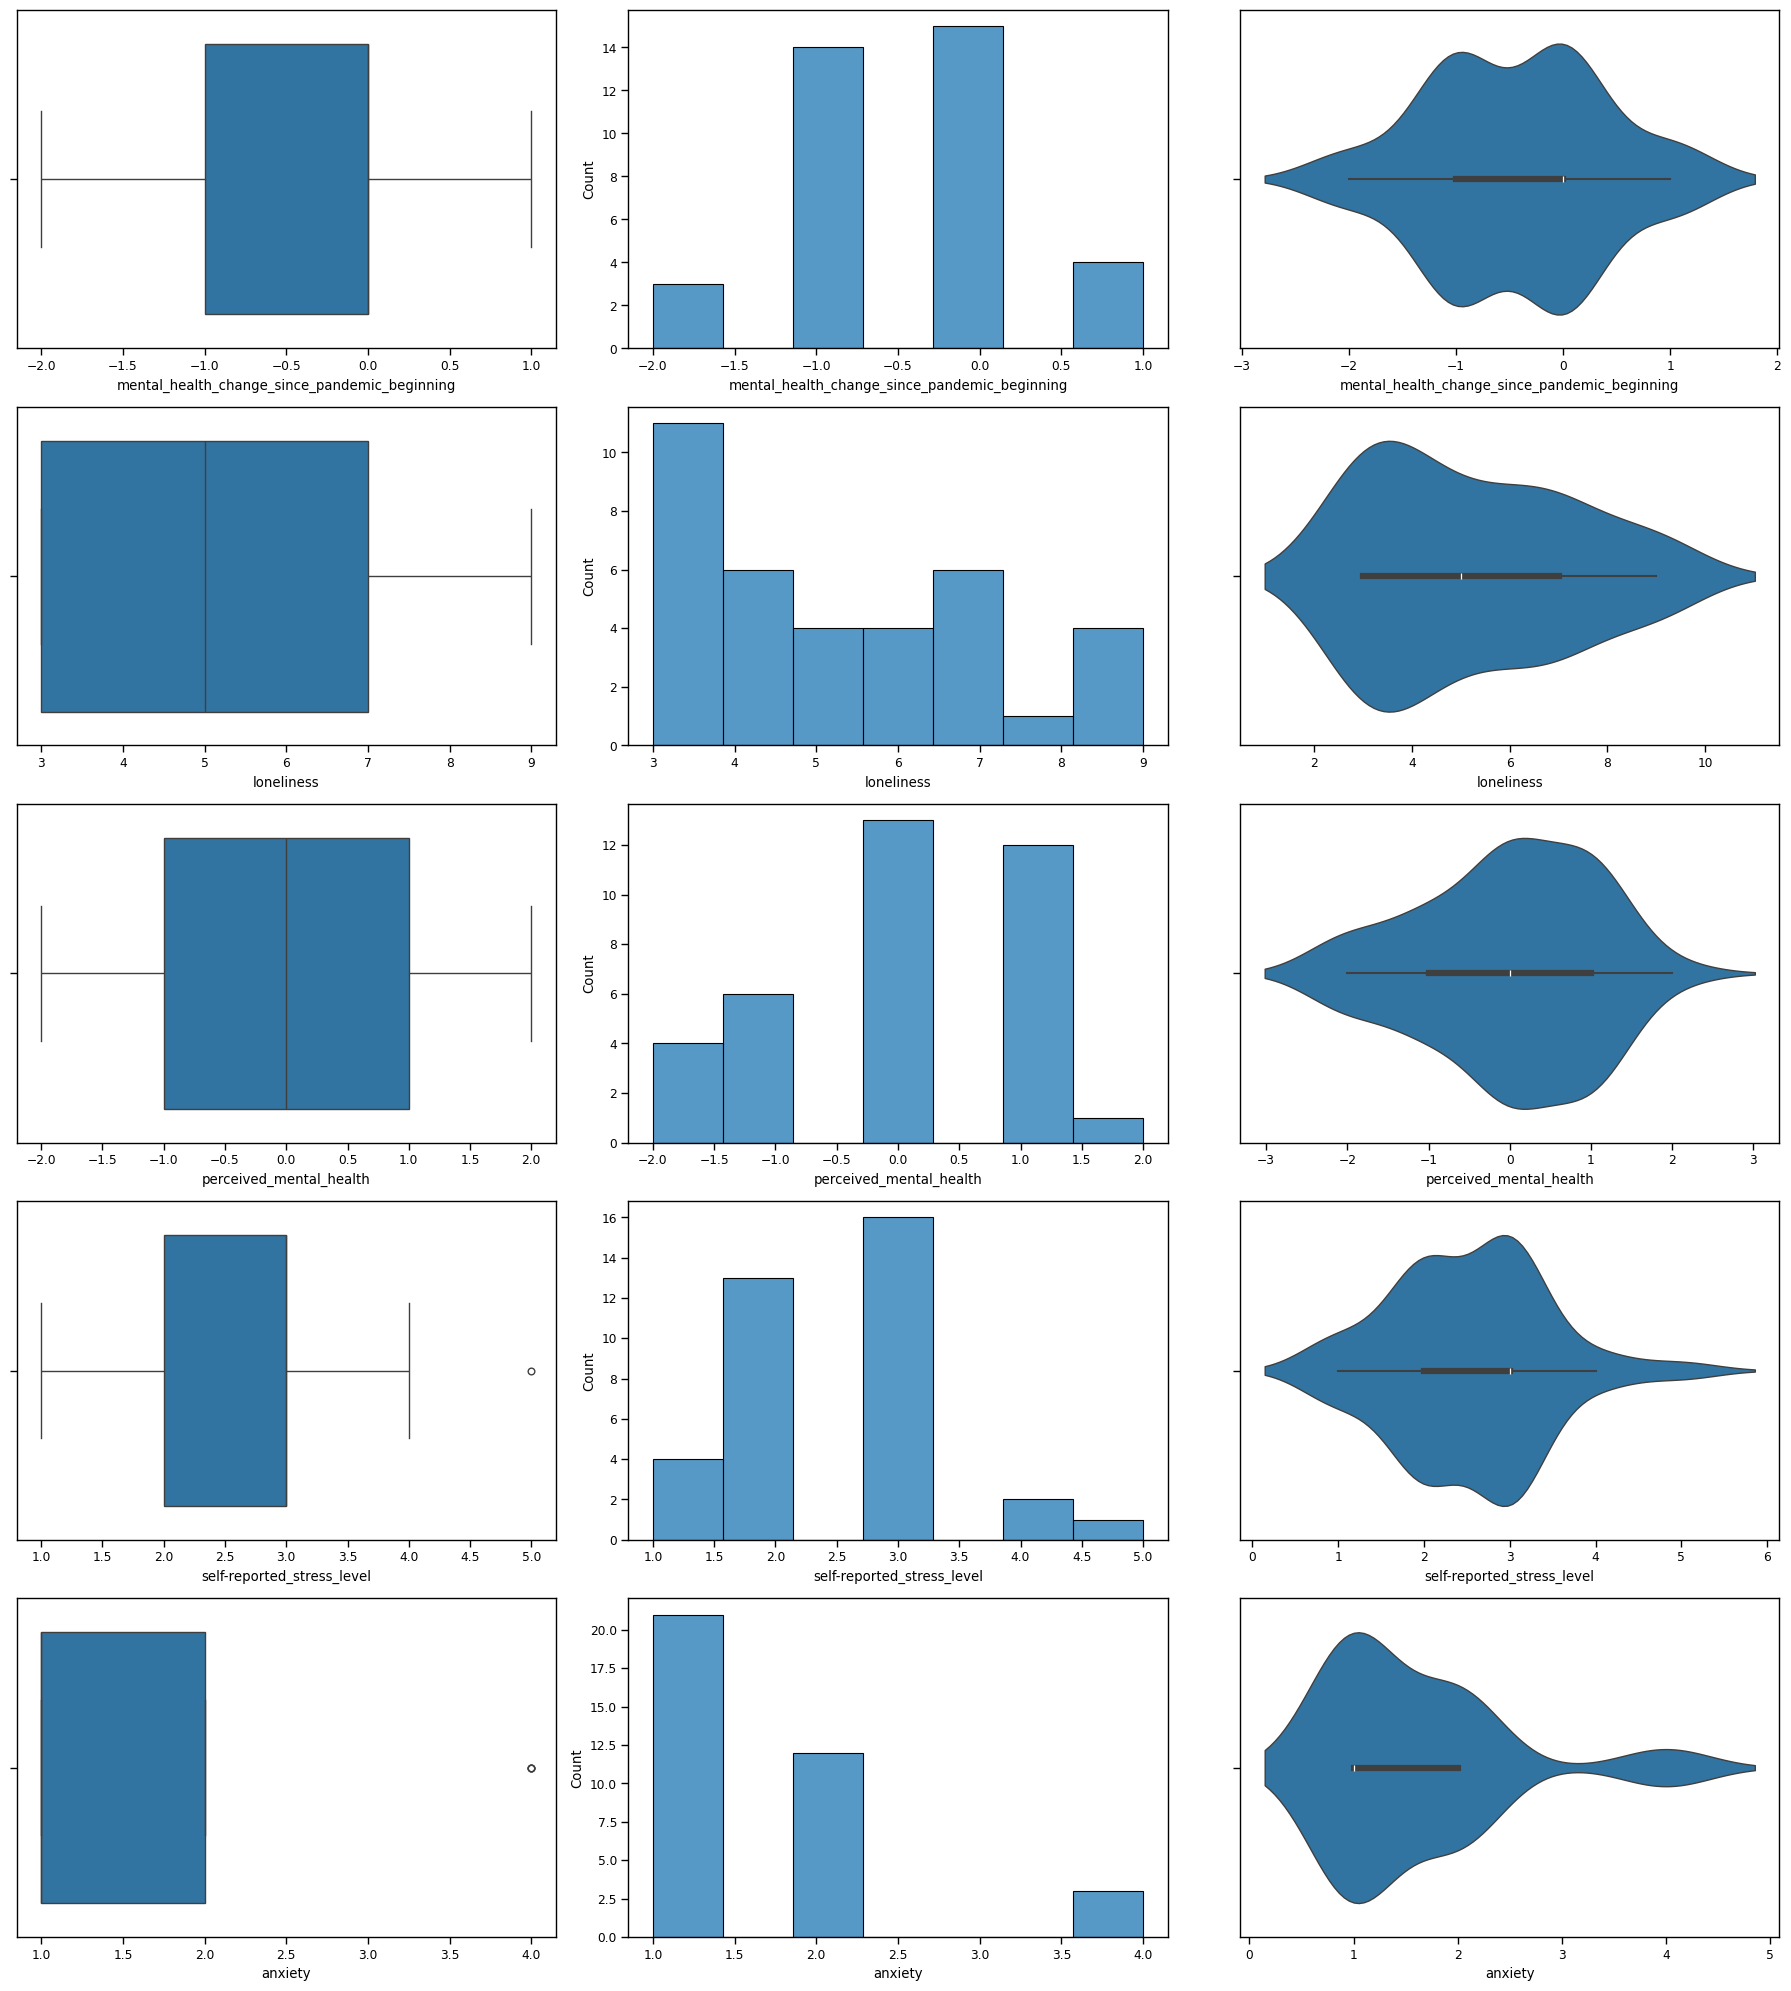

Qu�bec


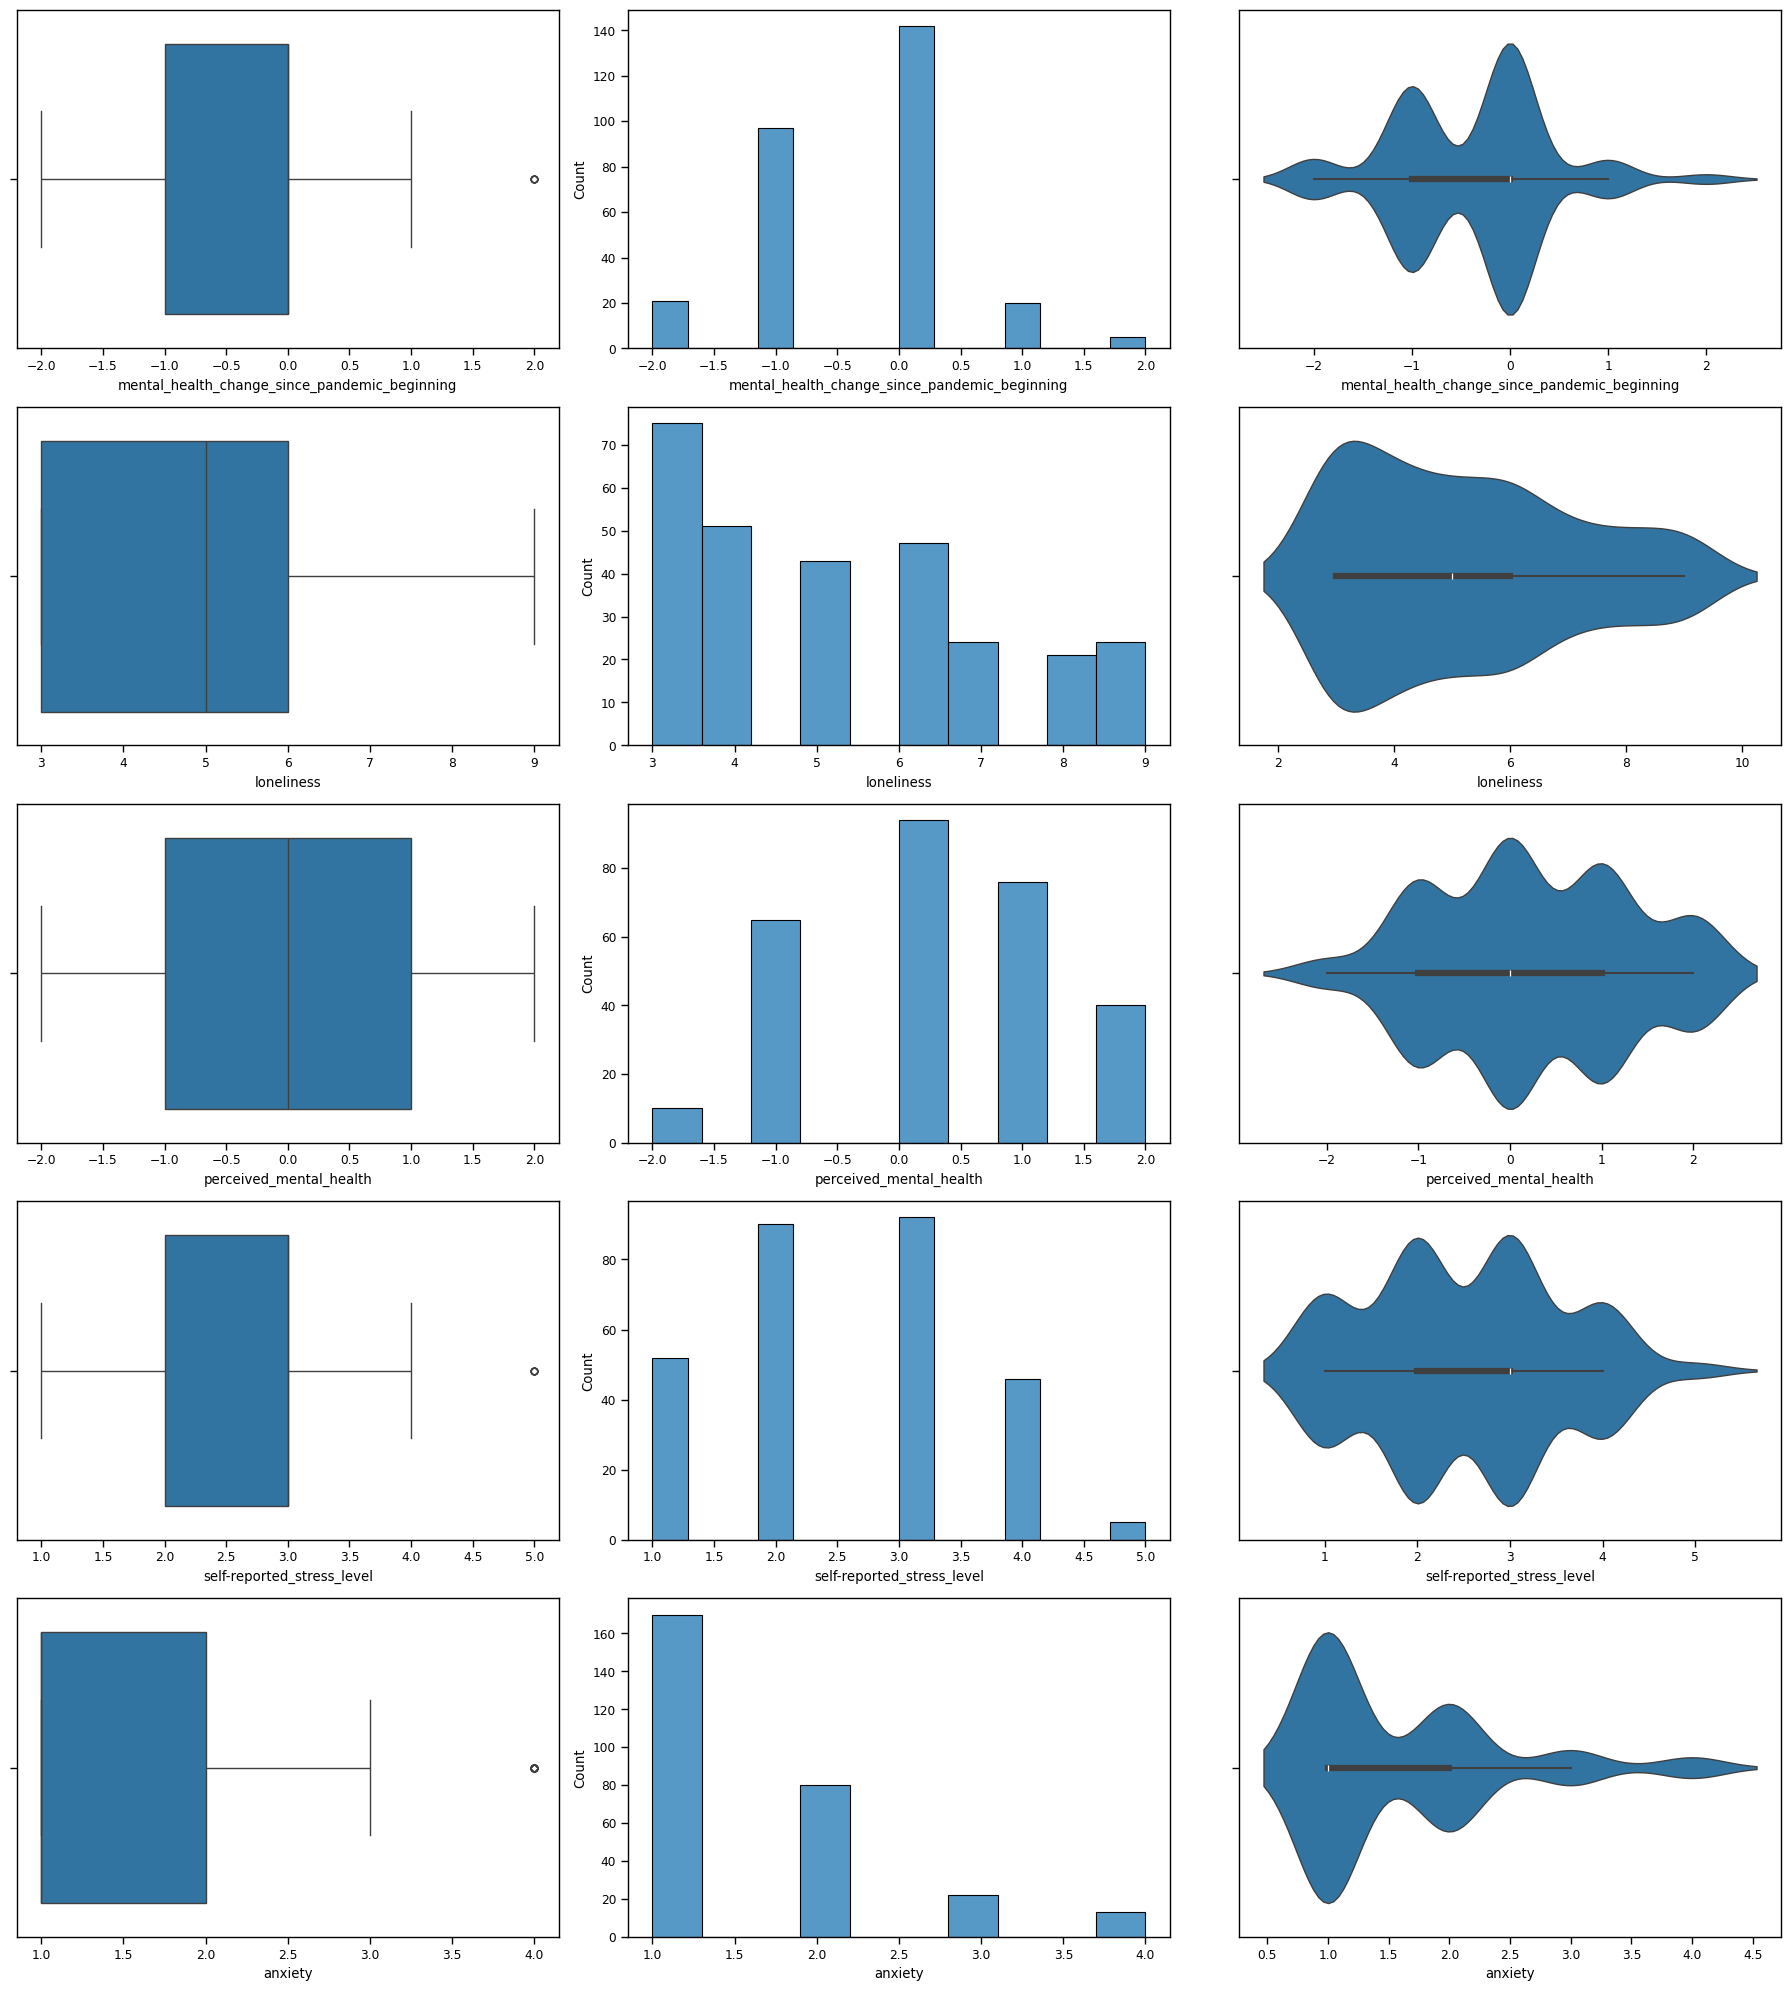

New Brunswick


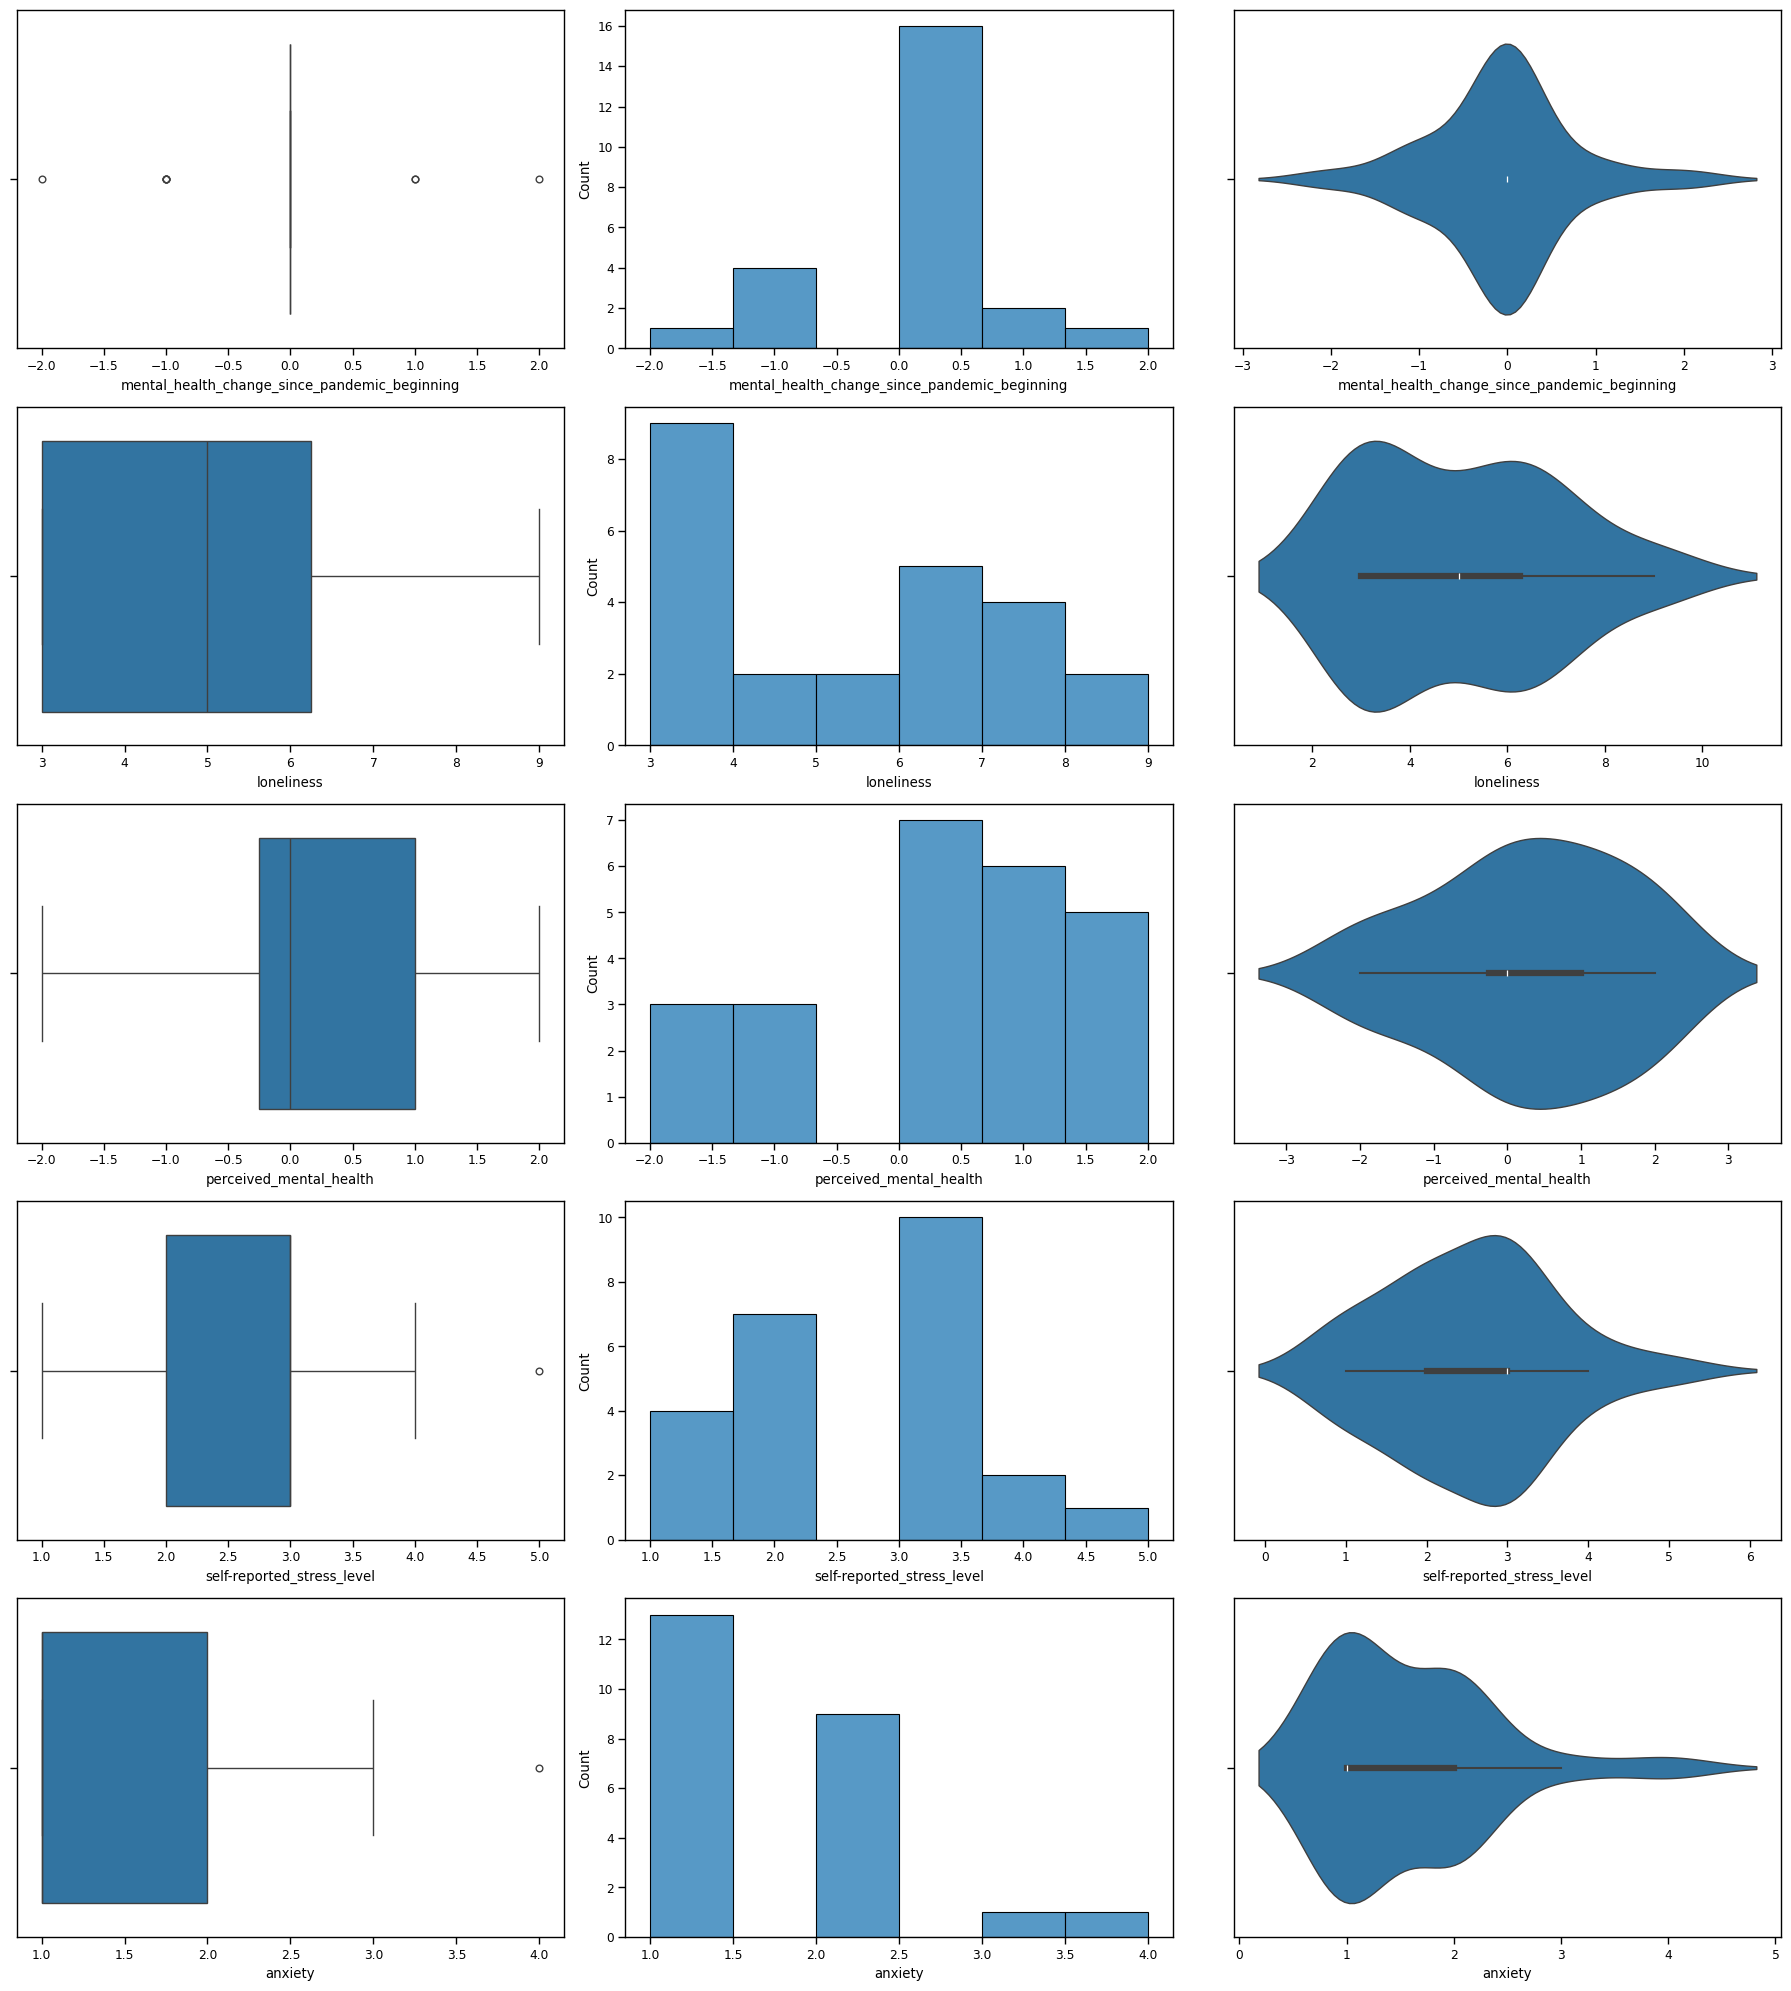

Manitoba


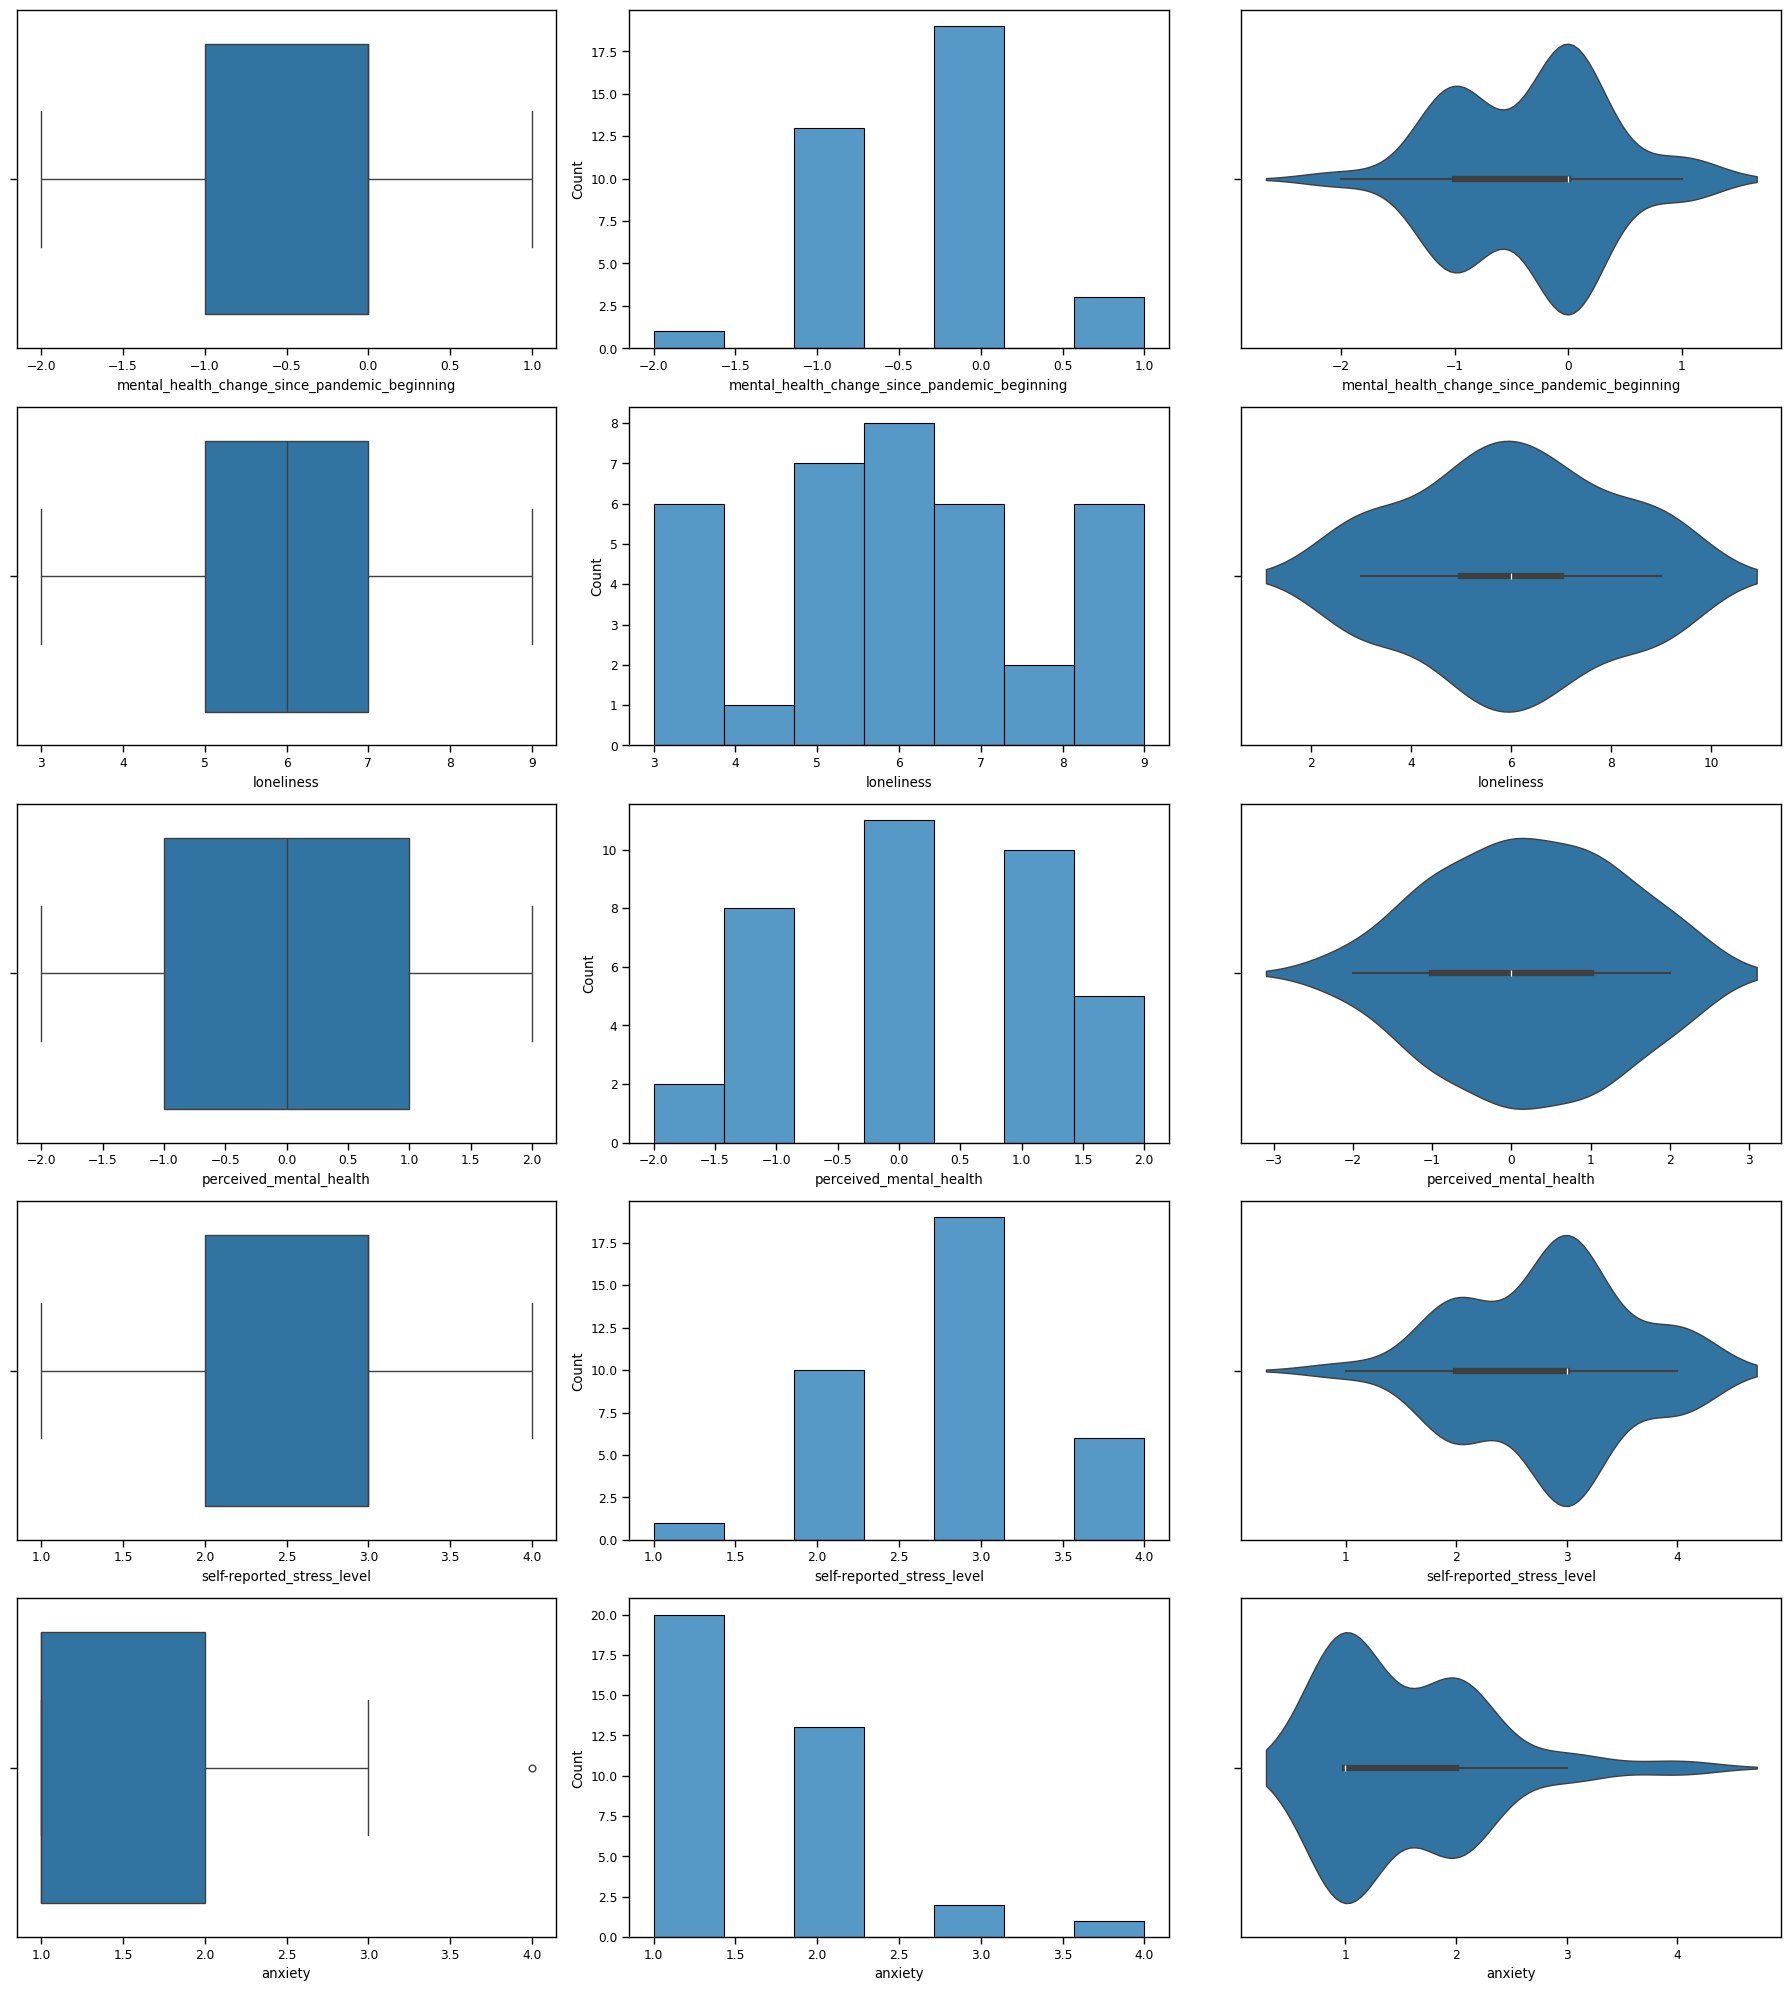

Nova Scotia


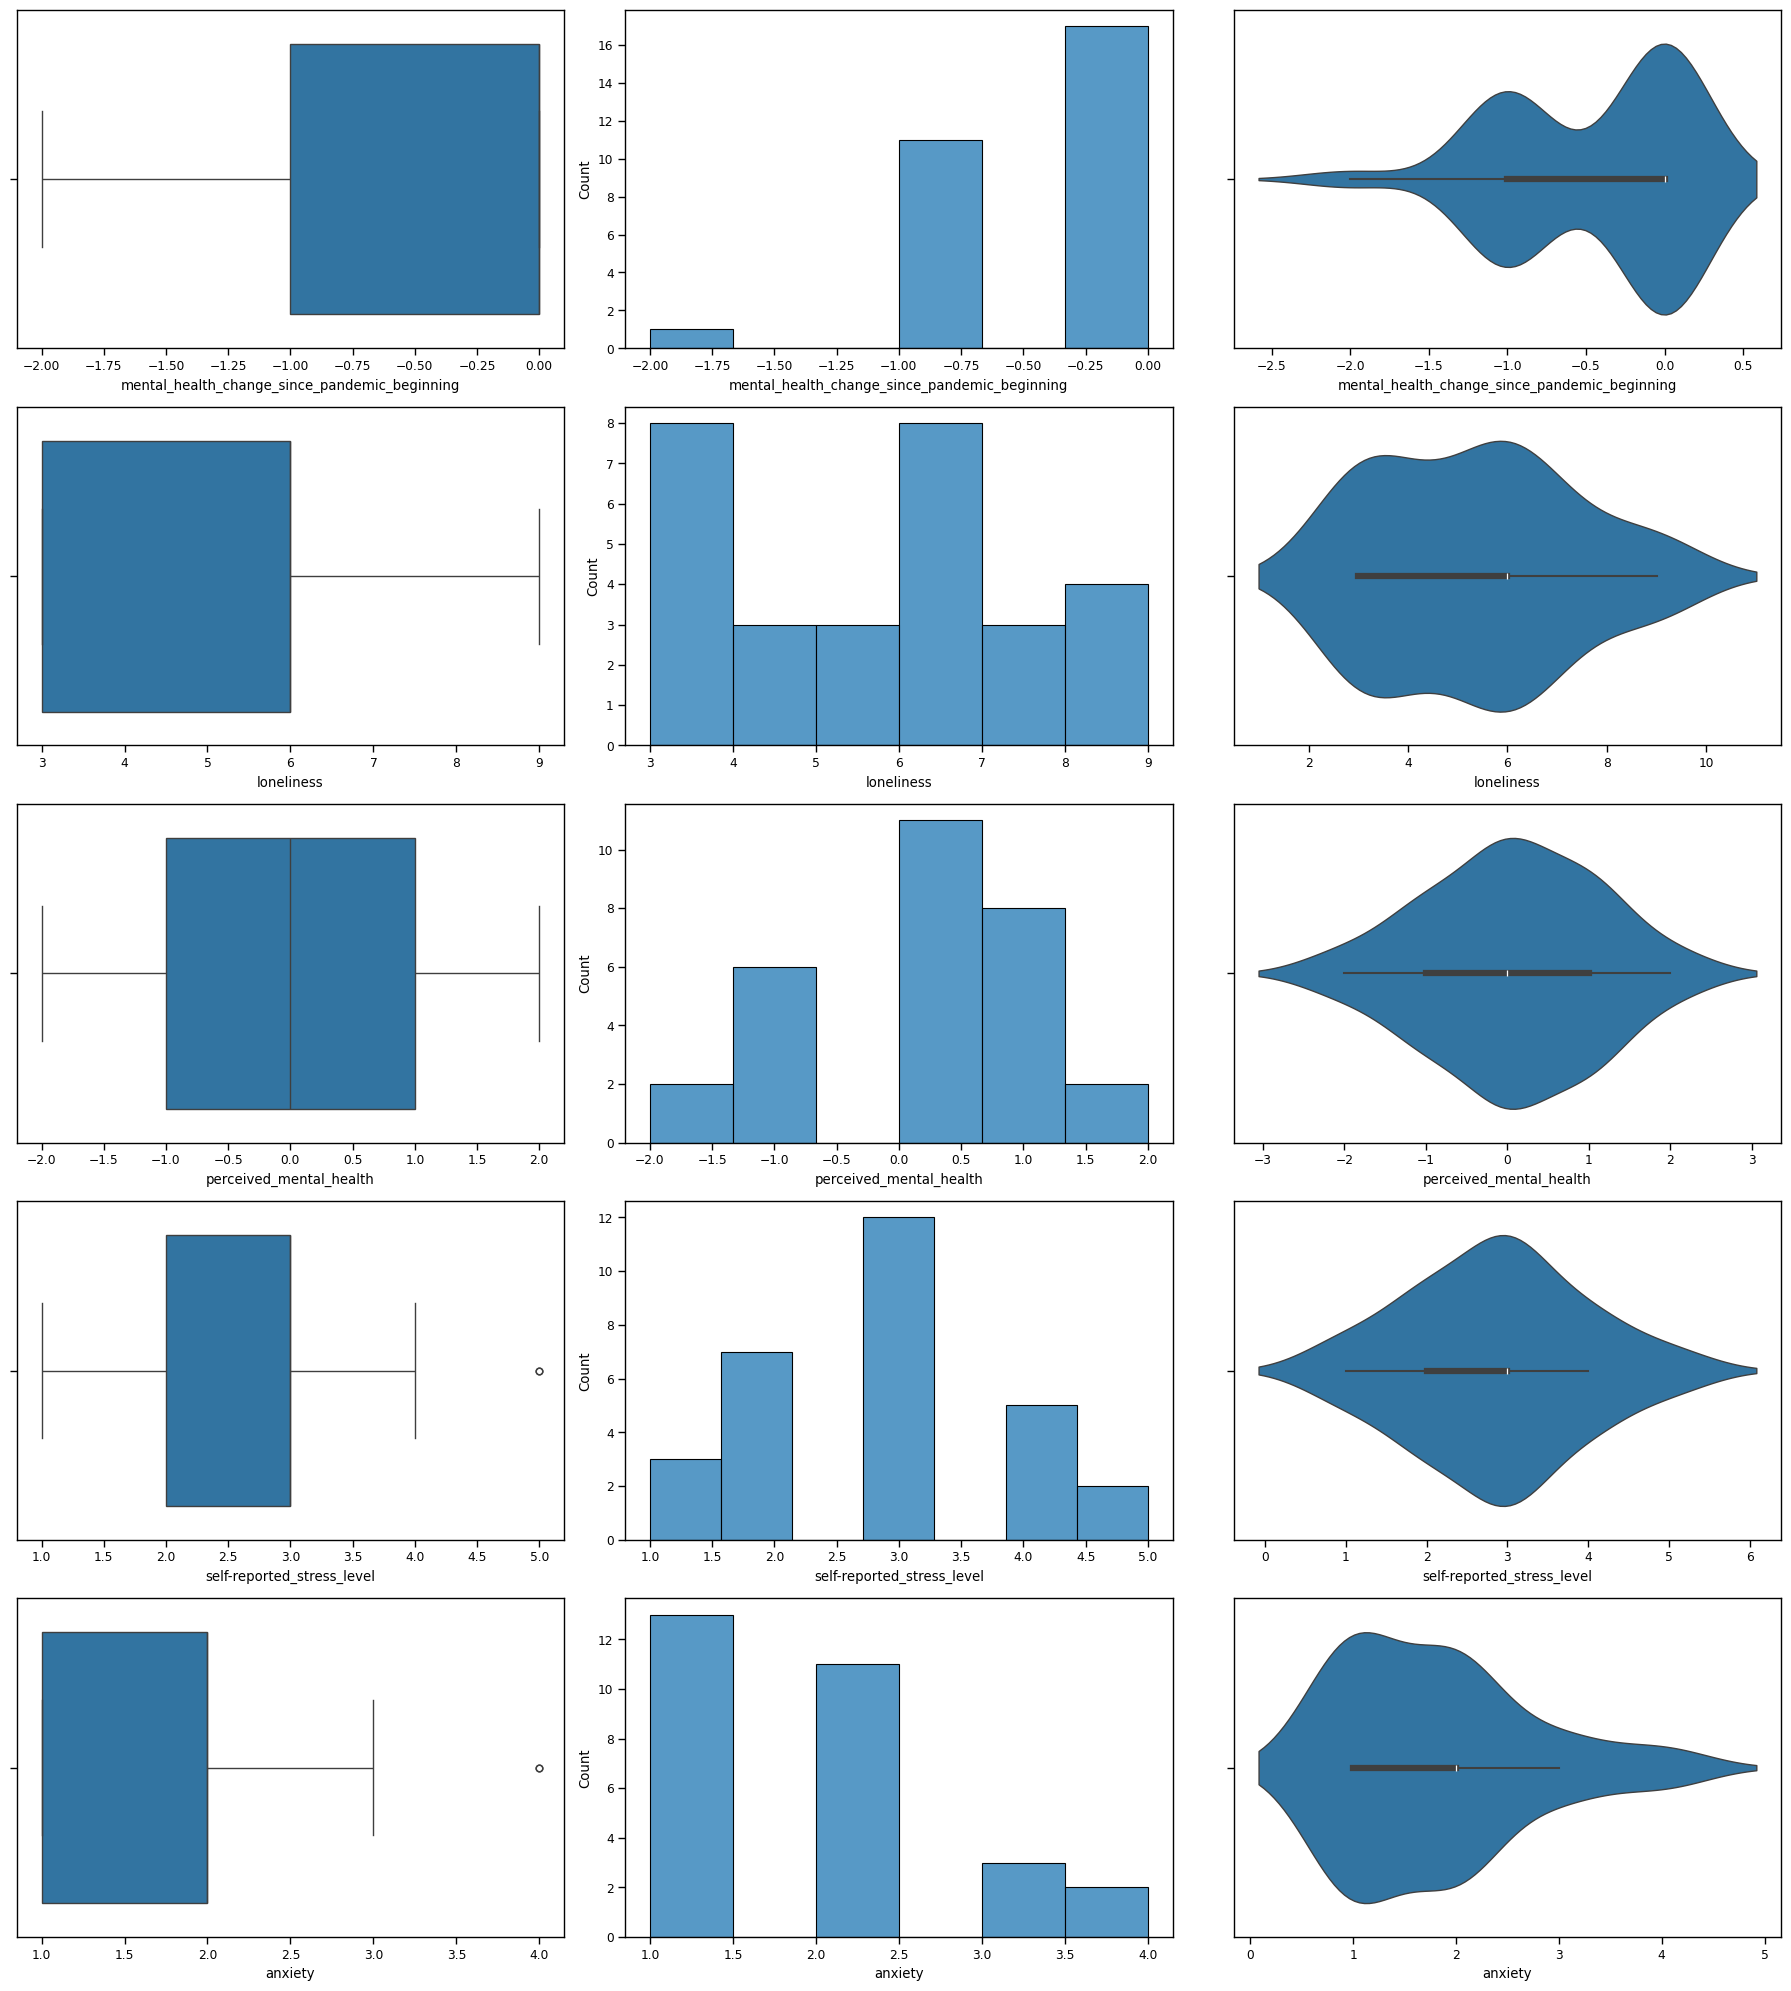

In [602]:
import time

print('PROVINCE')
for key in province_dict.keys():
    print(key)
    locationPlots(key, province_dict[key])
    plt.show()
    time.sleep(3)

REGION
British Columbia


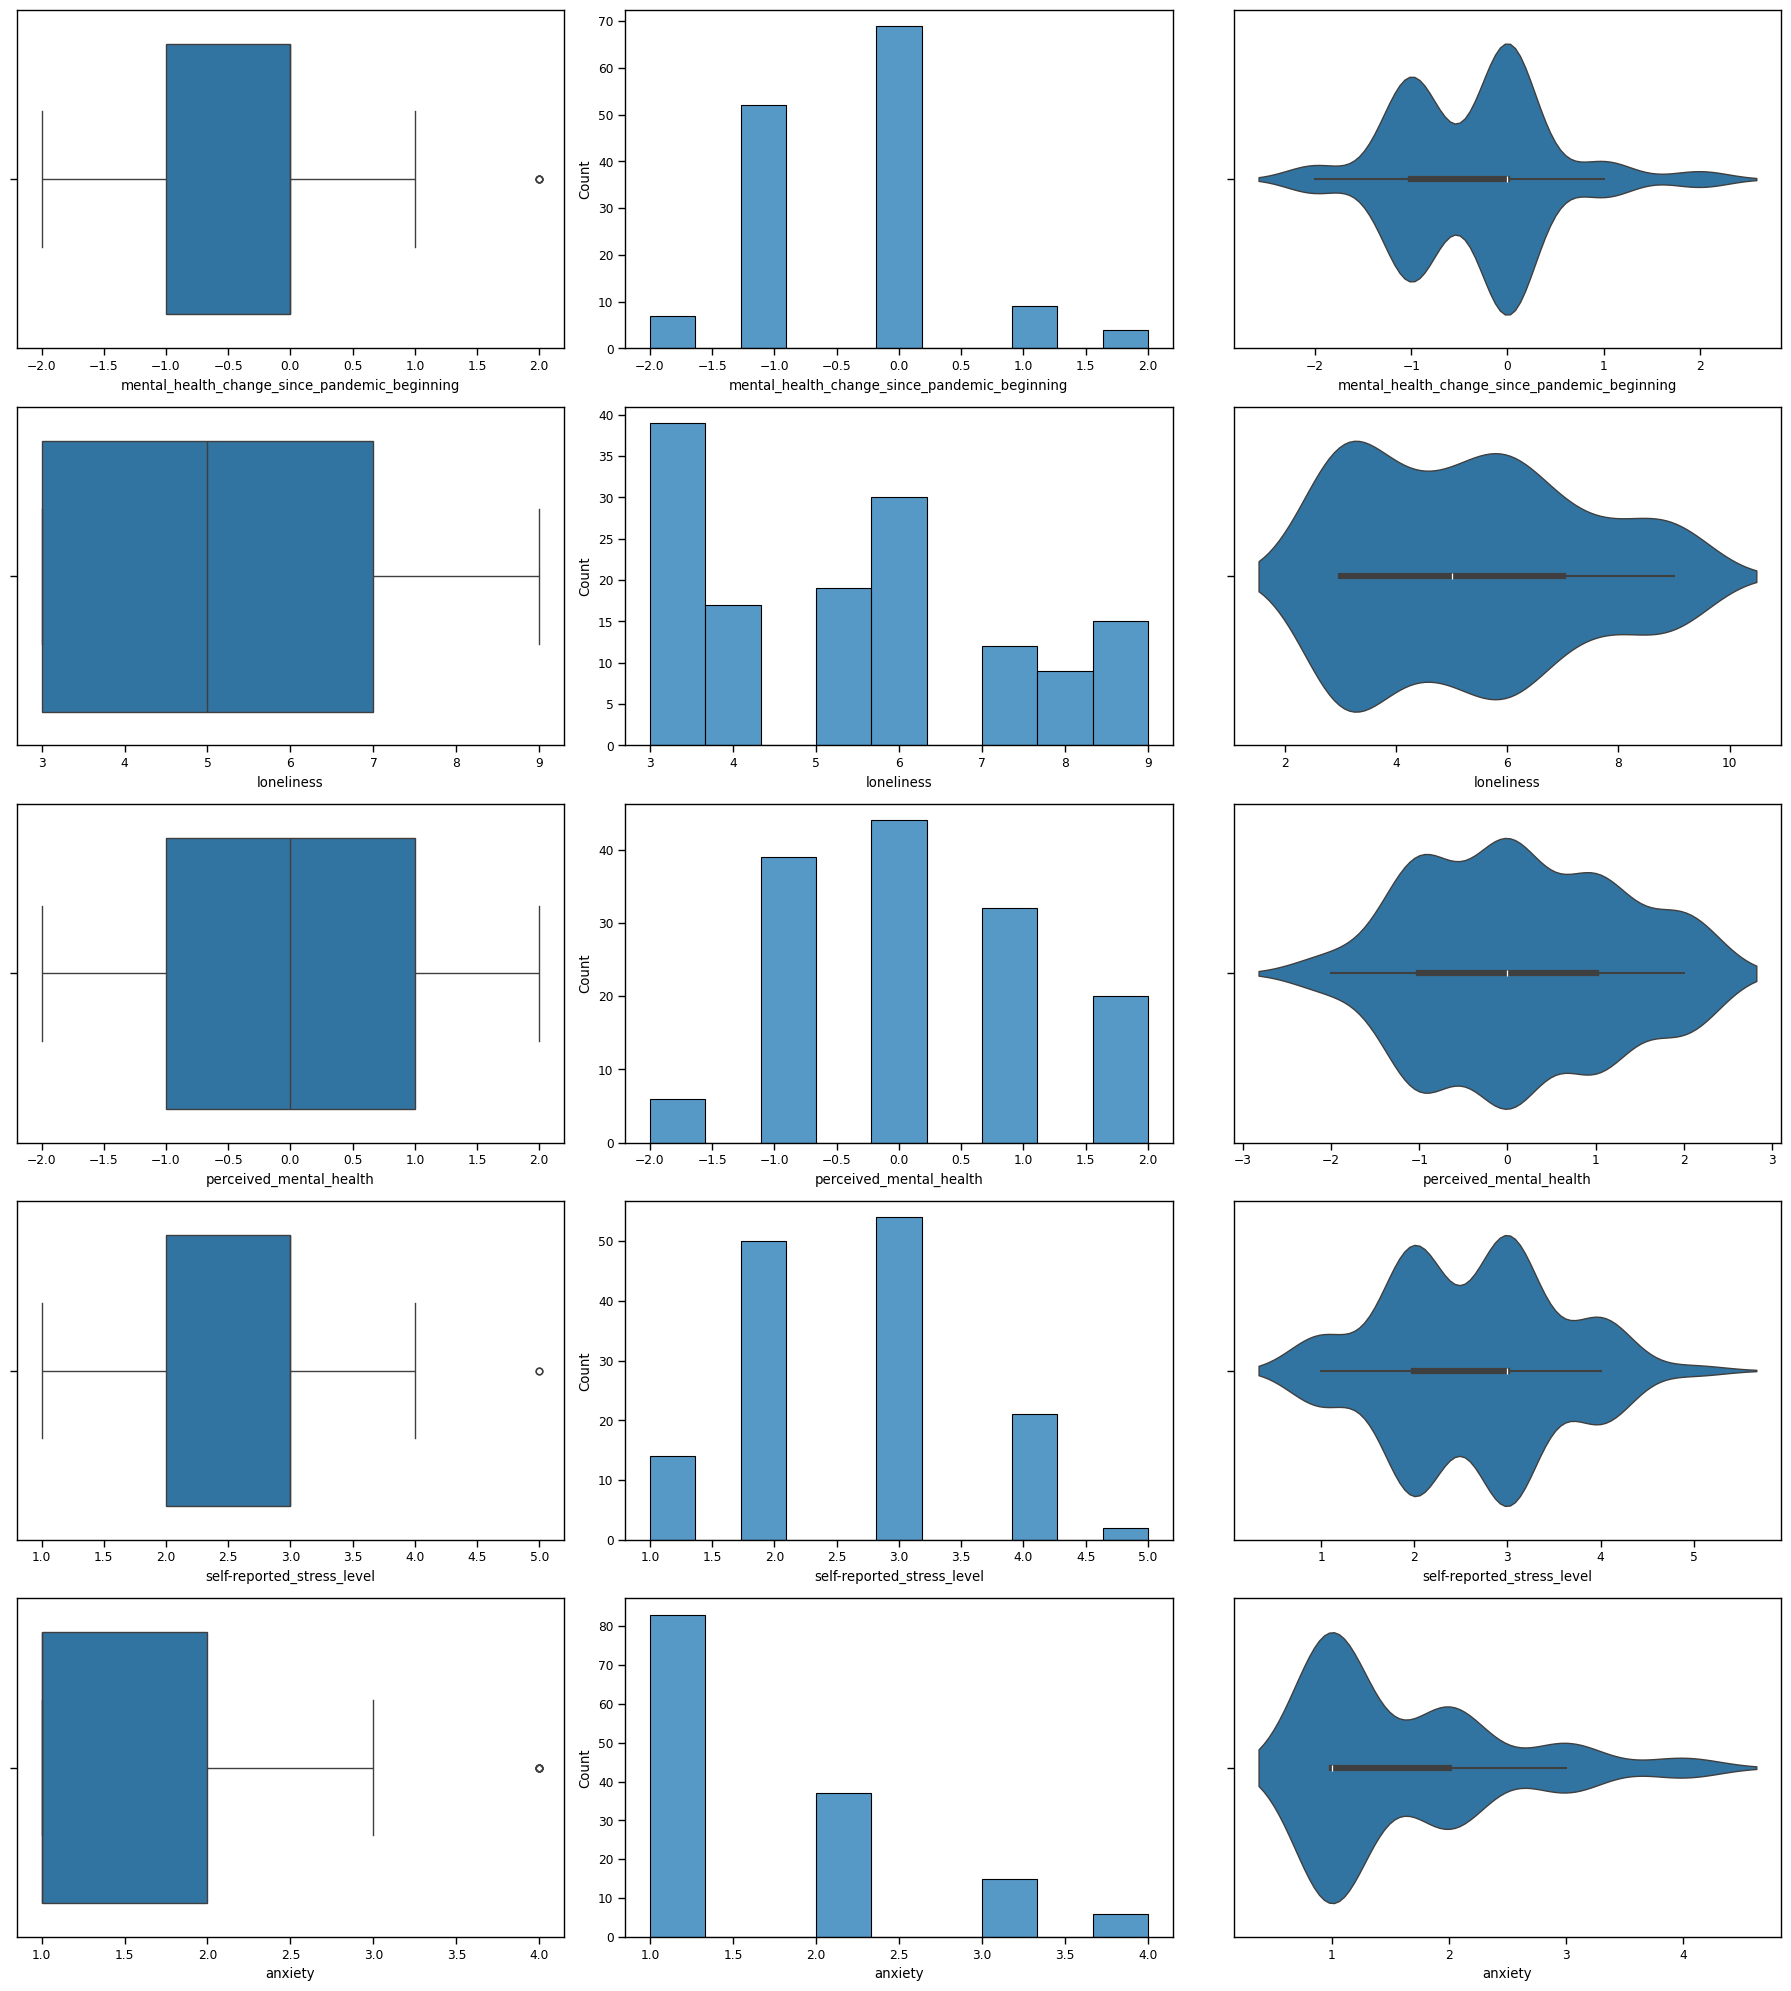

Prairies


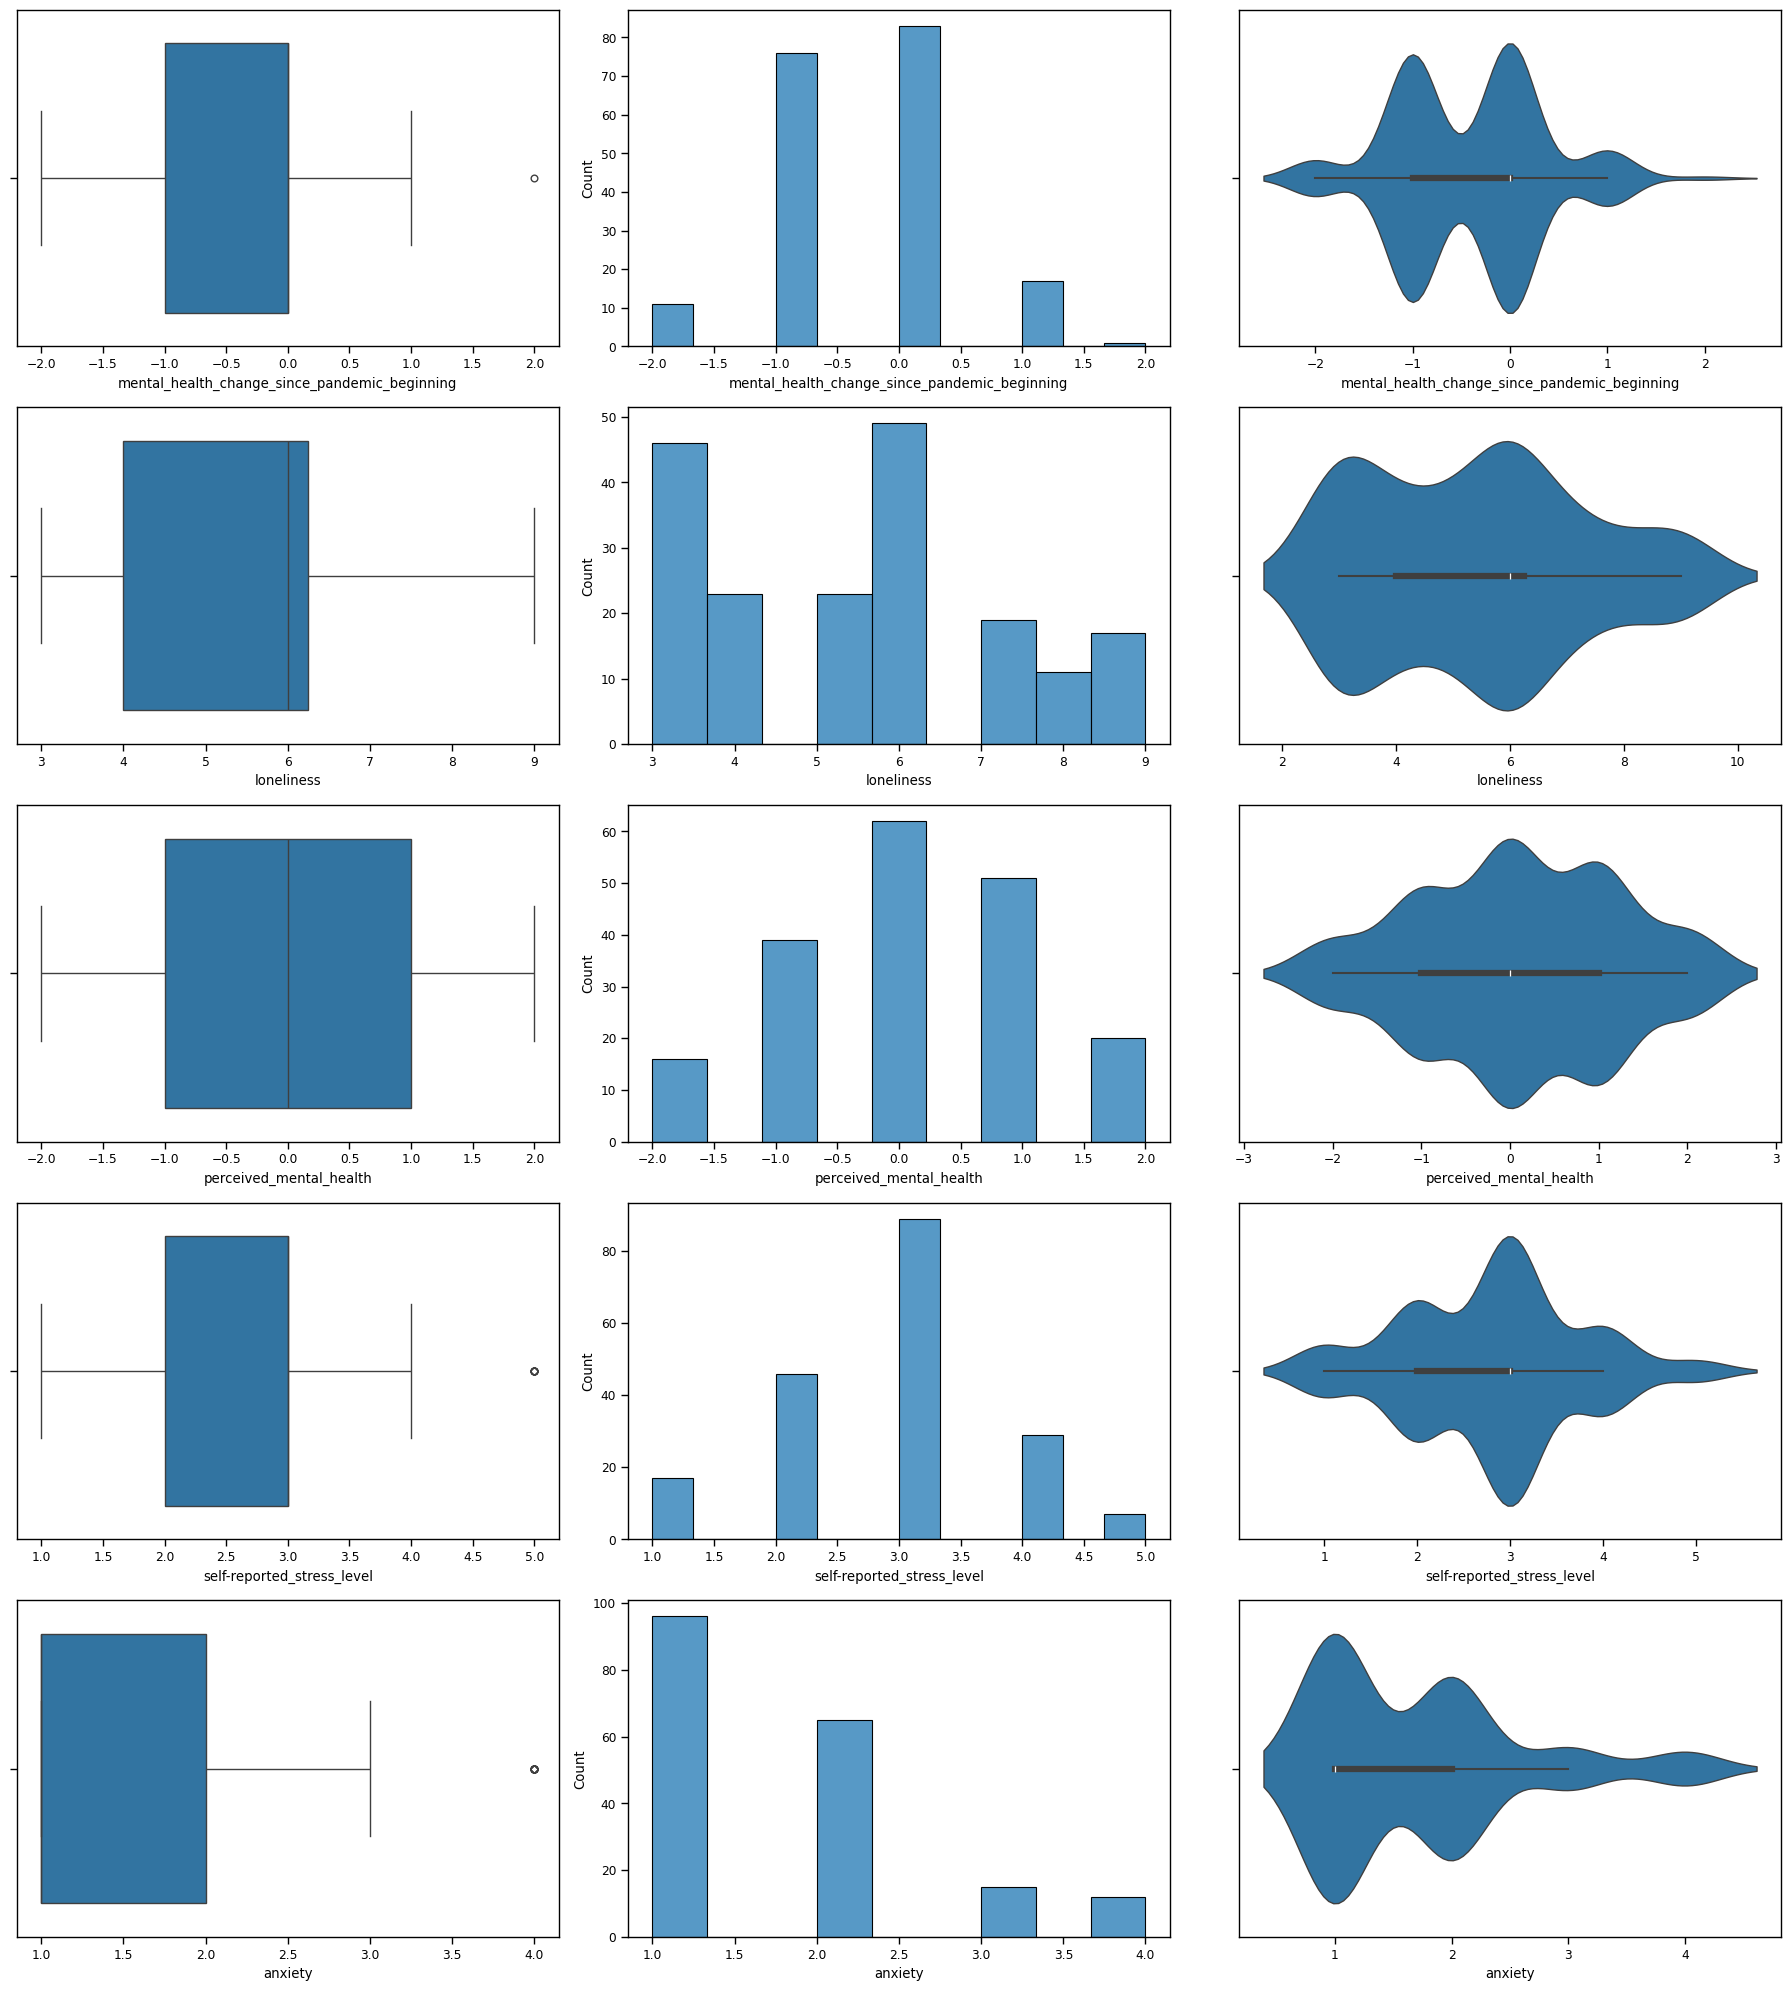

Ontario


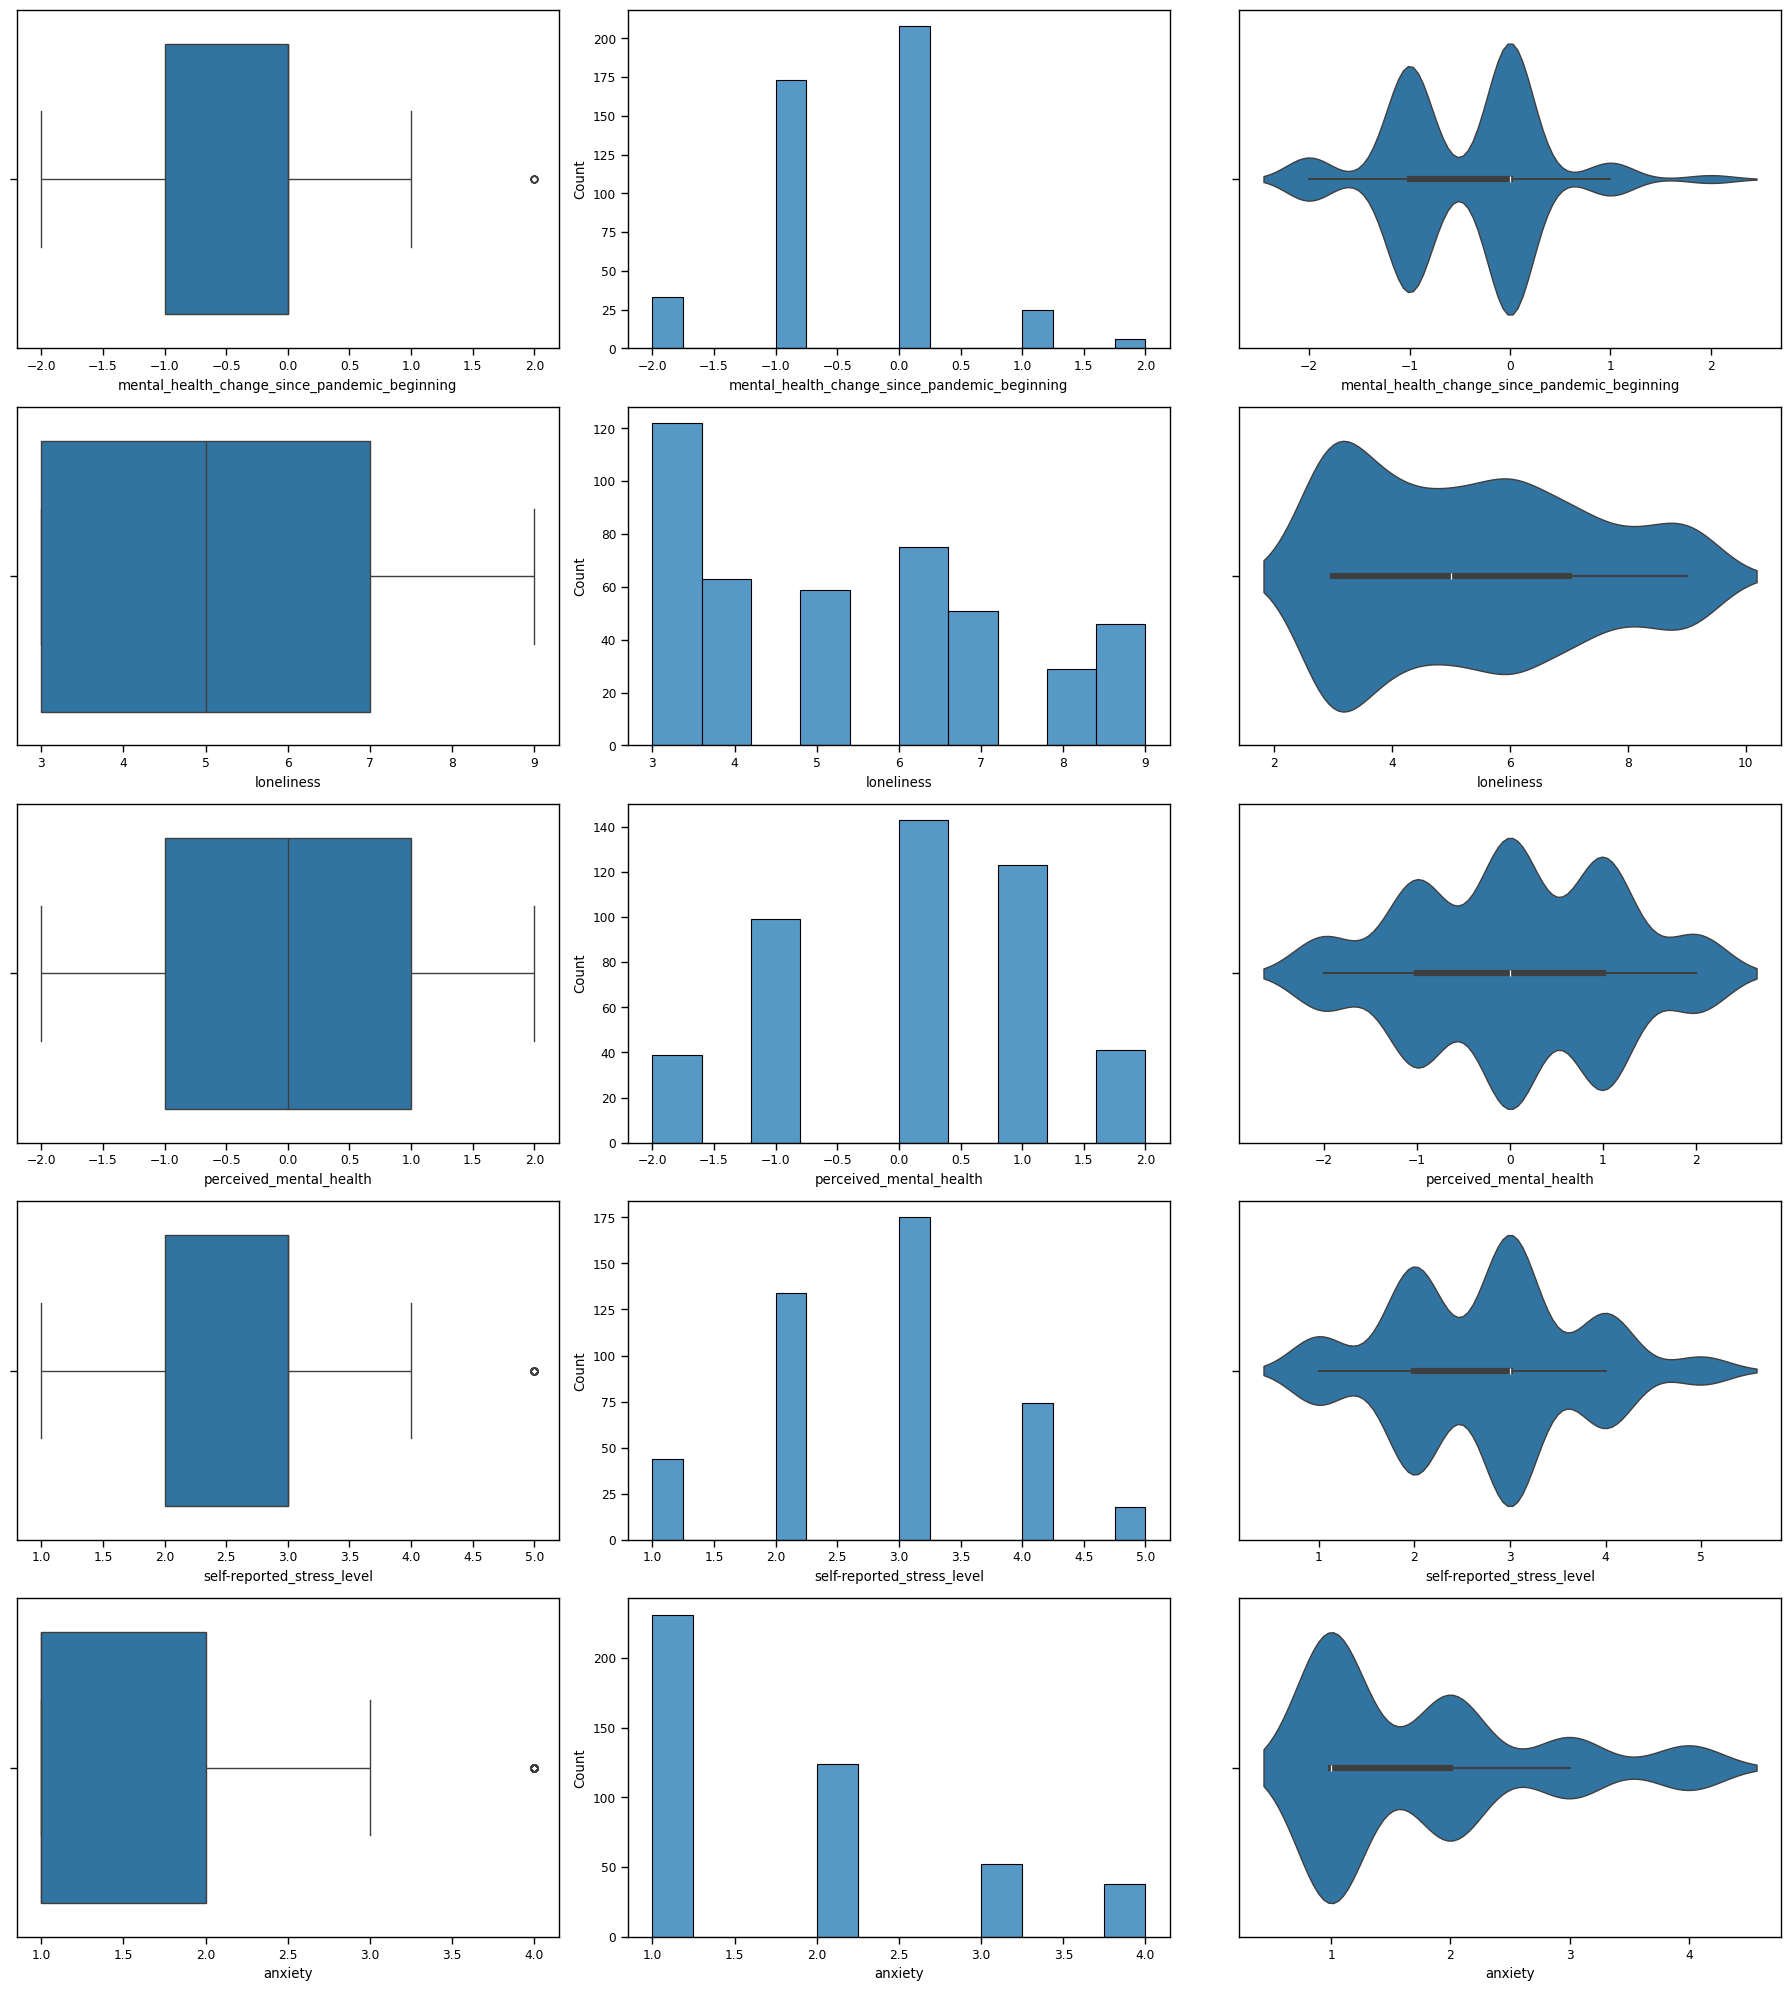

Qu�bec


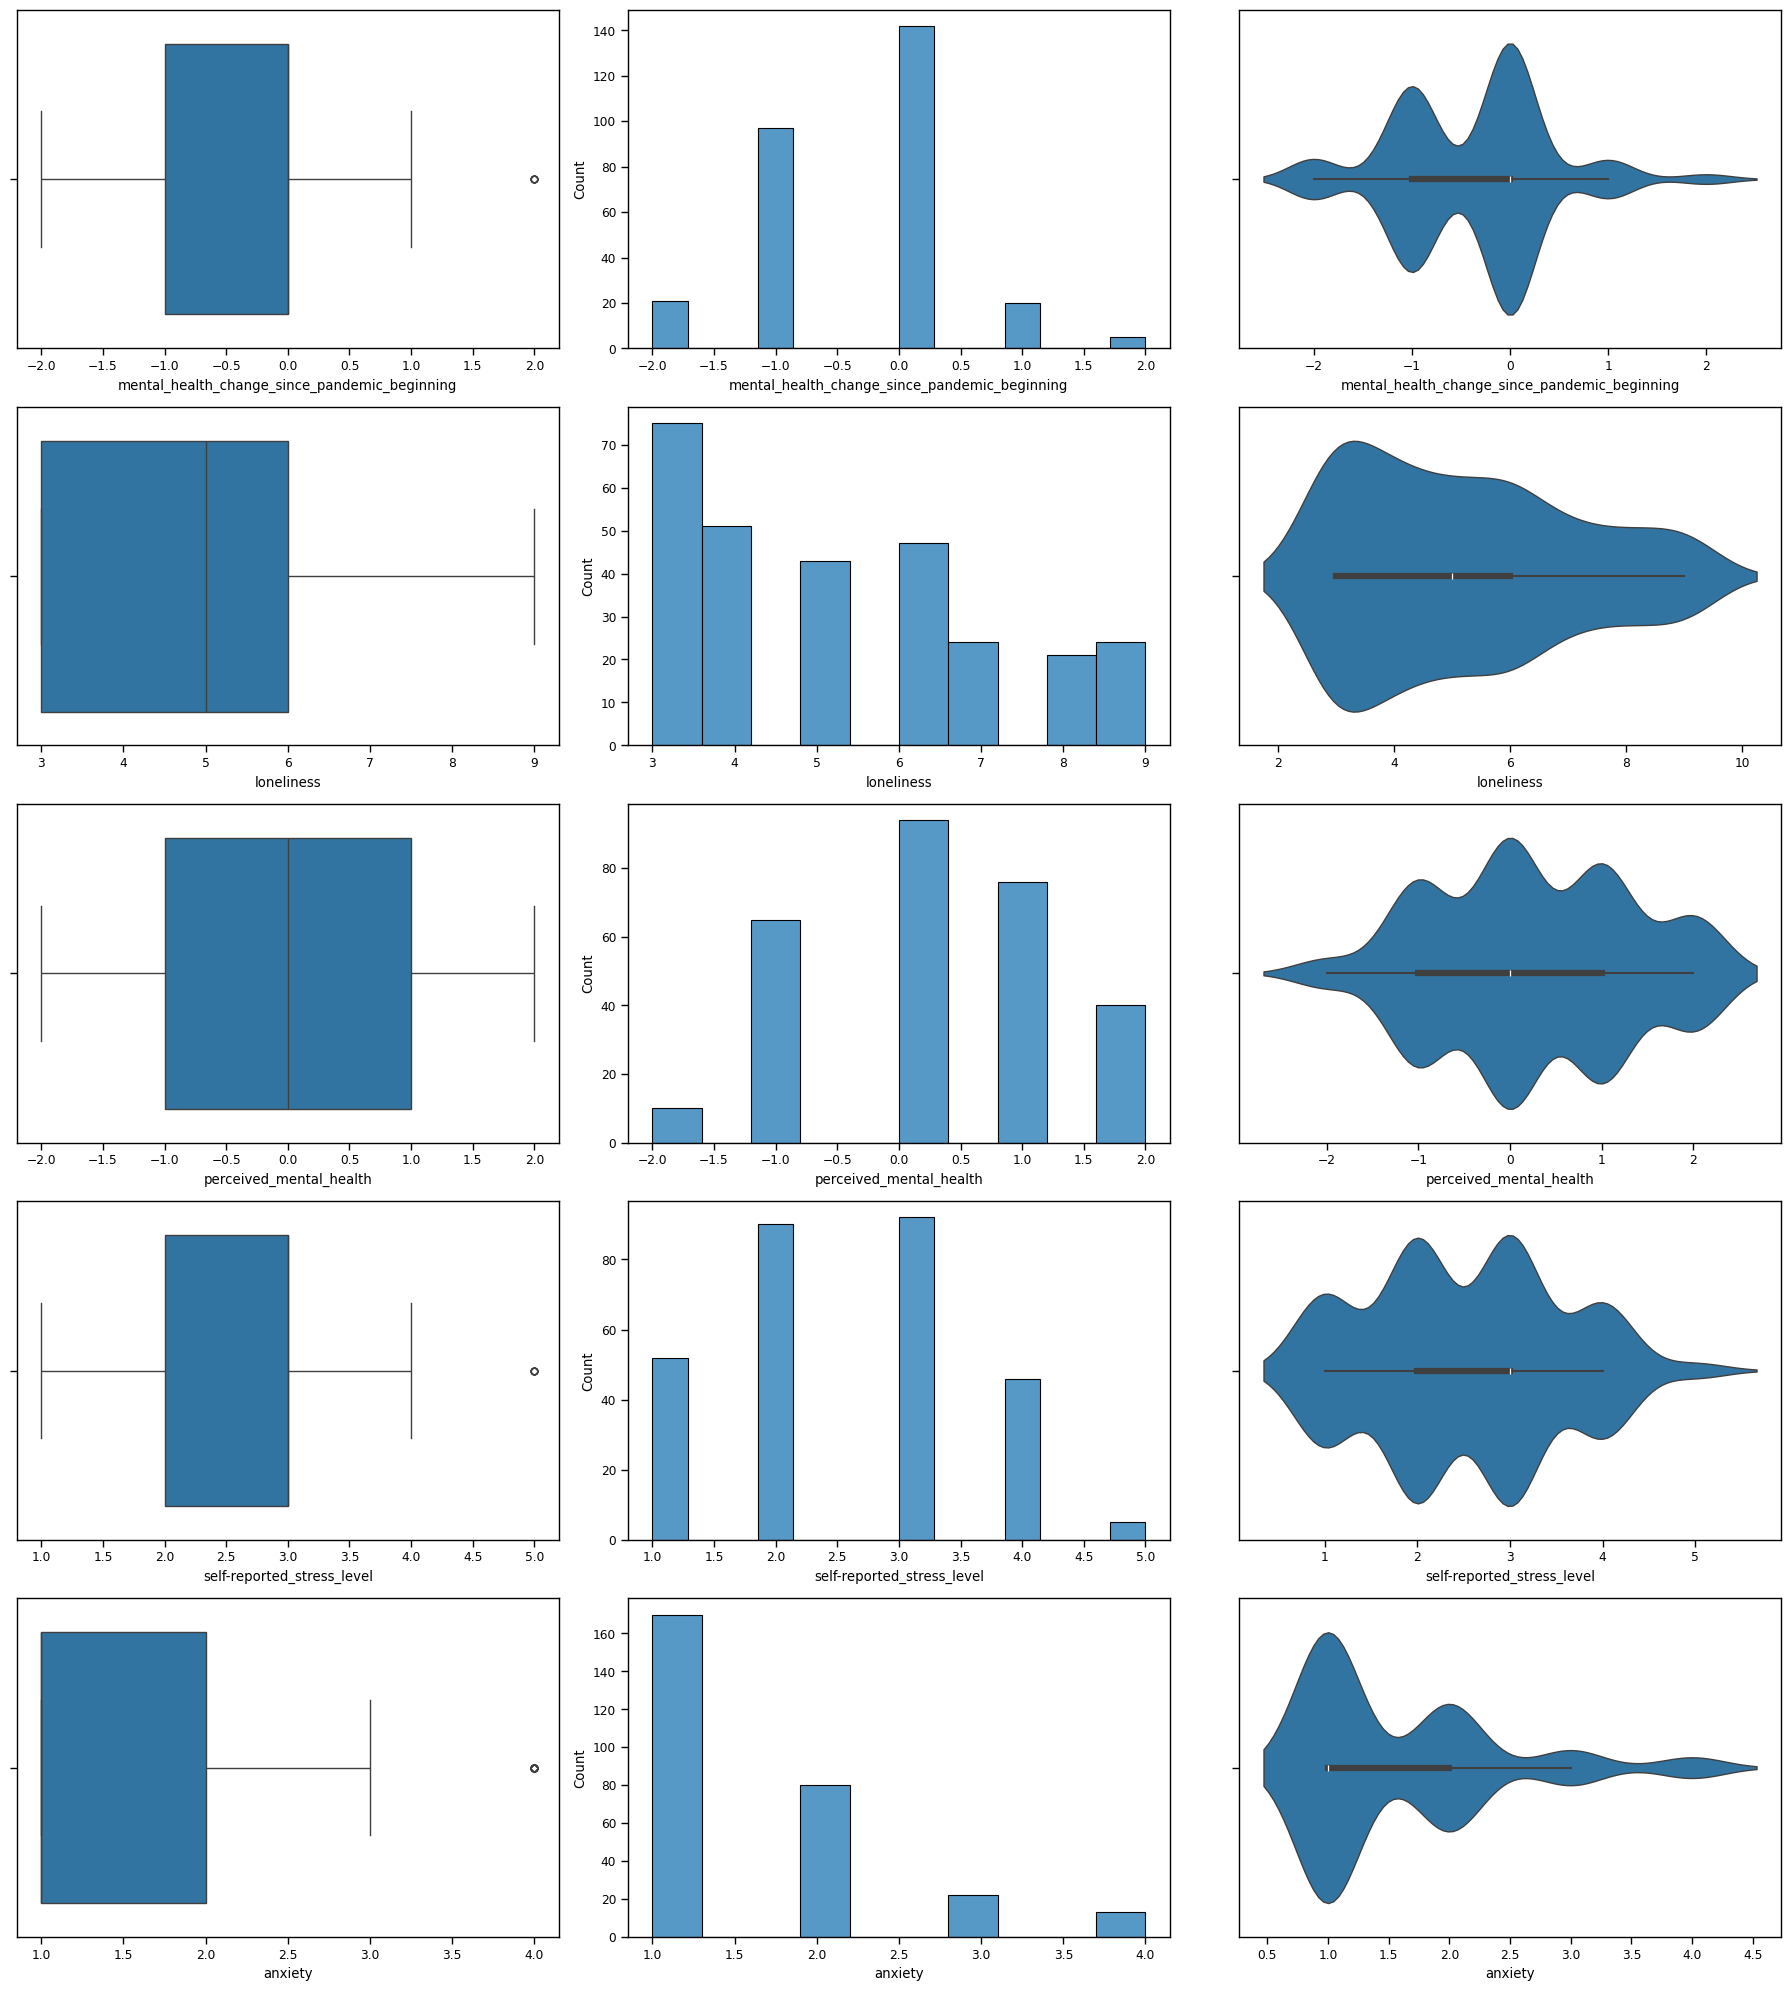

Atlantic


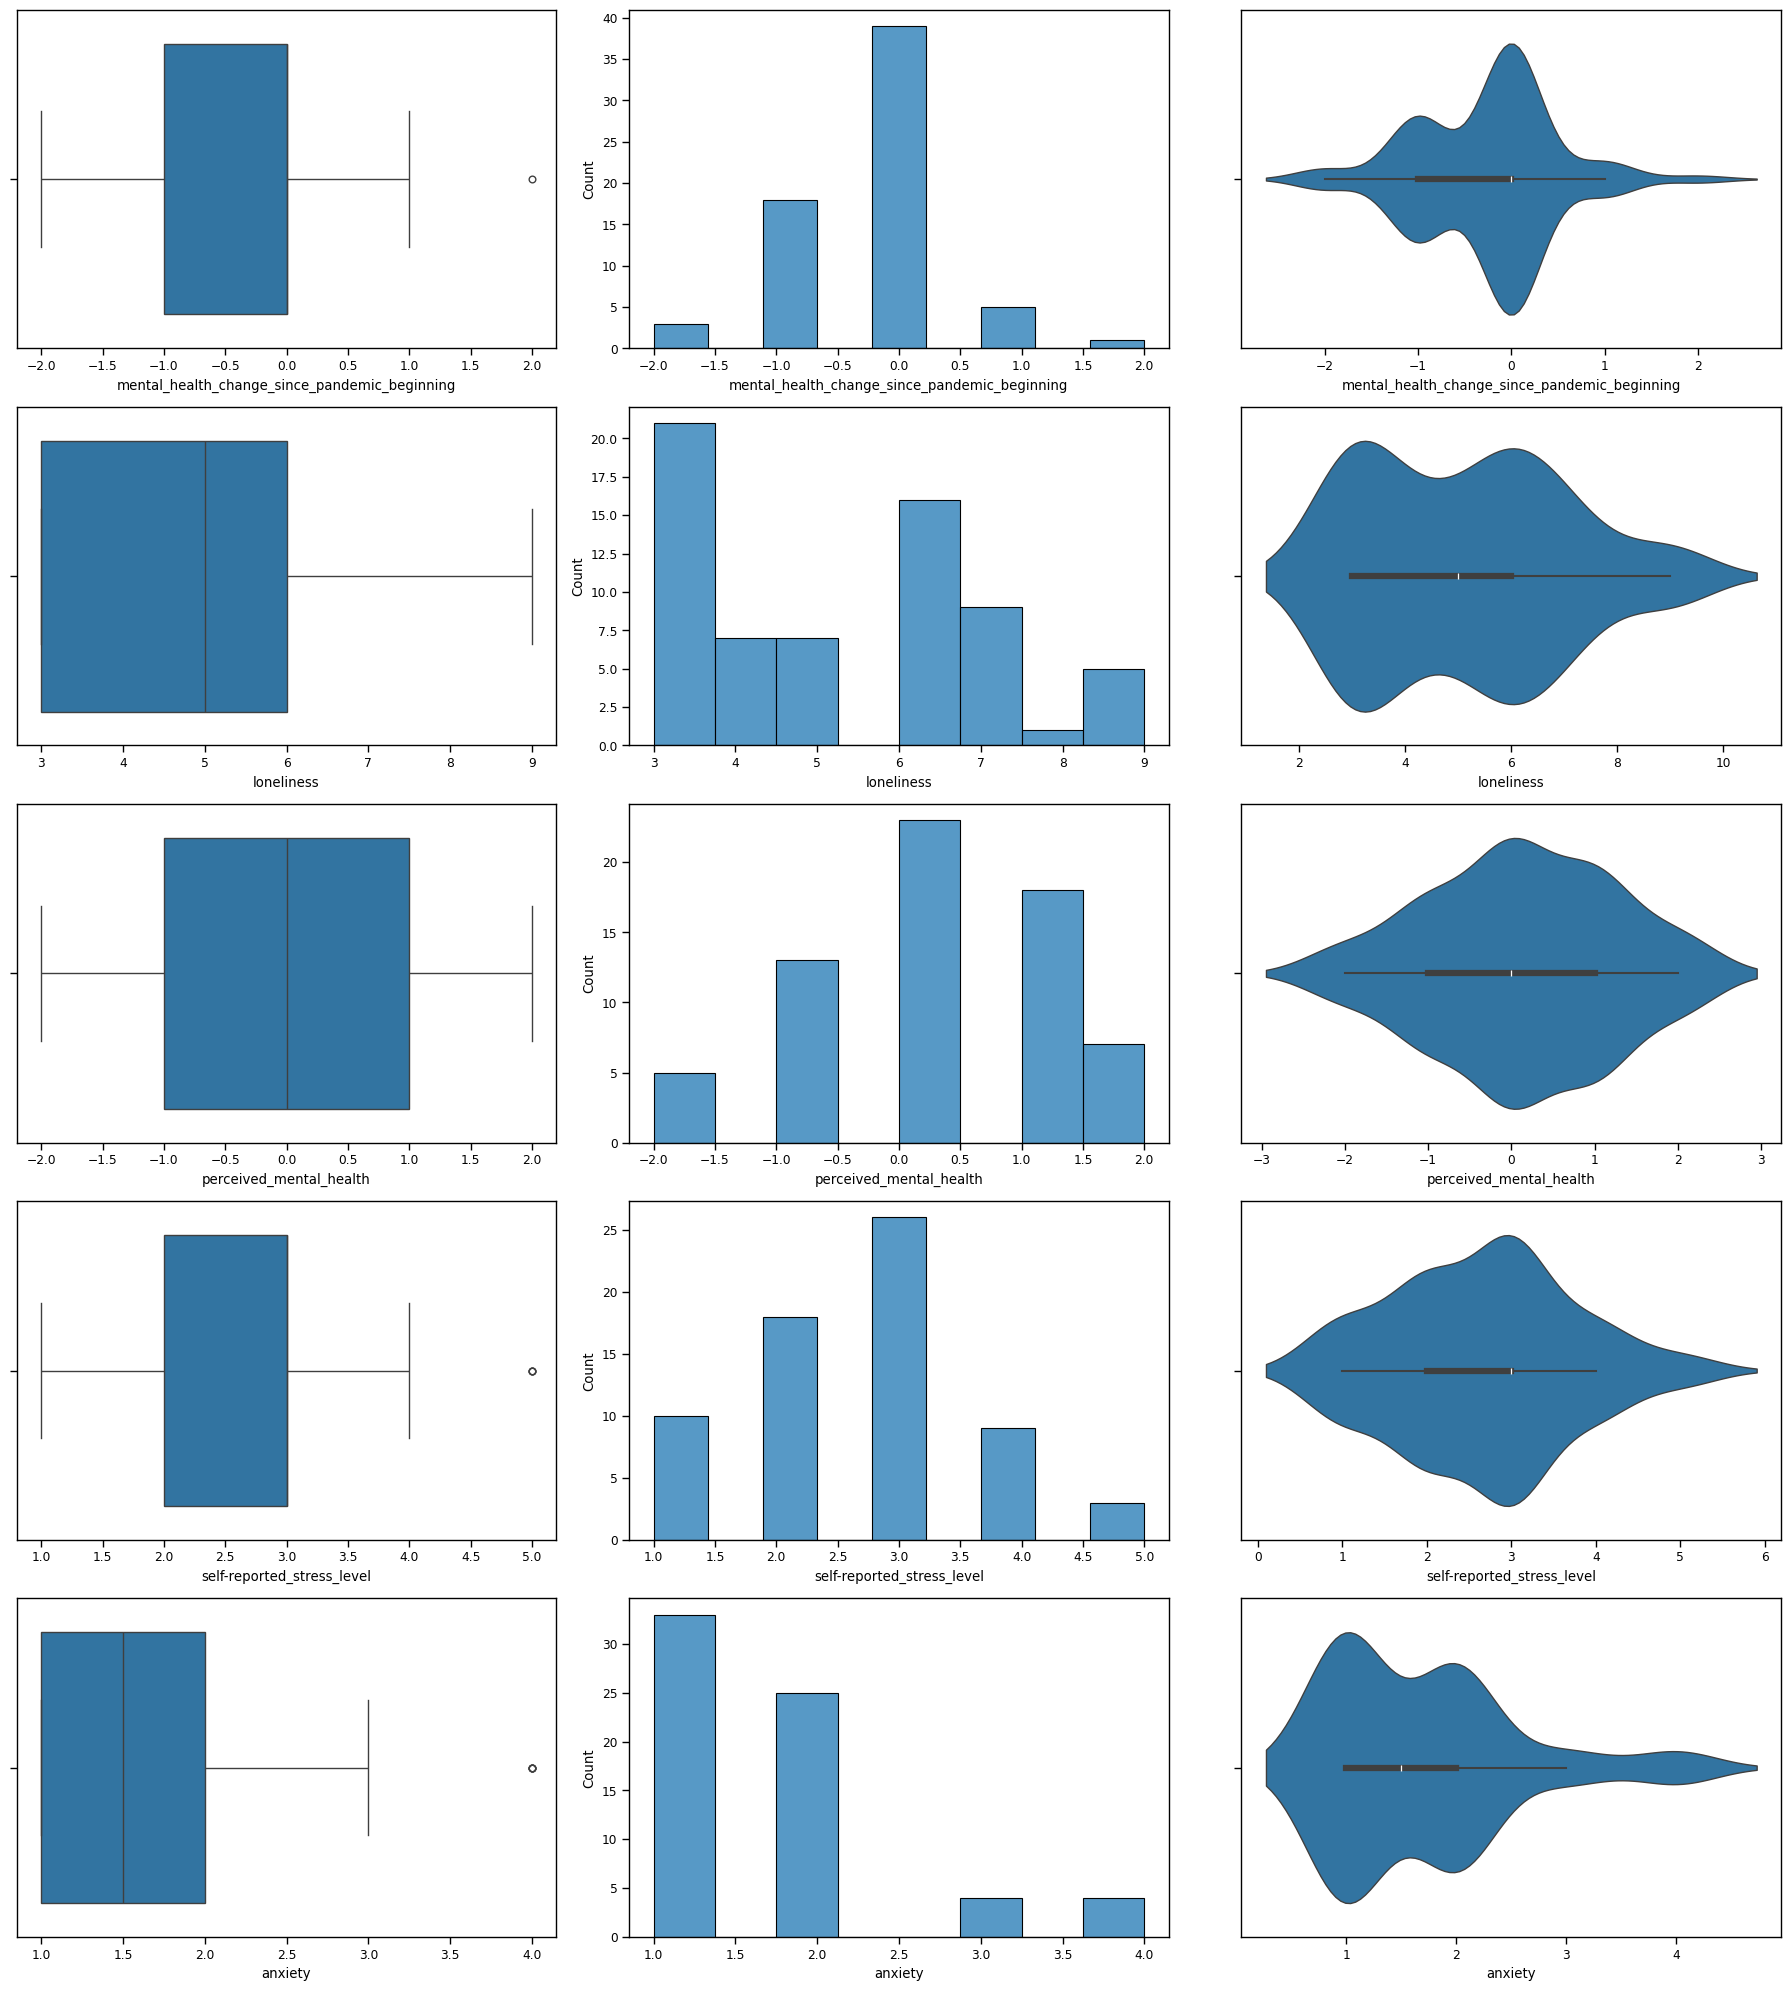

In [603]:
print('REGION')
for key in region_dict.keys():
    print(key)
    locationPlots(key, region_dict[key])
    plt.show()
    time.sleep(3)

In [585]:
import scipy.stats as stats
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
#location_mh_df['province_or_territory'] = le.fit_transform(location_mh_df['province_or_territory'])
#location_mh_df['region'] = le.fit_transform(location_mh_df['region'])

location_mh_df.loc[:, 'province_or_territory'] = le.fit_transform(location_mh_df['province_or_territory'])
location_mh_df.loc[:, 'region'] = le.fit_transform(location_mh_df['region'])

In [587]:
province_corr = []
region_corr = []

for var in mh_df:
    corr = stats.pointbiserialr(location_mh_df['province_or_territory'], location_mh_df[var])
    province_corr.append(corr.statistic)

for var in mh_df:
    corr = stats.pointbiserialr(location_mh_df['region'], location_mh_df[var])
    region_corr.append(corr.statistic)

data = [province_corr, region_corr]
location_mh_corr_df = pd.DataFrame(data, columns = ['mental_health_change_since_pandemic_beginning', 'loneliness', 'perceived_mental_health', 'self-reported_stress_level', 'anxiety'])

In [589]:
location_mh_corr_df.index = ['province_or_territory', 'region']
location_mh_corr_df

mental_health_change_since_pandemic_beginning  \
province_or_territory                                      -0.020347   
region                                                     -0.017167   

                       loneliness  perceived_mental_health  \
province_or_territory   -0.025123                 0.003107   
region                  -0.008346                 0.040951   

                       self-reported_stress_level   anxiety  
province_or_territory                   -0.065727 -0.013676  
region                                  -0.044663 -0.041220

In [591]:
print('province_or_territory')
for key in province_dict.keys():
    print(key)
    display(province_dict[key].describe())

province_or_territory
British Columbia


mental_health_change_since_pandemic_beginning  loneliness  \
count                                     141.000000  141.000000   
mean                                       -0.347518    5.326241   
std                                         0.792697    1.994623   
min                                        -2.000000    3.000000   
25%                                        -1.000000    3.000000   
50%                                         0.000000    5.000000   
75%                                         0.000000    7.000000   
max                                         2.000000    9.000000   

       perceived_mental_health  self-reported_stress_level     anxiety  
count               141.000000                  141.000000  141.000000  
mean                  0.148936                    2.624113    1.602837  
std                   1.107998                    0.906634    0.844135  
min                  -2.000000                    1.000000    1.000000  
25%                  -1.000000                    2.000000    1.000000  
50%                   0.000000                    3.000000    1.000000  
75%                   1.000000                    3.000000    2.000000  
max                   2.000000                    5.000000    4.000000

Alberta


mental_health_change_since_pandemic_beginning  loneliness  \
count                                     111.000000  111.000000   
mean                                       -0.450450    5.261261   
std                                         0.771524    1.822644   
min                                        -2.000000    3.000000   
25%                                        -1.000000    3.500000   
50%                                         0.000000    6.000000   
75%                                         0.000000    6.000000   
max                                         2.000000    9.000000   

       perceived_mental_health  self-reported_stress_level     anxiety  
count               111.000000                  111.000000  111.000000  
mean                  0.117117                    2.900901    1.774775  
std                   1.142077                    0.999590    0.891217  
min                  -2.000000                    1.000000    1.000000  
25%                  -1.000000                    2.000000    1.000000  
50%                   0.000000                    3.000000    2.000000  
75%                   1.000000                    3.000000    2.000000  
max                   2.000000                    5.000000    4.000000

Ontario


mental_health_change_since_pandemic_beginning  loneliness  \
count                                     445.000000  445.000000   
mean                                       -0.453933    5.316854   
std                                         0.768621    2.003557   
min                                        -2.000000    3.000000   
25%                                        -1.000000    3.000000   
50%                                         0.000000    5.000000   
75%                                         0.000000    7.000000   
max                                         2.000000    9.000000   

       perceived_mental_health  self-reported_stress_level     anxiety  
count               445.000000                  445.000000  445.000000  
mean                  0.062921                    2.748315    1.768539  
std                   1.103065                    0.981600    0.962307  
min                  -2.000000                    1.000000    1.000000  
25%                  -1.000000                    2.000000    1.000000  
50%                   0.000000                    3.000000    1.000000  
75%                   1.000000                    3.000000    2.000000  
max                   2.000000                    5.000000    4.000000

Saskatchewan


mental_health_change_since_pandemic_beginning  loneliness  \
count                                      36.000000   36.000000   
mean                                       -0.444444    5.194444   
std                                         0.808683    2.067703   
min                                        -2.000000    3.000000   
25%                                        -1.000000    3.000000   
50%                                         0.000000    5.000000   
75%                                         0.000000    7.000000   
max                                         1.000000    9.000000   

       perceived_mental_health  self-reported_stress_level    anxiety  
count                36.000000                   36.000000  36.000000  
mean                  0.000000                    2.527778   1.583333  
std                   1.041976                    0.877858   0.874234  
min                  -2.000000                    1.000000   1.000000  
25%                  -1.000000                    2.000000   1.000000  
50%                   0.000000                    3.000000   1.000000  
75%                   1.000000                    3.000000   2.000000  
max                   2.000000                    5.000000   4.000000

Qu�bec


mental_health_change_since_pandemic_beginning  loneliness  \
count                                     285.000000  285.000000   
mean                                       -0.382456    5.185965   
std                                         0.794595    1.929336   
min                                        -2.000000    3.000000   
25%                                        -1.000000    3.000000   
50%                                         0.000000    5.000000   
75%                                         0.000000    6.000000   
max                                         2.000000    9.000000   

       perceived_mental_health  self-reported_stress_level     anxiety  
count               285.000000                  285.000000  285.000000  
mean                  0.249123                    2.515789    1.571930  
std                   1.066969                    1.022939    0.821745  
min                  -2.000000                    1.000000    1.000000  
25%                  -1.000000                    2.000000    1.000000  
50%                   0.000000                    3.000000    1.000000  
75%                   1.000000                    3.000000    2.000000  
max                   2.000000                    5.000000    4.000000

New Brunswick


mental_health_change_since_pandemic_beginning  loneliness  \
count                                      24.000000   24.000000   
mean                                       -0.083333    5.041667   
std                                         0.775532    1.988645   
min                                        -2.000000    3.000000   
25%                                         0.000000    3.000000   
50%                                         0.000000    5.000000   
75%                                         0.000000    6.250000   
max                                         2.000000    9.000000   

       perceived_mental_health  self-reported_stress_level    anxiety  
count                24.000000                   24.000000  24.000000  
mean                  0.291667                    2.541667   1.583333  
std                   1.301476                    1.020621   0.775532  
min                  -2.000000                    1.000000   1.000000  
25%                  -0.250000                    2.000000   1.000000  
50%                   0.000000                    3.000000   1.000000  
75%                   1.000000                    3.000000   2.000000  
max                   2.000000                    5.000000   4.000000

Manitoba


mental_health_change_since_pandemic_beginning  loneliness  \
count                                      36.000000   36.000000   
mean                                       -0.333333    6.027778   
std                                         0.676123    1.949155   
min                                        -2.000000    3.000000   
25%                                        -1.000000    5.000000   
50%                                         0.000000    6.000000   
75%                                         0.000000    7.000000   
max                                         1.000000    9.000000   

       perceived_mental_health  self-reported_stress_level    anxiety  
count                36.000000                   36.000000  36.000000  
mean                  0.222222                    2.833333   1.555556  
std                   1.124052                    0.736788   0.734631  
min                  -2.000000                    1.000000   1.000000  
25%                  -1.000000                    2.000000   1.000000  
50%                   0.000000                    3.000000   1.000000  
75%                   1.000000                    3.000000   2.000000  
max                   2.000000                    4.000000   4.000000

Nova Scotia


mental_health_change_since_pandemic_beginning  loneliness  \
count                                      29.000000   29.000000   
mean                                       -0.448276    5.344828   
std                                         0.572351    1.968971   
min                                        -2.000000    3.000000   
25%                                        -1.000000    3.000000   
50%                                         0.000000    6.000000   
75%                                         0.000000    6.000000   
max                                         0.000000    9.000000   

       perceived_mental_health  self-reported_stress_level    anxiety  
count                29.000000                   29.000000  29.000000  
mean                  0.068966                    2.862069   1.793103  
std                   1.032716                    1.059789   0.901559  
min                  -2.000000                    1.000000   1.000000  
25%                  -1.000000                    2.000000   1.000000  
50%                   0.000000                    3.000000   2.000000  
75%                   1.000000                    3.000000   2.000000  
max                   2.000000                    5.000000   4.000000

In [593]:
print('region')
for key in region_dict.keys():
    print(key)
    display(region_dict[key].describe())

region
British Columbia


mental_health_change_since_pandemic_beginning  loneliness  \
count                                     141.000000  141.000000   
mean                                       -0.347518    5.326241   
std                                         0.792697    1.994623   
min                                        -2.000000    3.000000   
25%                                        -1.000000    3.000000   
50%                                         0.000000    5.000000   
75%                                         0.000000    7.000000   
max                                         2.000000    9.000000   

       perceived_mental_health  self-reported_stress_level     anxiety  
count               141.000000                  141.000000  141.000000  
mean                  0.148936                    2.624113    1.602837  
std                   1.107998                    0.906634    0.844135  
min                  -2.000000                    1.000000    1.000000  
25%                  -1.000000                    2.000000    1.000000  
50%                   0.000000                    3.000000    1.000000  
75%                   1.000000                    3.000000    2.000000  
max                   2.000000                    5.000000    4.000000

Prairies


mental_health_change_since_pandemic_beginning  loneliness  \
count                                     188.000000  188.000000   
mean                                       -0.420213    5.388298   
std                                         0.759268    1.899415   
min                                        -2.000000    3.000000   
25%                                        -1.000000    4.000000   
50%                                         0.000000    6.000000   
75%                                         0.000000    6.250000   
max                                         2.000000    9.000000   

       perceived_mental_health  self-reported_stress_level     anxiety  
count               188.000000                  188.000000  188.000000  
mean                  0.106383                    2.803191    1.696809  
std                   1.113534                    0.935680    0.870546  
min                  -2.000000                    1.000000    1.000000  
25%                  -1.000000                    2.000000    1.000000  
50%                   0.000000                    3.000000    1.000000  
75%                   1.000000                    3.000000    2.000000  
max                   2.000000                    5.000000    4.000000

Ontario


mental_health_change_since_pandemic_beginning  loneliness  \
count                                     445.000000  445.000000   
mean                                       -0.453933    5.316854   
std                                         0.768621    2.003557   
min                                        -2.000000    3.000000   
25%                                        -1.000000    3.000000   
50%                                         0.000000    5.000000   
75%                                         0.000000    7.000000   
max                                         2.000000    9.000000   

       perceived_mental_health  self-reported_stress_level     anxiety  
count               445.000000                  445.000000  445.000000  
mean                  0.062921                    2.748315    1.768539  
std                   1.103065                    0.981600    0.962307  
min                  -2.000000                    1.000000    1.000000  
25%                  -1.000000                    2.000000    1.000000  
50%                   0.000000                    3.000000    1.000000  
75%                   1.000000                    3.000000    2.000000  
max                   2.000000                    5.000000    4.000000

Qu�bec


mental_health_change_since_pandemic_beginning  loneliness  \
count                                     285.000000  285.000000   
mean                                       -0.382456    5.185965   
std                                         0.794595    1.929336   
min                                        -2.000000    3.000000   
25%                                        -1.000000    3.000000   
50%                                         0.000000    5.000000   
75%                                         0.000000    6.000000   
max                                         2.000000    9.000000   

       perceived_mental_health  self-reported_stress_level     anxiety  
count               285.000000                  285.000000  285.000000  
mean                  0.249123                    2.515789    1.571930  
std                   1.066969                    1.022939    0.821745  
min                  -2.000000                    1.000000    1.000000  
25%                  -1.000000                    2.000000    1.000000  
50%                   0.000000                    3.000000    1.000000  
75%                   1.000000                    3.000000    2.000000  
max                   2.000000                    5.000000    4.000000

Atlantic


mental_health_change_since_pandemic_beginning  loneliness  \
count                                      66.000000   66.000000   
mean                                       -0.257576    5.121212   
std                                         0.729818    1.885288   
min                                        -2.000000    3.000000   
25%                                        -1.000000    3.000000   
50%                                         0.000000    5.000000   
75%                                         0.000000    6.000000   
max                                         2.000000    9.000000   

       perceived_mental_health  self-reported_stress_level    anxiety  
count                66.000000                   66.000000  66.000000  
mean                  0.136364                    2.651515   1.681818  
std                   1.093848                    1.045024   0.844149  
min                  -2.000000                    1.000000   1.000000  
25%                  -1.000000                    2.000000   1.000000  
50%                   0.000000                    3.000000   1.500000  
75%                   1.000000                    3.000000   2.000000  
max                   2.000000                    5.000000   4.000000

**Observations for Location**:
- Correlation between the location and mental health indicators are very low, close to 0.
- We can safely conclude that mental health is not tied to province/territory or region for all provinces/territories or regions.
- From the plots, we can see that across all provinces/territories and regions the levels of loneliness and anxiety are low.
- Remarkable observations:
    - Provinces
        - *Manitoba*: Moderately high loneliness
        - *Nova Scotia*: Big improvements in mental health since the beginning of the pandemic

#### Gender

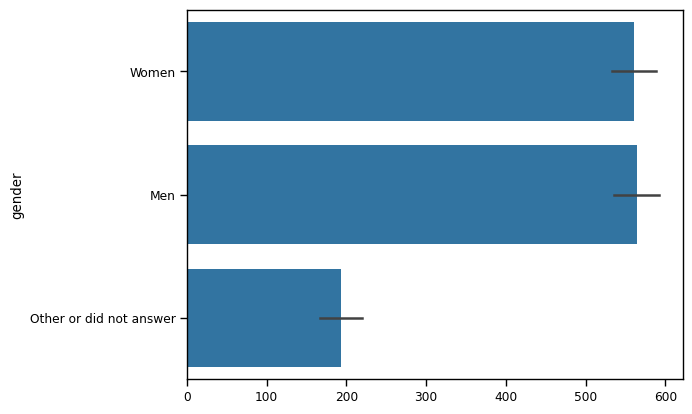

In [634]:
sb.barplot(data = gender_mh_df['gender'])
plt.show()

In [614]:
encode_gender= {'gender': {'Men': 0, 'Women': 1, 'Other or did not answer': -1}}
gender_mh_df = train_df[['mental_health_change_since_pandemic_beginning', 'loneliness', 'perceived_mental_health', 'self-reported_stress_level', 'anxiety', 'gender']]

In [616]:
gender_mh_encoded_df = gender_mh_df.replace(encode_gender)
gender_mh_encoded_df.head()

/tmp/ipykernel_20103/1477451227.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gender_mh_encoded_df = gender_mh_df.replace(encode_gender)


mental_health_change_since_pandemic_beginning  loneliness  \
0                                              0           3   
1                                              0           3   
2                                             -1           5   
3                                             -1           4   
4                                              0           3   

   perceived_mental_health  self-reported_stress_level  anxiety  gender  
0                        0                           3        1       1  
1                        0                           3        1       0  
2                        0                           2        2       1  
3                       -1                           3        1       0  
4                        2                           1        1       1

<Axes: >

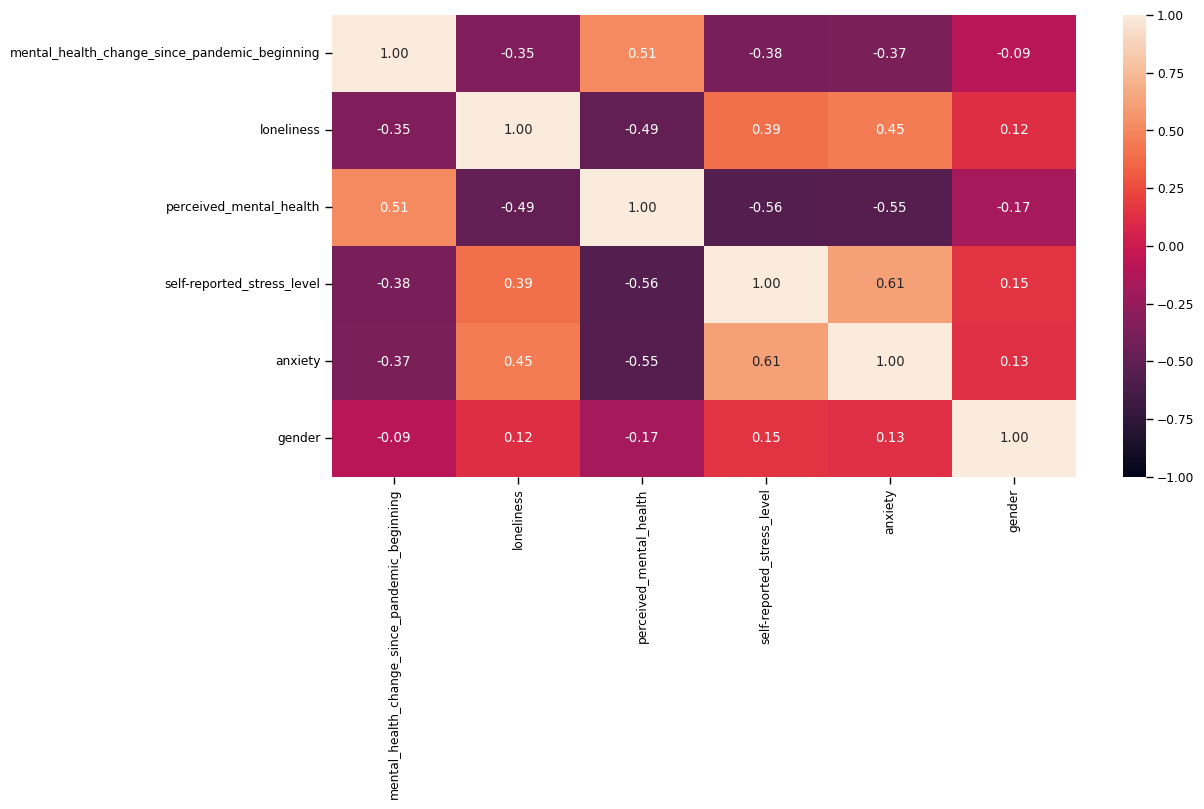

In [618]:
f = plt.figure(figsize = (12,6))
sb.heatmap(gender_mh_encoded_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

**Observations**:
- Given the equal distribution of genders and low correlation, we can deduce that gender is not tied to any mental health indicators.

#### Age

In [636]:
age_mh_df = train_df[['mental_health_change_since_pandemic_beginning', 'loneliness', 'perceived_mental_health', 'self-reported_stress_level', 'anxiety', 'age']]

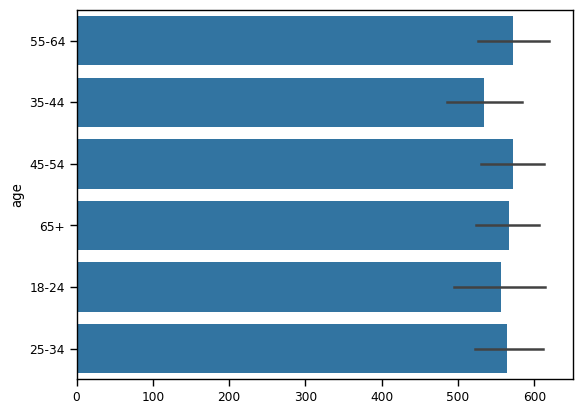

In [640]:
sb.barplot(data = age_mh_df['age'])
plt.show()

In [642]:
age_mh_df.loc[:, 'age'] = le.fit_transform(age_mh_df['age'])

<Axes: >

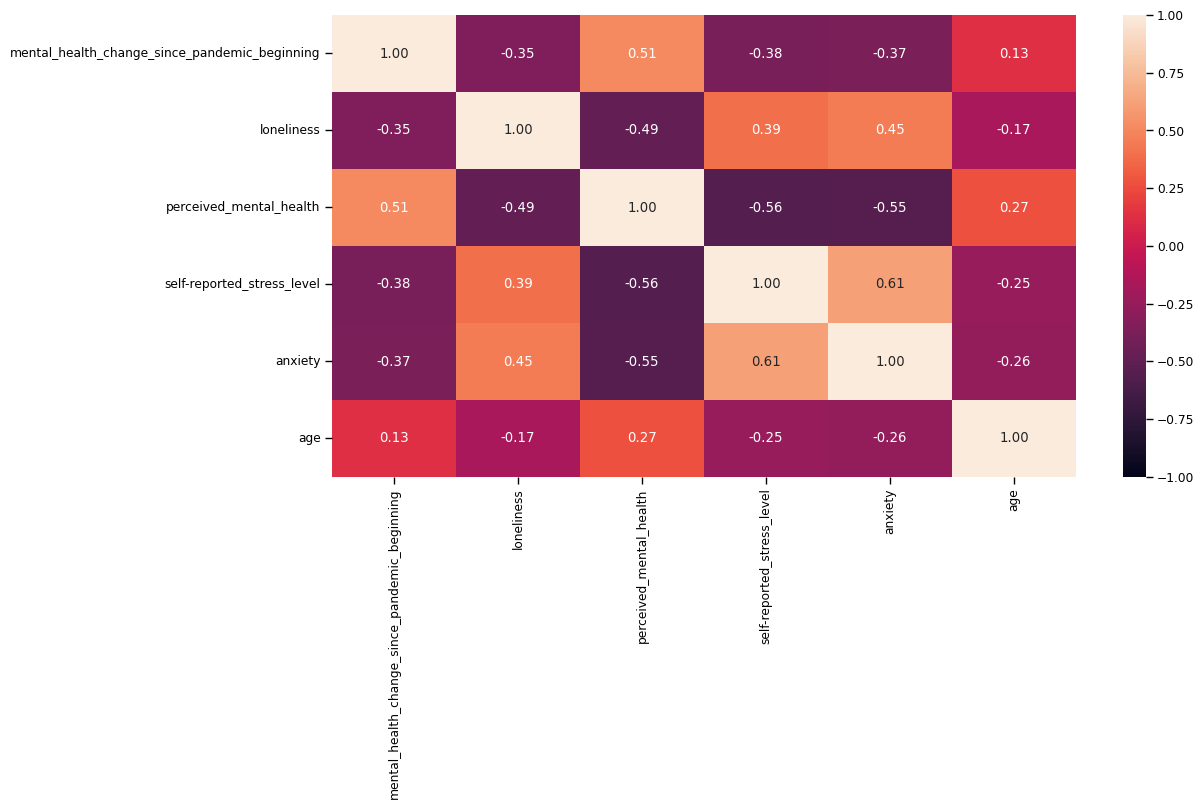

In [646]:
f = plt.figure(figsize = (12,6))
sb.heatmap(age_mh_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

**Observations**:
- Given the equal distribution of age groups and low correlation, we can deduce that age is not tied to any mental health indicators.

#### Highest Education

In [650]:
edu_mh_df = train_df[['mental_health_change_since_pandemic_beginning', 'loneliness', 'perceived_mental_health', 'self-reported_stress_level', 'anxiety', 'highest_education']]

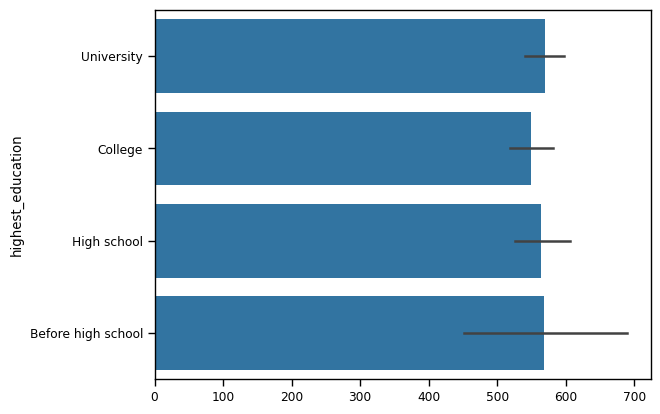

In [652]:
sb.barplot(data = edu_mh_df['highest_education'])
plt.show()

In [654]:
edu_mh_df.loc[:, 'highest_education'] = le.fit_transform(edu_mh_df['highest_education'])

<Axes: >

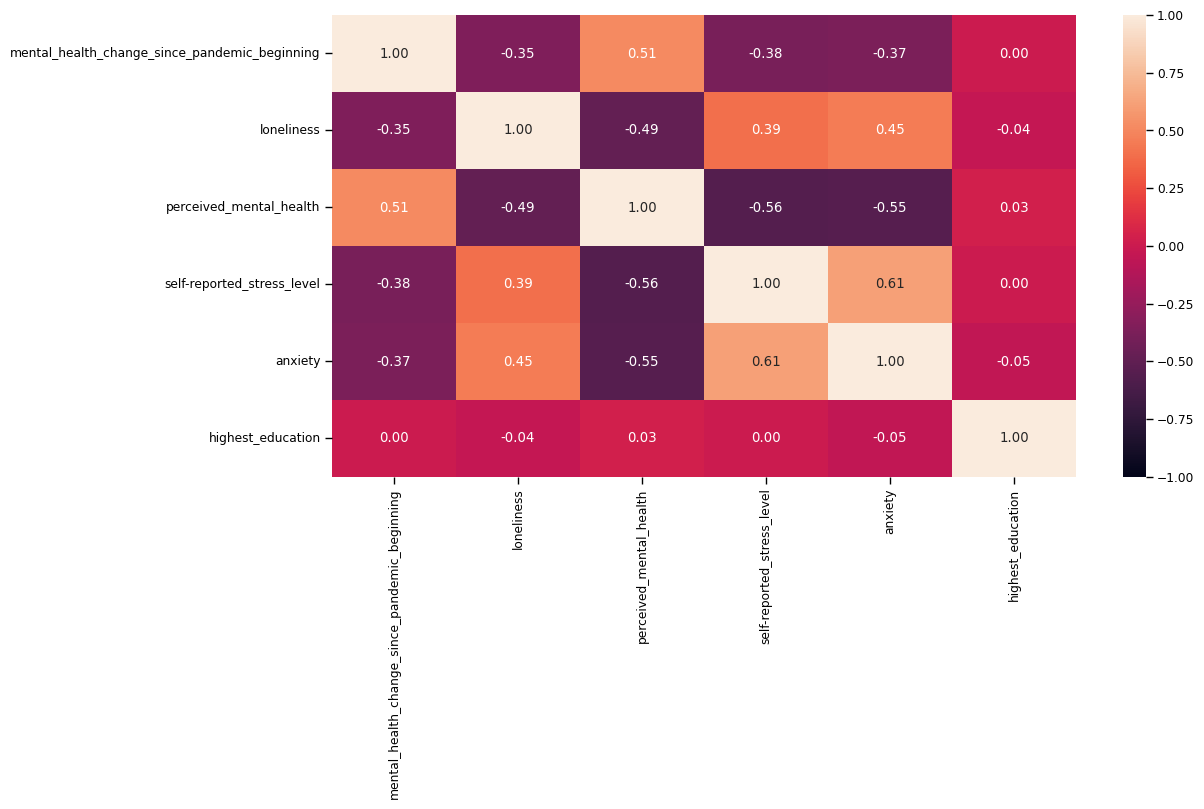

In [656]:
f = plt.figure(figsize = (12,6))
sb.heatmap(edu_mh_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

**Observations**:
- Given the equal distribution of age groups and extremely low correlation, we can deduce that highest education is not tied to any mental health indicators.

#### Income

In [661]:
income_mh_df = train_df[['mental_health_change_since_pandemic_beginning', 'loneliness', 'perceived_mental_health', 'self-reported_stress_level', 'anxiety', 'yearly_income', 'income_change_since_pandemic_beginning']]

## XGBoost
---

In [676]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 10.8 MB/s eta 0:00:00m eta 0:00:010:00:01


In [678]:
import xgboost as xgb

In [672]:
train_df = pd.get_dummies(train_df, train_df.columns[train_df.dtypes == 'object'])

In [738]:
test_df = pd.read_csv('test.csv')
test_df = pd.get_dummies(test_df, test_df.columns[test_df.dtypes == 'object'])

In [750]:
X_test['province_or_territory_Nunavut'] = False

X_test = X_test[X_train.columns]

In [674]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 68 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   pet_attitude                                                 1125 non-null   int64  
 1   num_in_household                                             1125 non-null   int64  
 2   mental_health_change_since_pandemic_beginning                1125 non-null   int64  
 3   quality_of_life                                              1125 non-null   float64
 4   self-assessed_overall_health                                 1125 non-null   int64  
 5   loneliness                                                   1125 non-null   int64  
 6   perceived_mental_health                                      1125 non-null   int64  
 7   self-reported_stress_level                                   1125 non-null   i

In [780]:
y_train_multi = train_df[['mental_health_change_since_pandemic_beginning', 
                        'loneliness', 
                        'perceived_mental_health', 
                        'self-reported_stress_level', 
                        'anxiety']]

X_train = train_df.drop(['mental_health_change_since_pandemic_beginning', 
                        'loneliness', 
                        'perceived_mental_health', 
                        'self-reported_stress_level', 
                        'anxiety'], axis=1)

# creating interaction terms
for demographic in []:
    X_train[f'pet_X_{demographic}'] = X_train['pet_ownership_Yes'] * X_train[demographic]



In [ ]:
y_train_multi = train_df[['mental_health_change_since_pandemic_beginning', 
                        'loneliness', 
                        'perceived_mental_health', 
                        'self-reported_stress_level', 
                        'anxiety']]

X_train = train_df.drop(['mental_health_change_since_pandemic_beginning', 
                        'loneliness', 
                        'perceived_mental_health', 
                     'self-reported_stress_level', 
                        'anxiety'], axis=1)

In [712]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb

In [766]:
multi_model = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(X_train, y_train_multi)

In [767]:
multi_model.fit(X_train, y_train_multi)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))

In [774]:
mental_health_measures = y_train_multi.columns
feature_names = X_train.columns

all_importances = pd.DataFrame()

pet_idx = list(feature_names).index('pet_ownership_Yes')

for i, measure in enumerate(mental_health_measures):
    estimator = multi_model.estimators_[i]
    
    importances = estimator.feature_importances_
    
    measure_importances = pd.DataFrame({
        'Mental_Health_Measure': measure,
        'Feature': feature_names,
        'Importance': importances
    })
    
    all_importances = pd.concat([all_importances, measure_importances])

pet_importance = all_importances[all_importances['Feature'] == 'pet_ownership_Yes']
print(pet_importance.sort_values('Importance', ascending=False))

                            Mental_Health_Measure            Feature  \
23  mental_health_change_since_pandemic_beginning  pet_ownership_Yes   
23                                     loneliness  pet_ownership_Yes   
23                        perceived_mental_health  pet_ownership_Yes   
23                     self-reported_stress_level  pet_ownership_Yes   
23                                        anxiety  pet_ownership_Yes   

    Importance  
23         0.0  
23         0.0  
23         0.0  
23         0.0  
23         0.0  


In [754]:
y_pred2

array([[ 0,  4,  0,  3,  1],
       [ 0,  7, -1,  3,  2],
       [ 0,  3,  2,  1,  1],
       ...,
       [-1,  3,  1,  2,  1],
       [ 0,  3,  2,  1,  1],
       [ 0,  5,  1,  3,  1]])

In [764]:
for i, col in enumerate(y_test_multi.columns):
    y_true_col = y_test_multi.iloc[:, i]
    y_pred_col = y_pred2[:, i]
    
    mse = metrics.mean_squared_error(y_true_col, y_pred_col)
    r2 = metrics.r2_score(y_true_col, y_pred_col)
    
    print(f"Metrics for {col}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²: {r2:.4f}")

Metrics for mental_health_change_since_pandemic_beginning:
  MSE: 1.0480
  R²: -0.4775
Metrics for loneliness:
  MSE: 5.2987
  R²: -0.5673
Metrics for perceived_mental_health:
  MSE: 1.3680
  R²: -0.3411
Metrics for self-reported_stress_level:
  MSE: 1.2400
  R²: -0.4764
Metrics for anxiety:
  MSE: 0.7973
  R²: 0.1292


## K-means Clustering
---

In [776]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [782]:
y_train_mh_change = y_train_multi['mental_health_change_since_pandemic_beginning']

In [792]:
train_df = pd.read_csv('train.csv')
train_df

province_or_territory            region pet_ownership  \
0         British Columbia  British Columbia            No   
1                  Alberta          Prairies           Yes   
2                  Ontario           Ontario           Yes   
3             Saskatchewan          Prairies            No   
4                  Ontario           Ontario           Yes   
...                    ...               ...           ...   
1120           Nova Scotia          Atlantic            No   
1121      British Columbia  British Columbia           Yes   
1122           Nova Scotia          Atlantic           Yes   
1123               Ontario           Ontario            No   
1124               Ontario           Ontario           Yes   

     pet_ownership_change  pet_attitude    age   highest_education  \
0                      No            79  55-64          University   
1                      No            97  35-44             College   
2                      No           104  45-54          University   
3                      No            68  45-54          University   
4                      No           113    65+          University   
...                   ...           ...    ...                 ...   
1120                   No           105  55-64          University   
1121                   No            90  45-54         High school   
1122                   No           115    65+          University   
1123                   No            91    65+             College   
1124                   No            80  45-54  Before high school   

       ethnicity gender  num_in_household  ...  \
0     Caucasians  Women                 2  ...   
1     Caucasians    Men                 3  ...   
2     Caucasians  Women                 1  ...   
3         Others    Men                 3  ...   
4     Caucasians  Women                 1  ...   
...          ...    ...               ...  ...   
1120  Caucasians    Men                 2  ...   
1121  Caucasians  Women                 4  ...   
1122  Caucasians  Women                 2  ...   
1123  Caucasians    Men                 3  ...   
1124  Caucasians    Men                 2  ...   

     emotional_psychological_mental_health_condition  \
0                                                 No   
1                                                 No   
2                                                 No   
3                                                Yes   
4                                                 No   
...                                              ...   
1120                                              No   
1121                                             Yes   
1122                                              No   
1123                                              No   
1124                                             Yes   

     mental_health_change_since_pandemic_beginning  \
0                                                0   
1                                                0   
2                                               -1   
3                                               -1   
4                                                0   
...                                            ...   
1120                                             0   
1121                                            -1   
1122                                            -1   
1123                                             0   
1124                                            -2   

     COVID-19_positive_or_household_member social_support  quality_of_life  \
0                                       No            Yes         0.904604   
1                                       No            Yes         0.948968   
2                                       No            Yes         0.616038   
3                                       No            Yes         0.891872   
4                                       No            Yes         0.865736   
...                         

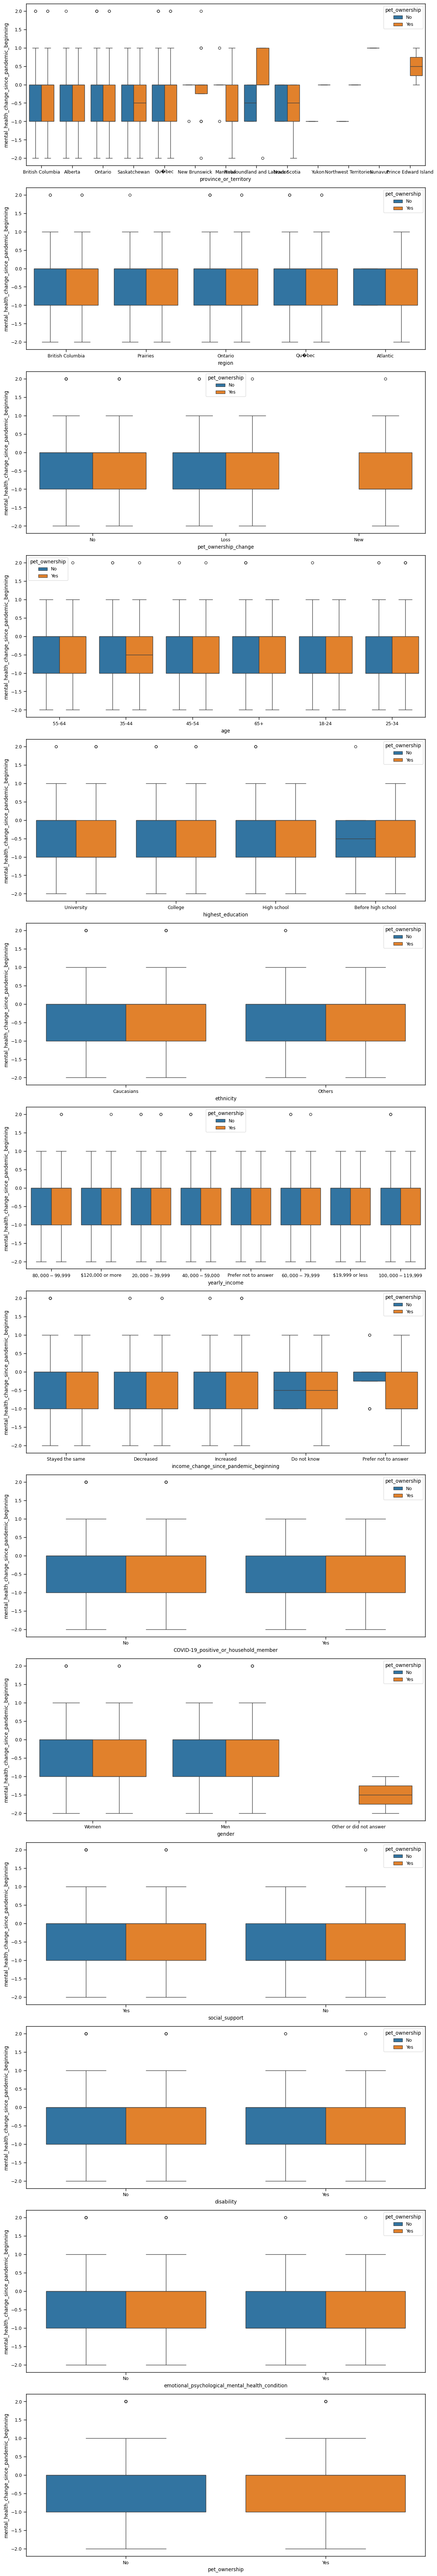

In [796]:
# categorical var, split by pet_ownership
f, axes = plt.subplots(len(categorical_df.columns), 1, figsize=(12, 5*len(categorical_df.columns)))

for i, var in enumerate(categorical_df.columns):
    sb.boxplot(
        data=train_df,
        x=var,
        y='mental_health_change_since_pandemic_beginning',
        hue='pet_ownership',
        ax=axes[i]
    )
    
plt.tight_layout()
plt.show()

In [806]:
!pip install kneed

In [810]:
for var in categorical_df.columns:
    train_df.loc[:, var] = le.fit_transform(train_df[var])

In [812]:
train_df

province_or_territory region pet_ownership pet_ownership_change  \
0                        1      1             0                    2   
1                        0      3             1                    2   
2                        8      2             1                    2   
3                       11      3             0                    2   
4                        8      2             1                    2   
...                    ...    ...           ...                  ...   
1120                     6      0             0                    2   
1121                     1      1             1                    2   
1122                     6      0             1                    2   
1123                     8      2             0                    2   
1124                     8      2             1                    2   

      pet_attitude age highest_education ethnicity gender  num_in_household  \
0               79   4                 3         0      2                 2   
1               97   2                 1         0      0                 3   
2              104   3                 3         0      2                 1   
3               68   3                 3         1      0                 3   
4              113   5                 3         0      2                 1   
...            ...  ..               ...       ...    ...               ...   
1120           105   4                 3         0      0                 2   
1121            90   3                 2         0      2                 4   
1122           115   5                 3         0      2                 2   
1123            91   5                 1         0      0                 3   
1124            80   3                 0         0      0                 2   

      ... emotional_psychological_mental_health_condition  \
0     ...                                               0   
1     ...                                               0   
2     ...                                               0   
3     ...                                               1   
4     ...                                               0   
...   ...                                             ...   
1120  ...                                               0   
1121  ...                                               1   
1122  ...                                               0   
1123  ...                                               0   
1124  ...                                               1   

     mental_health_change_since_pandemic_beginning  \
0                                                0   
1                                                0   
2                                               -1   
3                                               -1   
4                                                0   
...                                            ...   
1120                                             0   
1121                                            -1   
1122                                            -1   
1123                                             0   
1124                                            -2   

     COVID-19_positive_or_household_member social_support  quality_of_life  \
0                                        0              1         0.904604   
1                                        0              1         0.948968   
2                                        0              1         0.616038   
3                                        0              1         0.891872   
4                                        0              1         0.865736   
...                                    ...            ...              ...   
1120                                     0              1         0.948968   
1121                                     0              1         0.771002   
1122                                     0              1         0.803145   
1123                         

Cluster Demographics:
        pet_ownership       age    gender highest_education  num_in_household  \
cluster                                                                         
0            0.611111  2.166667  0.925926          2.111111          3.351852   
1            0.350446  4.004464  0.790179          1.975446          1.950893   
2            0.656085  2.962963  1.074074          1.772487          2.275132   
3            0.564516  1.610599  1.209677          2.269585          3.163594   

        province_or_territory    region pet_ownership_change  pet_attitude  \
cluster                                                                      
0                    7.796296  3.018519             1.592593     91.259259   
1                    6.810268  2.513393             1.881696     90.241071   
2                     6.26455  2.142857             1.365079    100.592593   
3                    6.248848  2.398618             1.711982     96.027650   

        ethnicity year

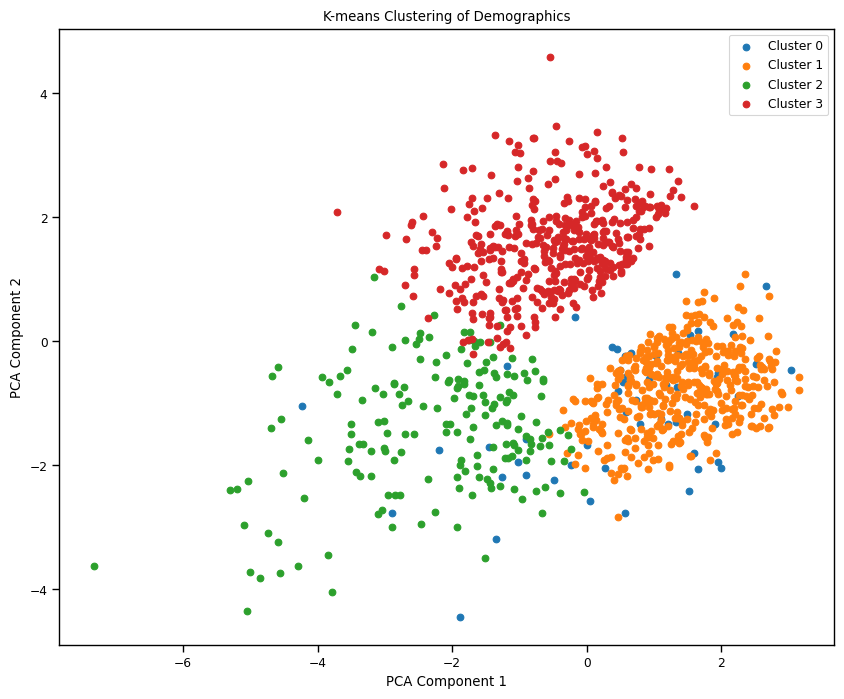

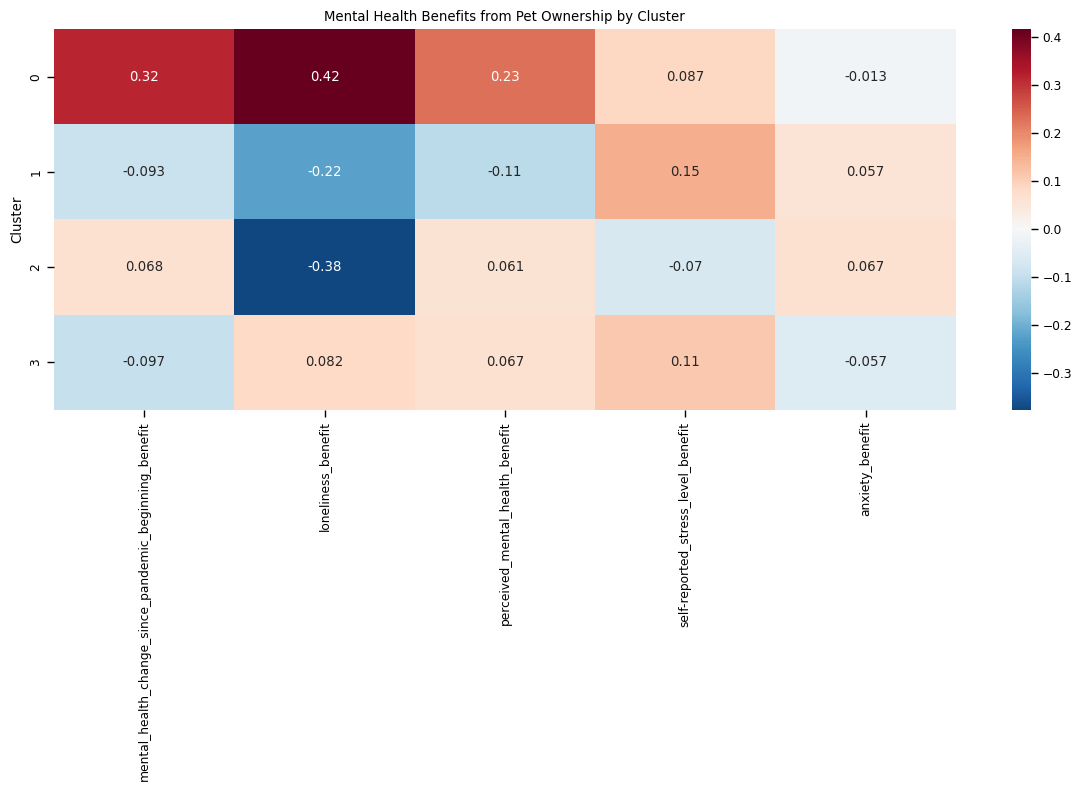

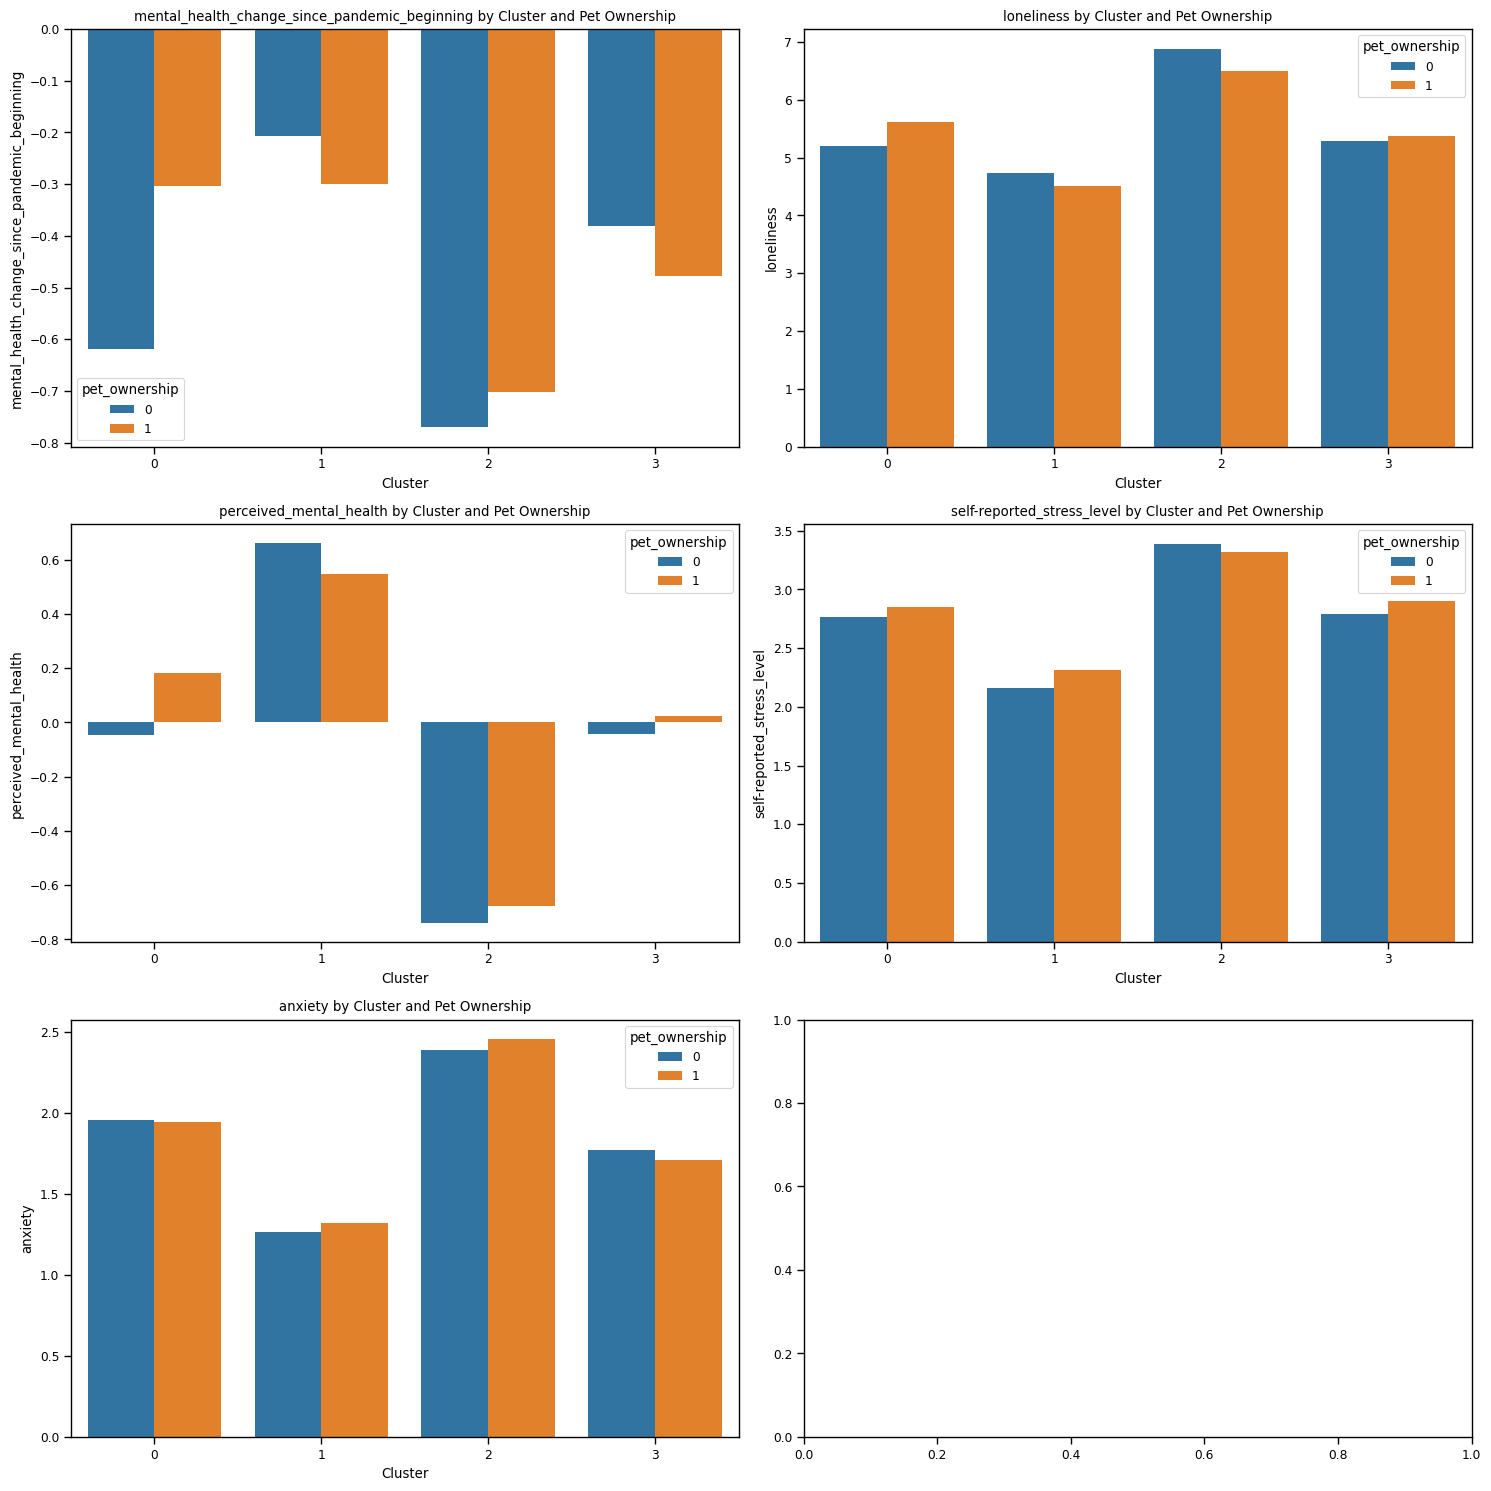

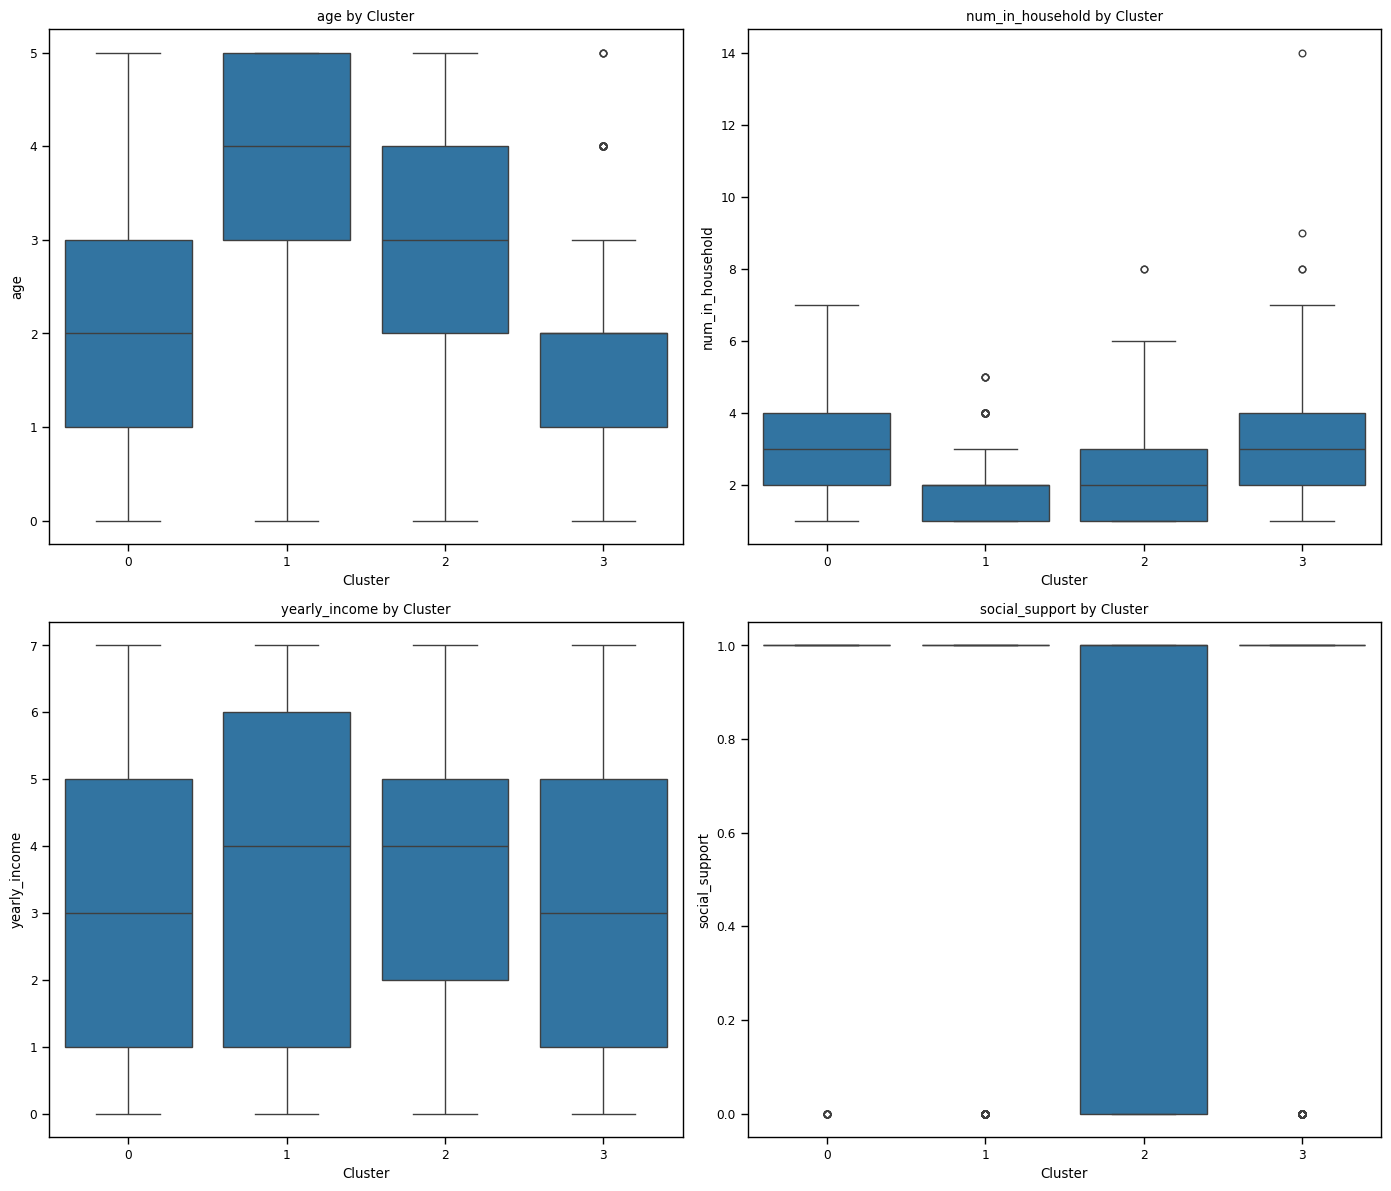

<Figure size 1200x1000 with 0 Axes>

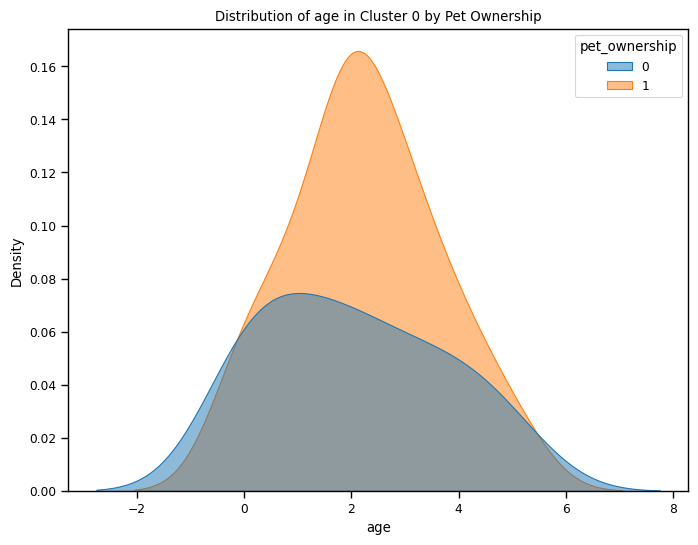

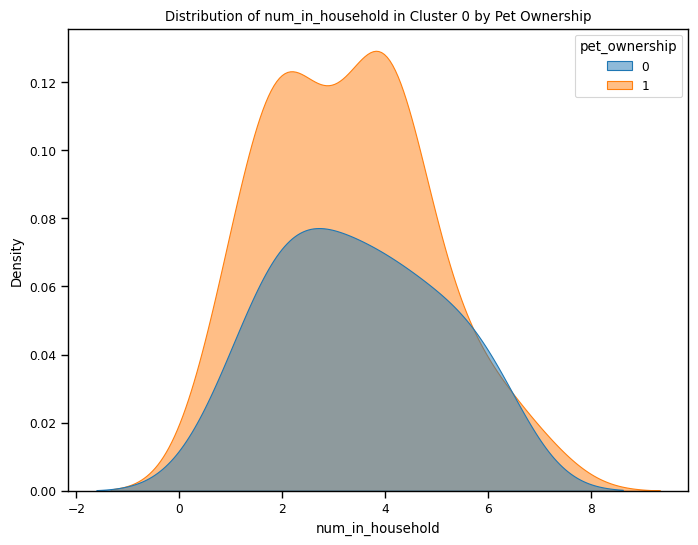

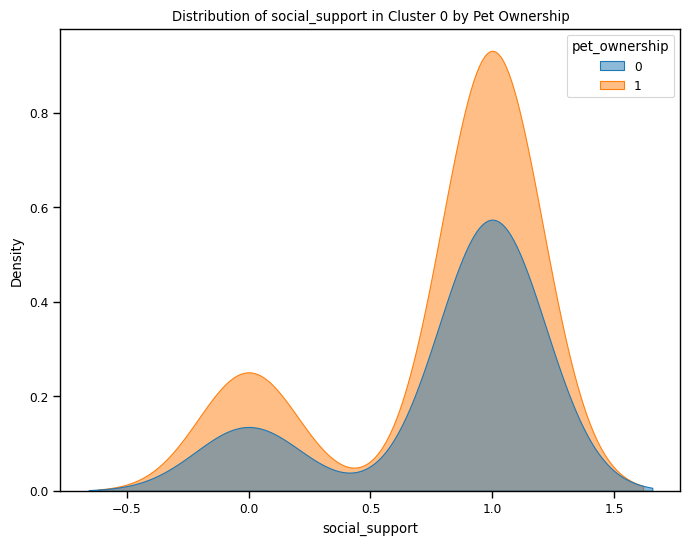

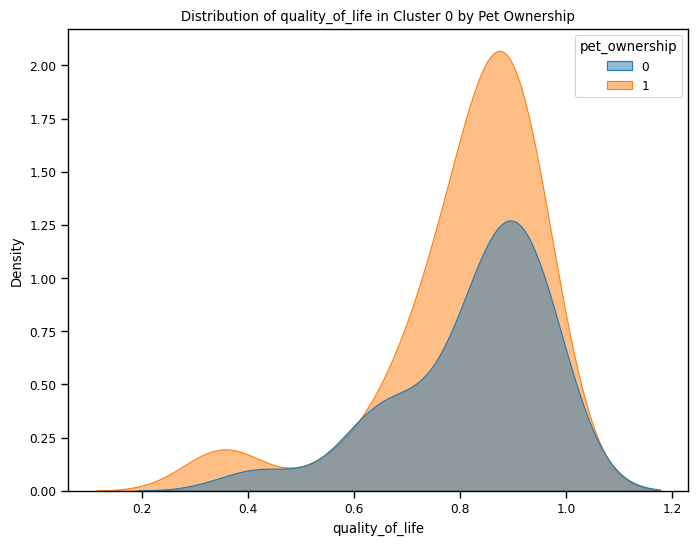

In [838]:
features = train_df.drop(['mental_health_change_since_pandemic_beginning', 
                          'loneliness', 
                          'perceived_mental_health', 
                          'self-reported_stress_level', 
                          'anxiety'], axis=1)
feature_cols = features.columns

scaler = StandardScaler()
X_kmeans = scaler.fit_transform(train_df[feature_cols])

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
train_df['cluster'] = kmeans.fit_predict(X_kmeans)

cluster_demographics = train_df.groupby('cluster').agg({
    'pet_ownership': 'mean',
    'age': 'mean',
    'gender': 'mean',
    'highest_education': 'mean',
    'num_in_household': 'mean',
    'province_or_territory': 'mean',
    'region': 'mean',
    'pet_ownership_change': 'mean',
    'pet_attitude': 'mean',
    'ethnicity': 'mean',
    'yearly_income': 'mean',
    'income_change_since_pandemic_beginning': 'mean',
    'disability': 'mean',
    'emotional_psychological_mental_health_condition': 'mean',
    'COVID-19_positive_or_household_member': 'mean',
    'social_support': 'mean',
    'quality_of_life': 'mean',
    'self-assessed_overall_health': 'mean'
})

pd.set_option('display.max_columns', None)
print("Cluster Demographics:")
print(cluster_demographics)

cluster_outcomes = train_df.groupby('cluster').agg({
    'mental_health_change_since_pandemic_beginning': 'mean',
    'loneliness': 'mean',
    'perceived_mental_health': 'mean',
    'self-reported_stress_level': 'mean', 
    'anxiety': 'mean'
})
print("\nCluster Mental Health Outcomes:")
print(cluster_outcomes)

pet_effect = train_df.groupby(['cluster', 'pet_ownership']).agg({
    'mental_health_change_since_pandemic_beginning': 'mean',
    'loneliness': 'mean',
    'perceived_mental_health': 'mean',
    'self-reported_stress_level': 'mean', 
    'anxiety': 'mean'
}).reset_index()

pet_effect_pivot = pet_effect.pivot(index='cluster', columns='pet_ownership')

diff_cols = {}
for col in ['mental_health_change_since_pandemic_beginning', 'loneliness', 
            'perceived_mental_health', 'self-reported_stress_level', 'anxiety']:
    diff_cols[f'{col}_benefit'] = pet_effect_pivot[(col, 1)] - pet_effect_pivot[(col, 0)]

pet_benefit_df = pd.DataFrame(diff_cols)
print("\nPet Ownership Benefit by Cluster (Positive values = better outcomes for pet owners):")
print(pet_benefit_df)

best_cluster = pet_benefit_df['mental_health_change_since_pandemic_beginning_benefit'].idxmax()
print(f"\nCluster {best_cluster} shows the greatest benefit from pet ownership")
print("\nDemographic profile of this cluster:")
print(cluster_demographics.loc[best_cluster])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_kmeans)

plt.figure(figsize=(10, 8))
for cluster in np.unique(train_df['cluster']):
    plt.scatter(X_pca[train_df['cluster'] == cluster, 0], 
                X_pca[train_df['cluster'] == cluster, 1], 
                label=f'Cluster {cluster}')
    
plt.title('K-means Clustering of Demographics')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.savefig('cluster_pca_plot.png')
plt.show()

plt.figure(figsize=(12, 8))
sb.heatmap(pet_benefit_df, annot=True, cmap='RdBu_r', center=0)
plt.title('Mental Health Benefits from Pet Ownership by Cluster')
plt.ylabel('Cluster')
plt.tight_layout()
plt.savefig('pet_benefit_heatmap.png')
plt.show()

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

mental_health_vars = ['mental_health_change_since_pandemic_beginning', 
                     'loneliness', 'perceived_mental_health', 
                     'self-reported_stress_level', 'anxiety']

for i, var in enumerate(mental_health_vars):
    if i < len(axes):
        sb.barplot(x='cluster', y=var, hue='pet_ownership', data=pet_effect, ax=axes[i])
        axes[i].set_title(f'{var} by Cluster and Pet Ownership')
        axes[i].set_xlabel('Cluster')
        axes[i].set_ylabel(var)

plt.tight_layout()
plt.savefig('mental_health_by_cluster_pet.png')
plt.show()

demographic_features = ['age', 'num_in_household', 'yearly_income', 'social_support']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, feature in enumerate(demographic_features):
    sb.boxplot(x='cluster', y=feature, data=train_df, ax=axes[i])
    axes[i].set_title(f'{feature} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.savefig('demographics_by_cluster.png')
plt.show()

plt.figure(figsize=(12, 10))
for var in ['age', 'num_in_household', 'social_support', 'quality_of_life']:
    plt.figure(figsize=(8, 6))
    sb.kdeplot(
        data=train_df[train_df['cluster'] == best_cluster], 
        x=var, 
        hue='pet_ownership',
        fill=True,
        alpha=0.5
    )
    plt.title(f'Distribution of {var} in Cluster {best_cluster} by Pet Ownership')
    plt.savefig(f'cluster_{best_cluster}_{var}_distribution.png')
    plt.show()

In [840]:
print("\n=== CONCLUSION ===")
print(f"Based on the analysis, Cluster {best_cluster} shows the greatest mental health benefit from pet ownership.")
print("This cluster has the following demographic profile:")
for feature, value in cluster_demographics.loc[best_cluster].items():
    print(f"- {feature}: {value:.2f}")

print("\nThe mental health benefits for this cluster were:")
for col, value in pet_benefit_df.loc[best_cluster].items():
    print(f"- {col}: {value:.4f}")


=== CONCLUSION ===
Based on the analysis, Cluster 0 shows the greatest mental health benefit from pet ownership.
This cluster has the following demographic profile:
- pet_ownership: 0.61
- age: 2.17
- gender: 0.93
- highest_education: 2.11
- num_in_household: 3.35
- province_or_territory: 7.80
- region: 3.02
- pet_ownership_change: 1.59
- pet_attitude: 91.26
- ethnicity: 0.28
- yearly_income: 3.00
- income_change_since_pandemic_beginning: 2.37
- disability: 0.17
- emotional_psychological_mental_health_condition: 0.22
- COVID-19_positive_or_household_member: 1.00
- social_support: 0.80
- quality_of_life: 0.82
- self-assessed_overall_health: 73.22

The mental health benefits for this cluster were:
- mental_health_change_since_pandemic_beginning_benefit: 0.3160
- loneliness_benefit: 0.4156
- perceived_mental_health_benefit: 0.2294
- self-reported_stress_level_benefit: 0.0866
- anxiety_benefit: -0.0130


**References**

Denis-Robichaud, Jose; Aenishaenslin, Cecile; Richard, Lucie; Desmarchelier, Marion; Carabin, Helene, 2021, "Association between Pet Ownership and Mental Health and Well-Being of Canadians Assessed in a Cross-Sectional Study during the COVID-19 Pandemic", https://doi.org/10.7910/DVN/JKDKWY, Harvard Dataverse, V5; dataset_petandcovid.tab [fileName], UNF:6:7YJk+oBDFVpHnvlyBc1/Ew== [fileUNF]